In [1]:
df = read.csv("../Walmart_sales.csv")

In [2]:
#Conferir se já não foi alterado e converter coluna 'Date pata formato Date
if ( class(df$Date) != "Date" ) {
    df$Date = as.Date(df$Date, format = "%d-%m-%Y")
    }


In [3]:
summary(df)

     Store         Date             Weekly_Sales      Holiday_Flag    
 Min.   : 1   Min.   :2010-02-05   Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   1st Qu.:2010-10-08   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Median :2011-06-17   Median : 960746   Median :0.00000  
 Mean   :23   Mean   :2011-06-17   Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34   3rd Qu.:2012-02-24   3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45   Max.   :2012-10-26   Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

Comentário: Nas lojas onde a temperatura vai muto abixo do congelament (32f) o efeito é mais notável
Principalmente no primeiro quartil dp boxplot (rabicho inferior).

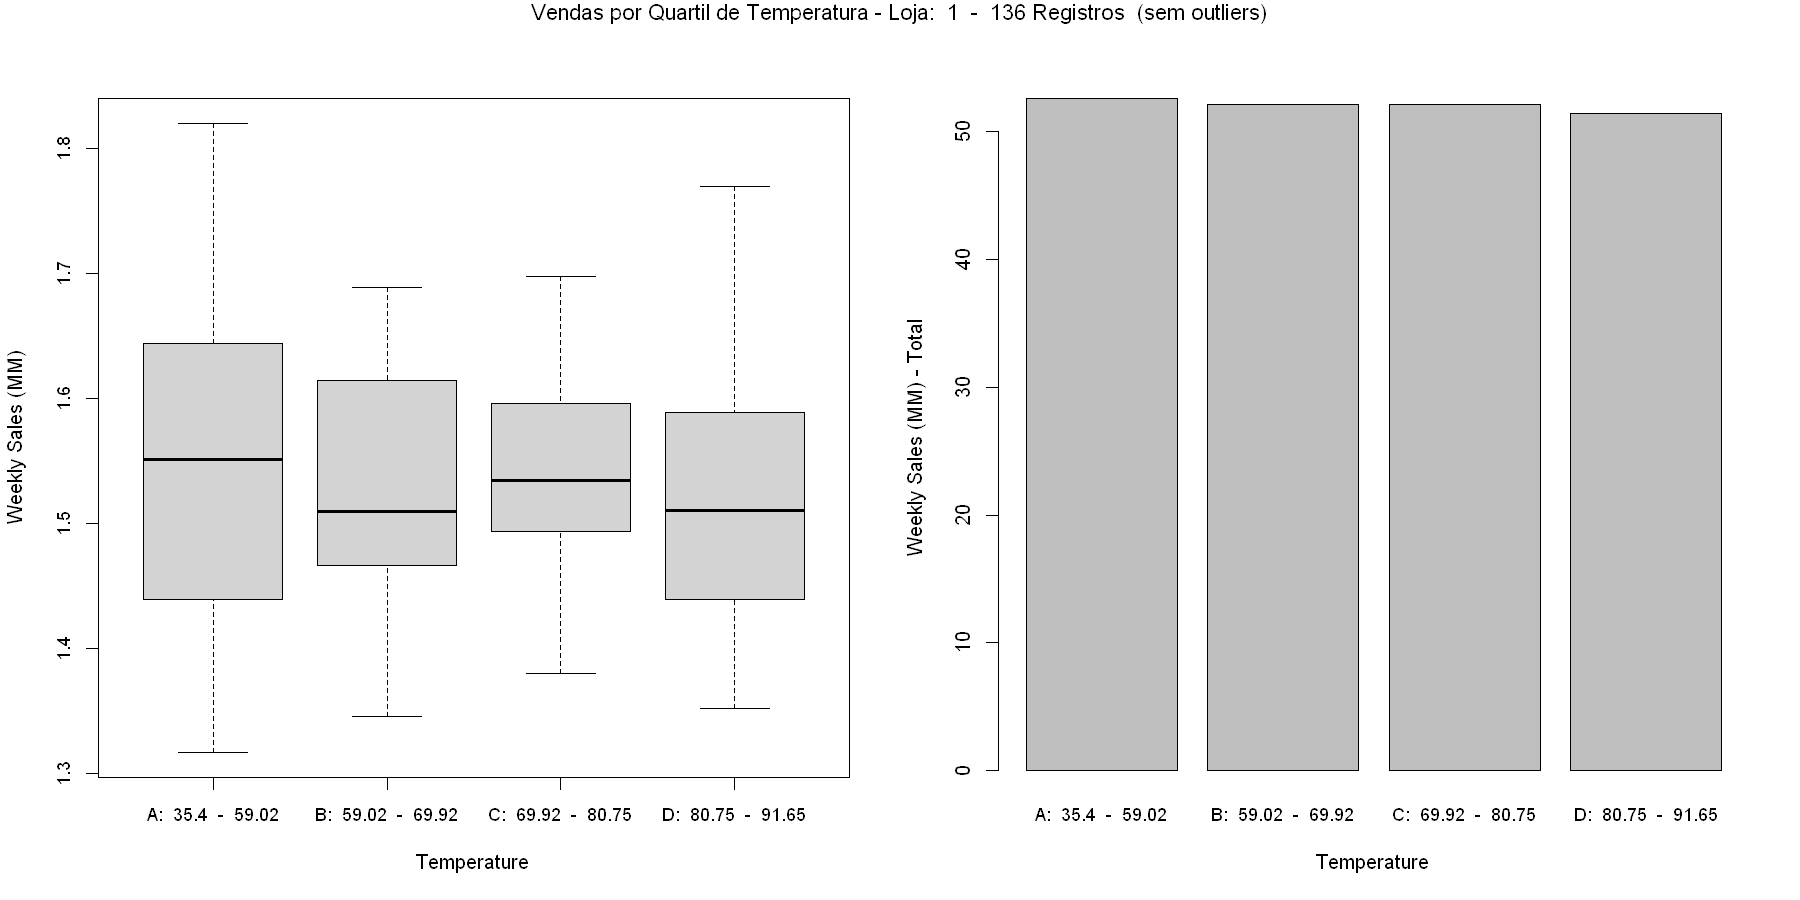

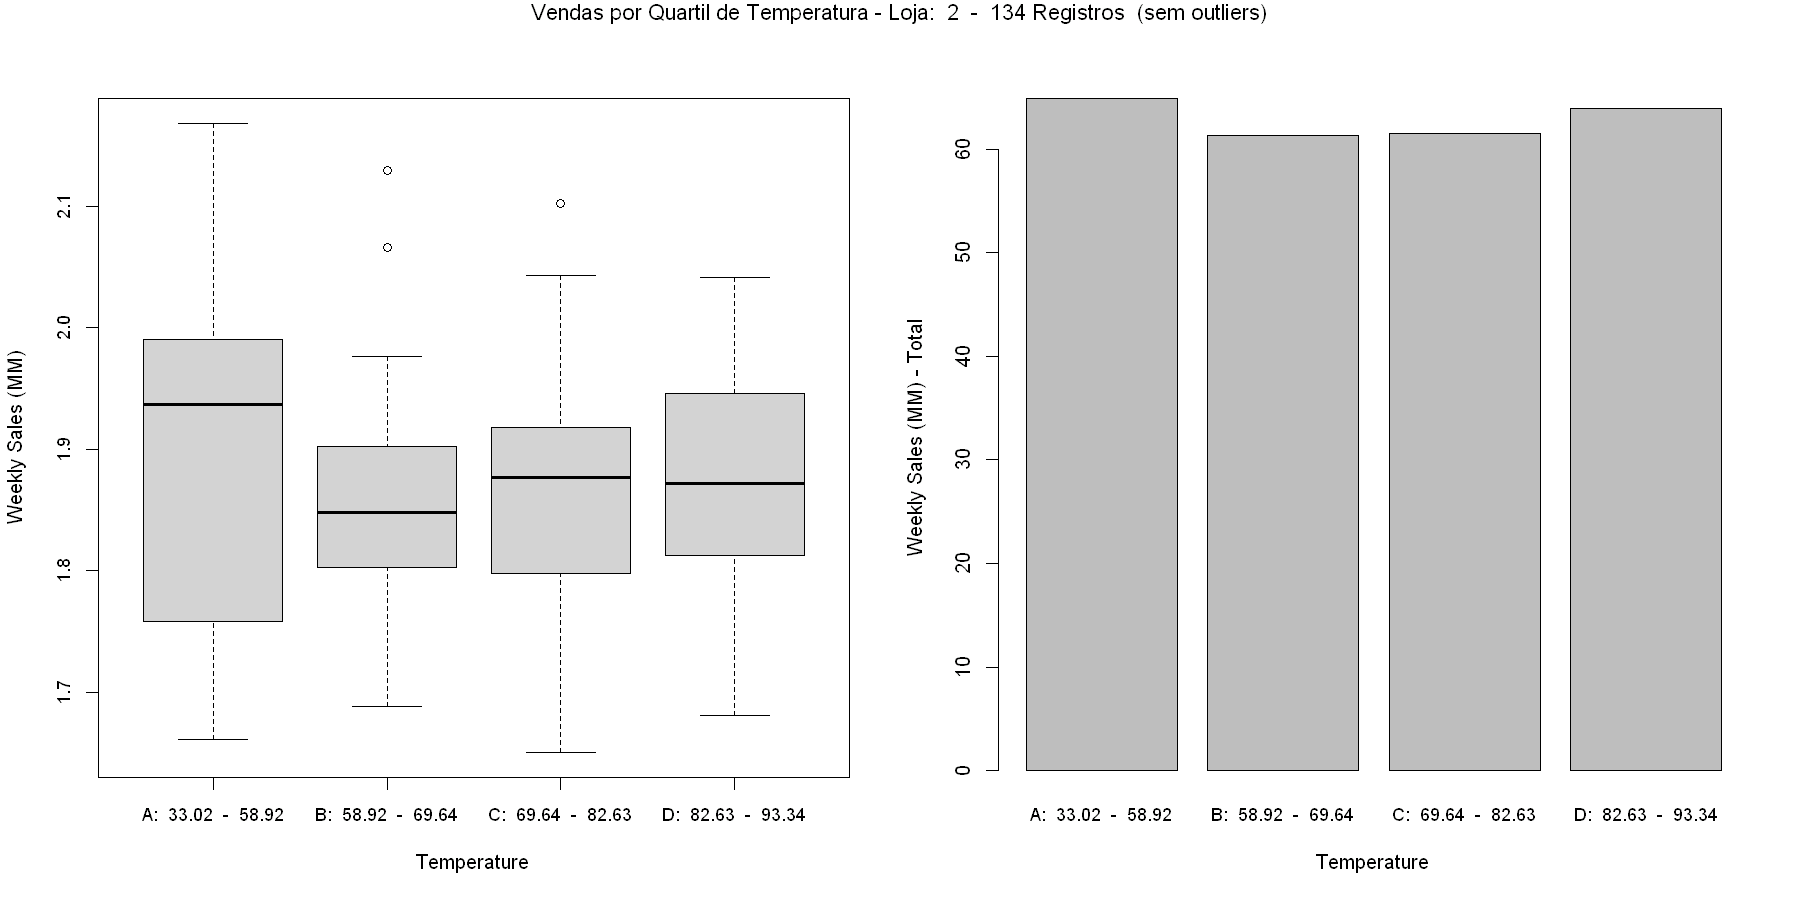

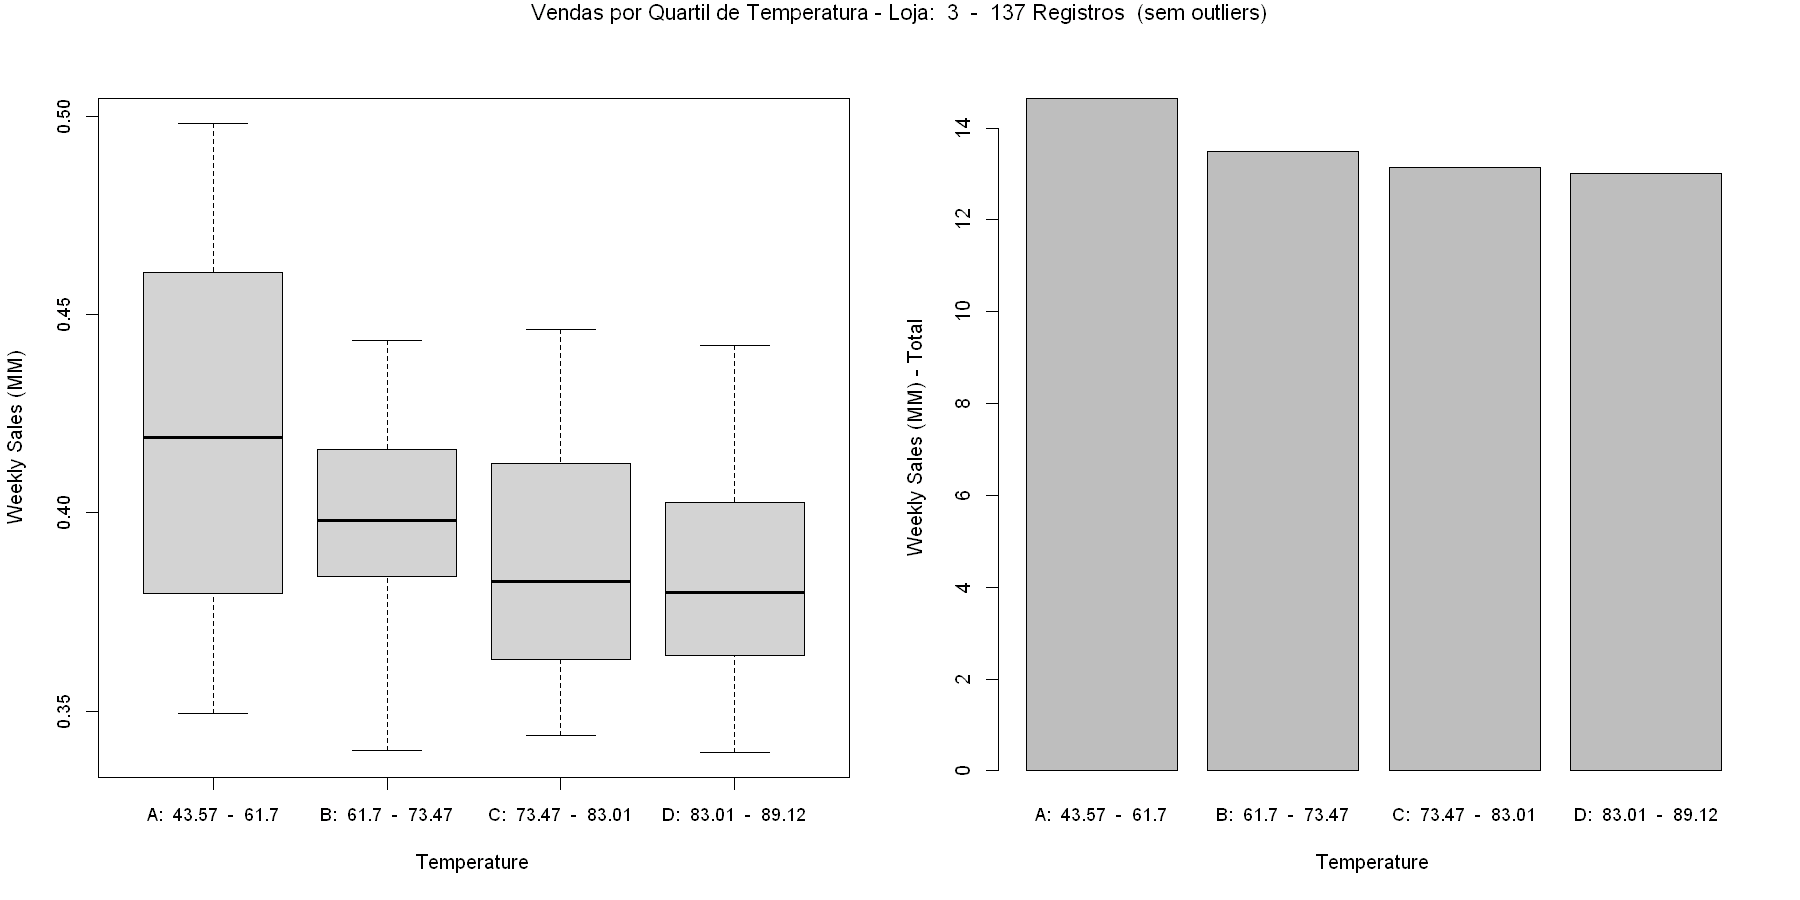

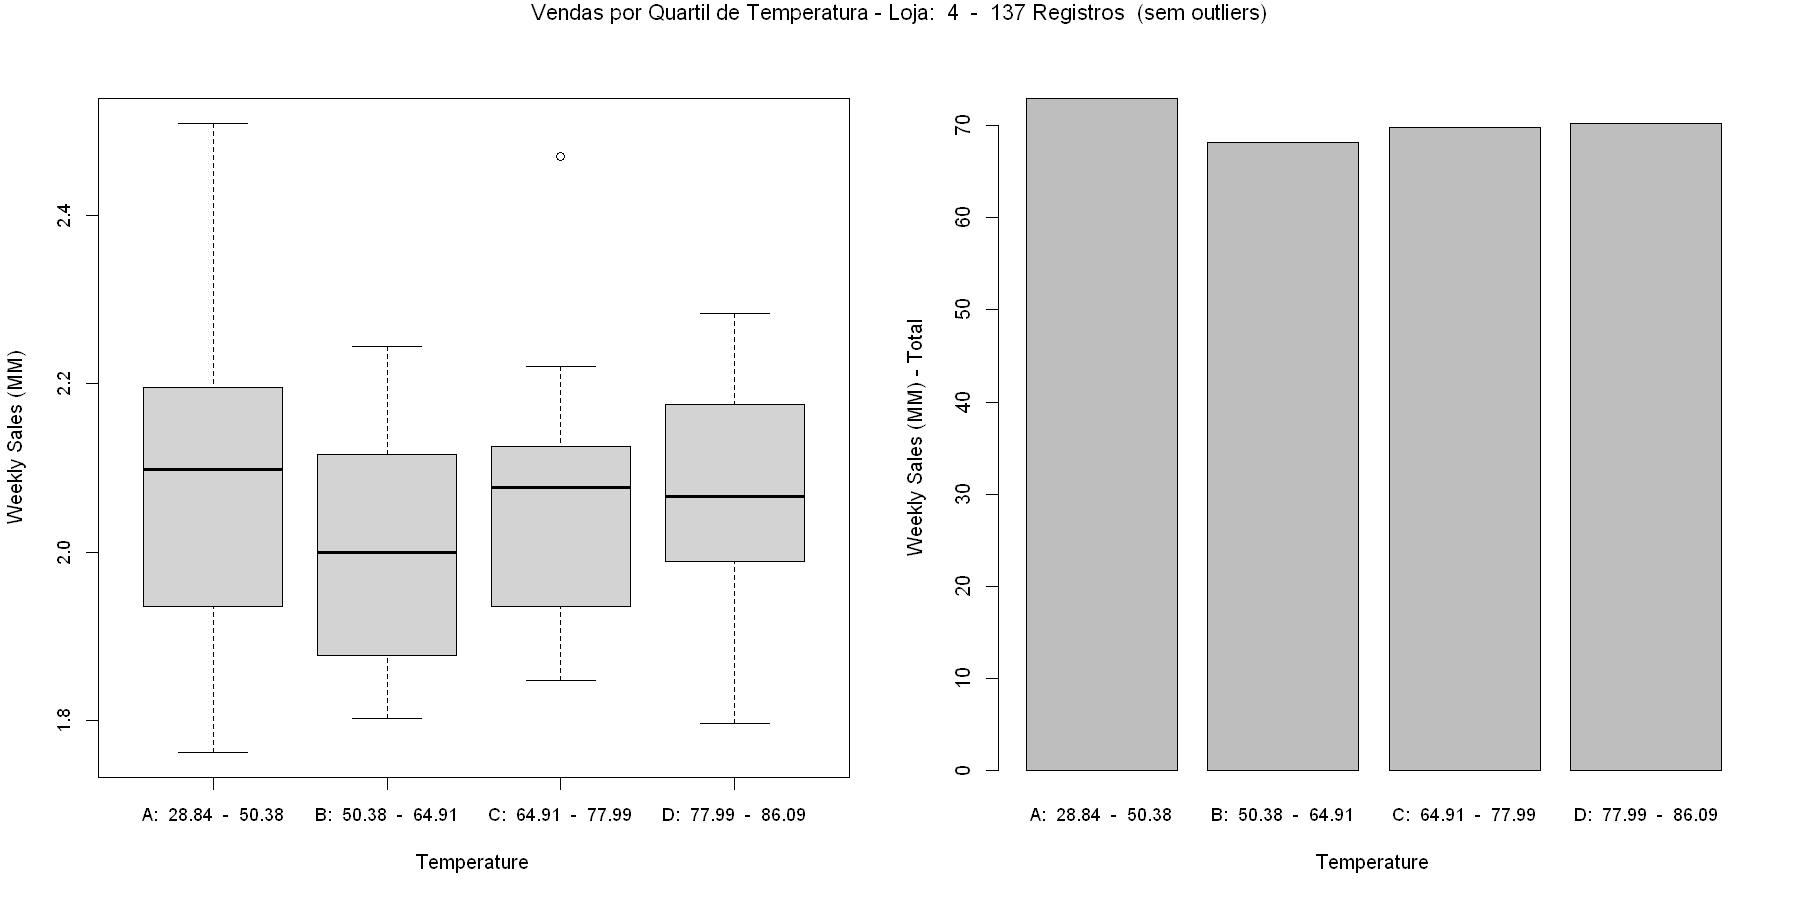

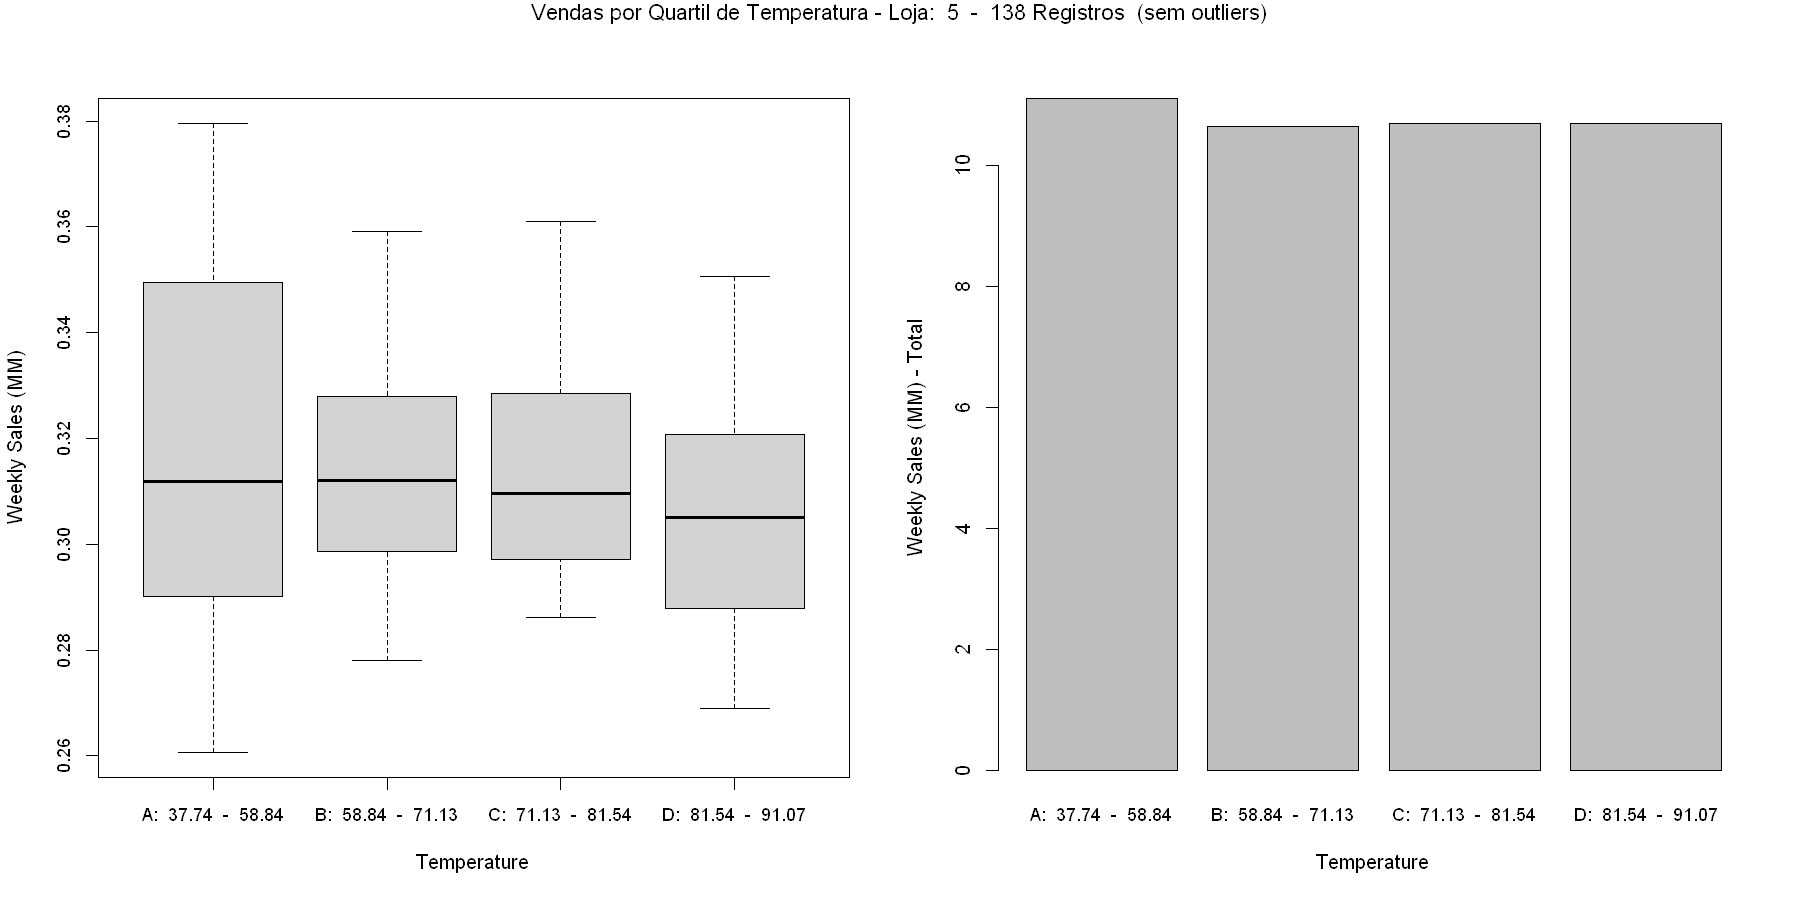

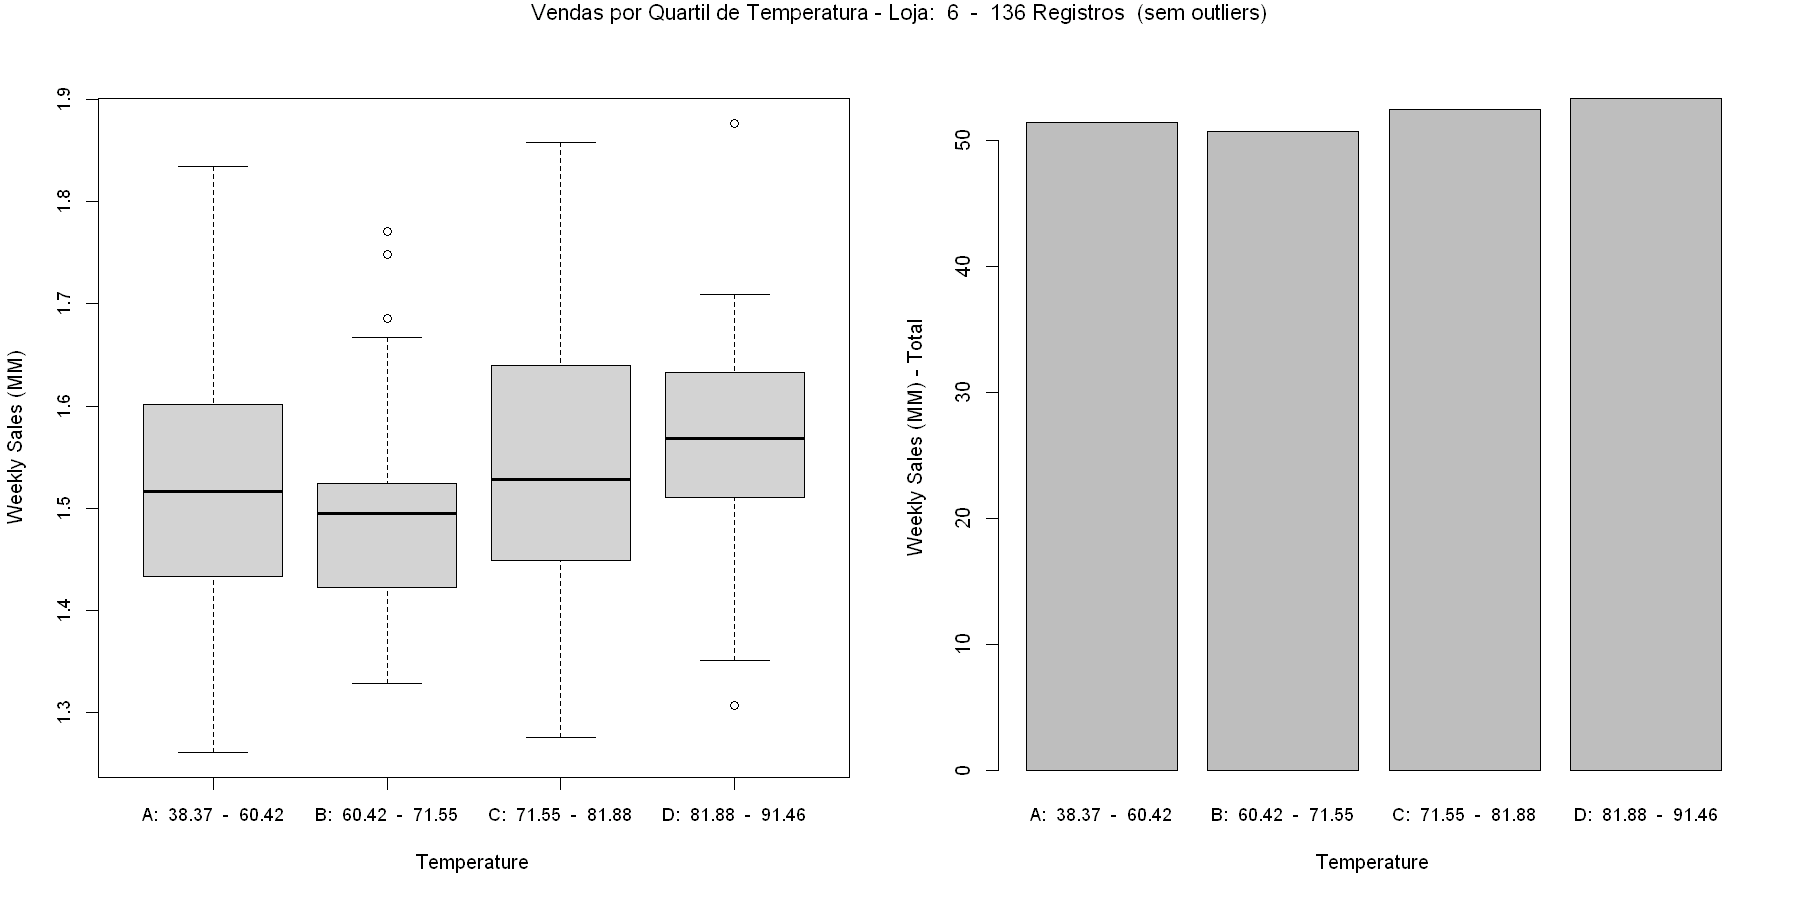

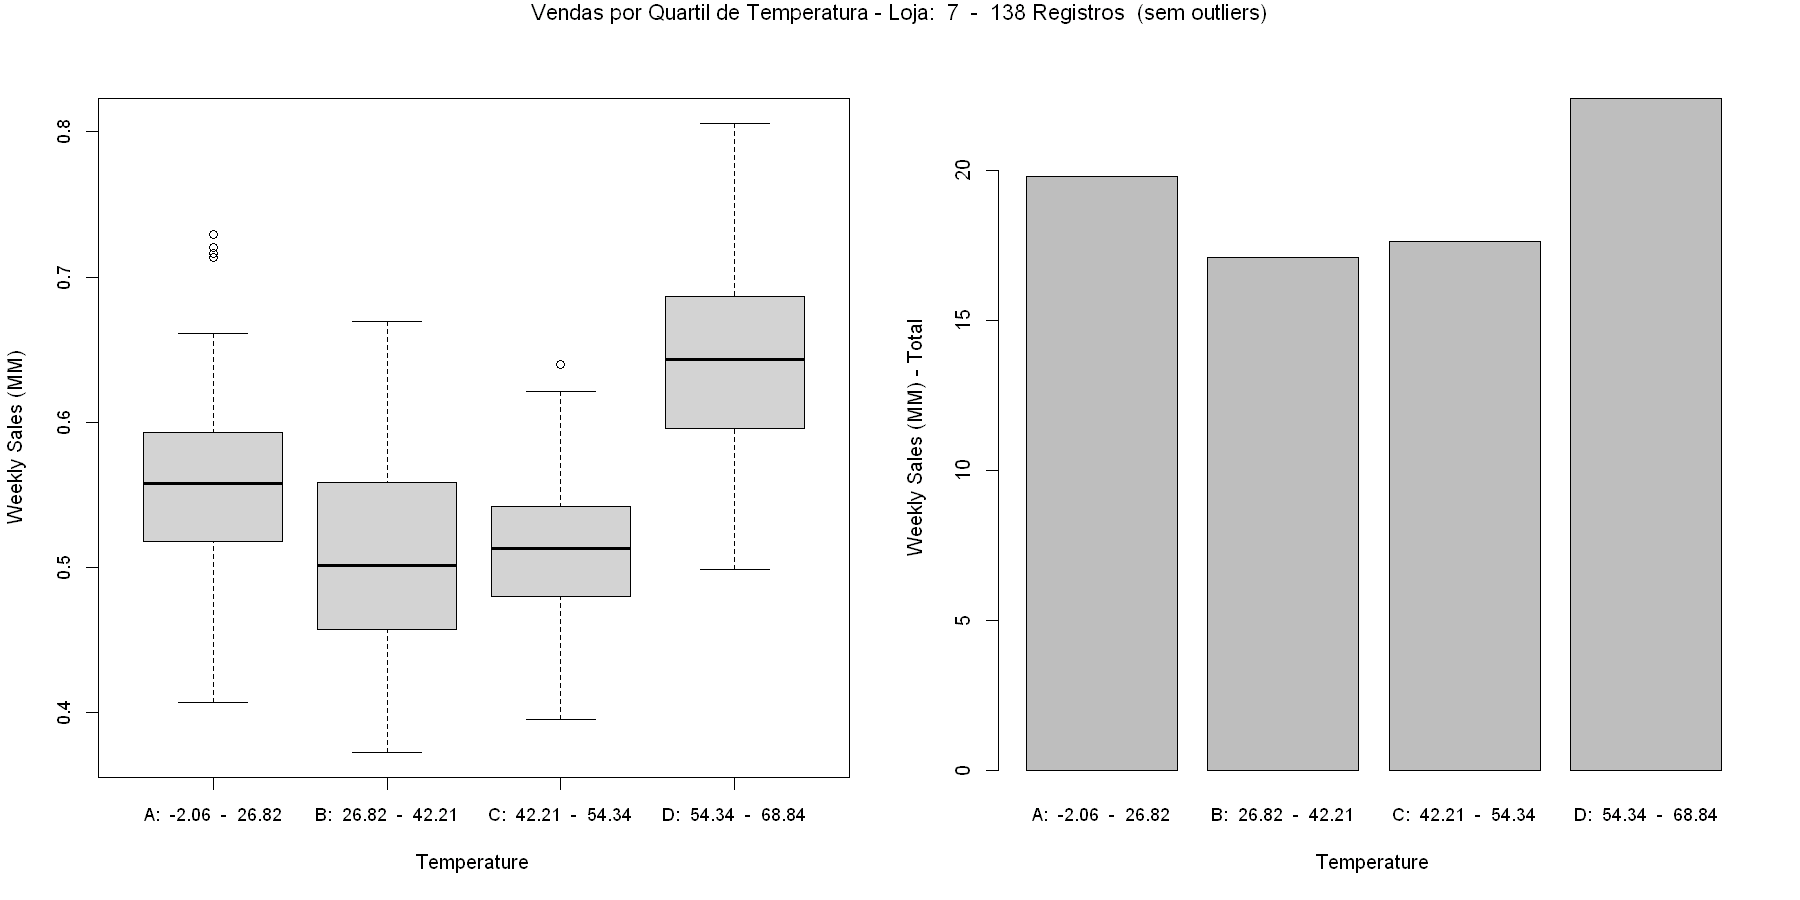

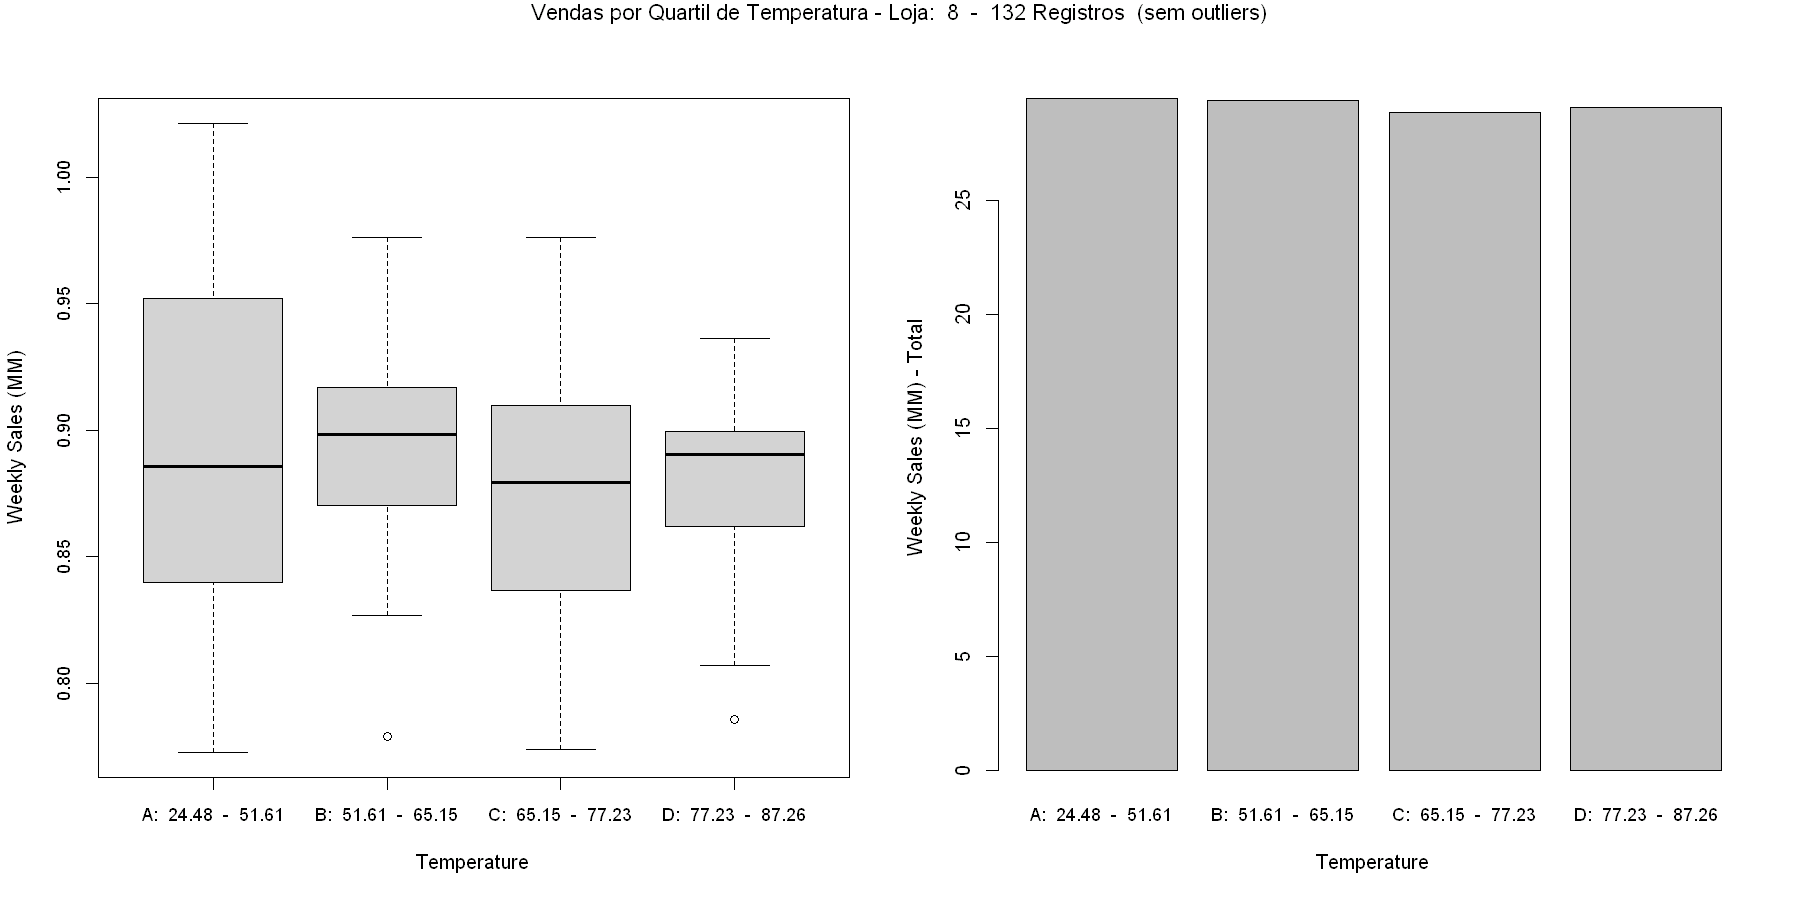

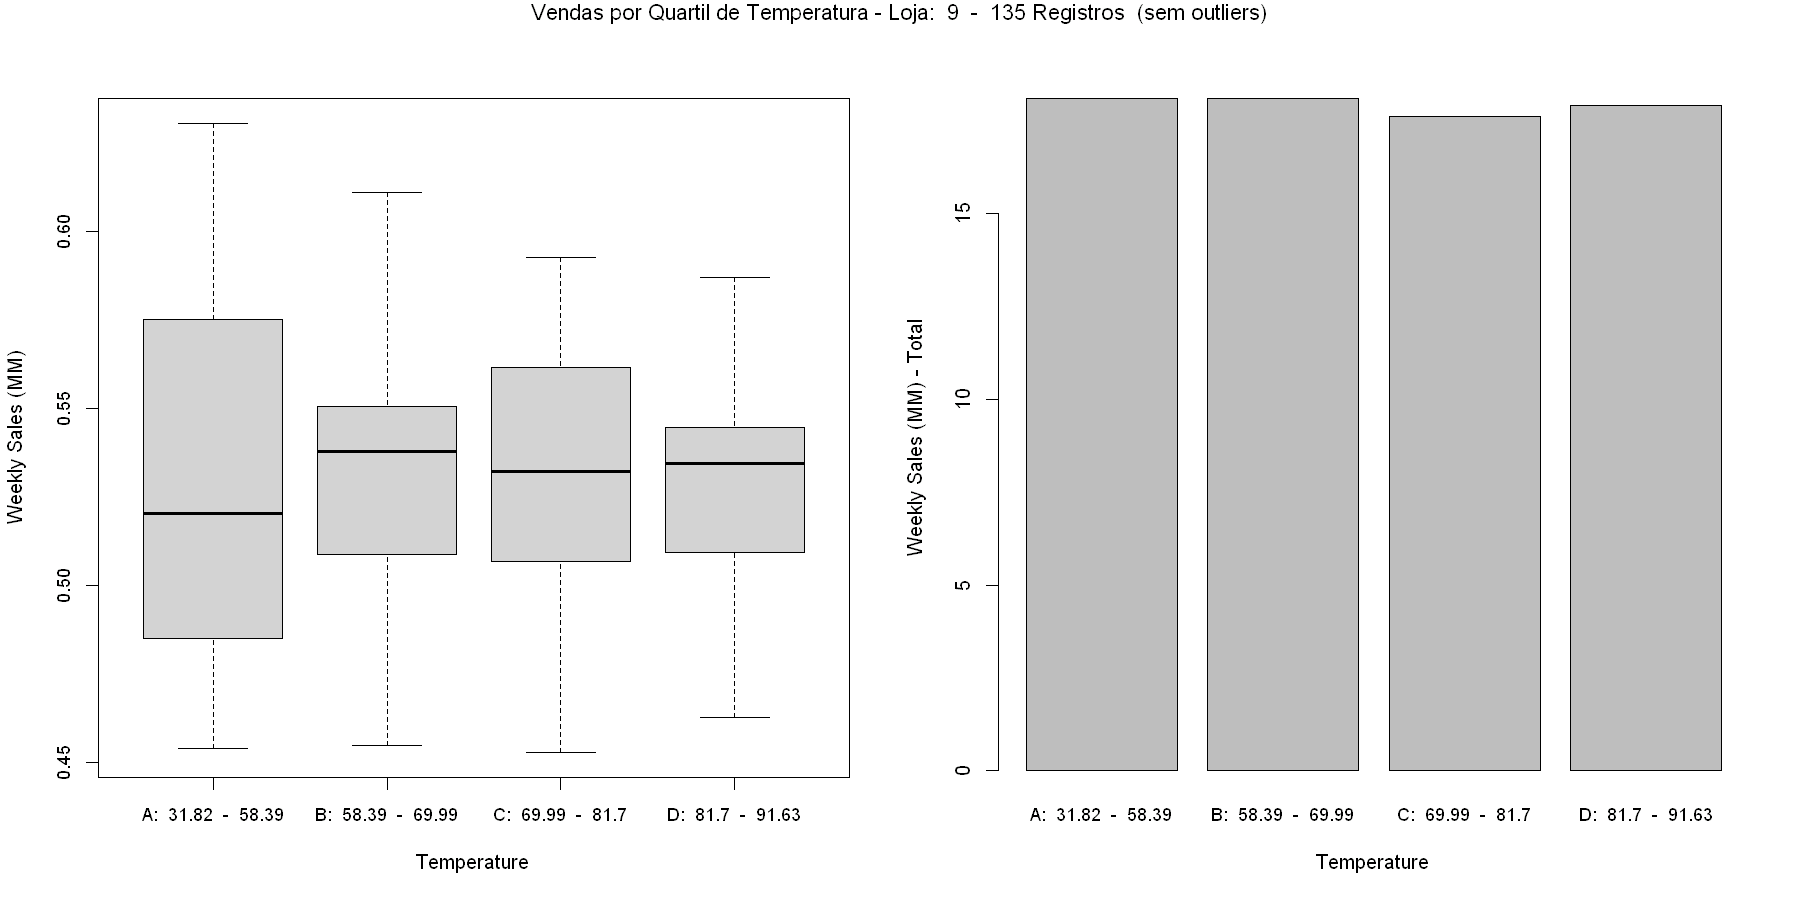

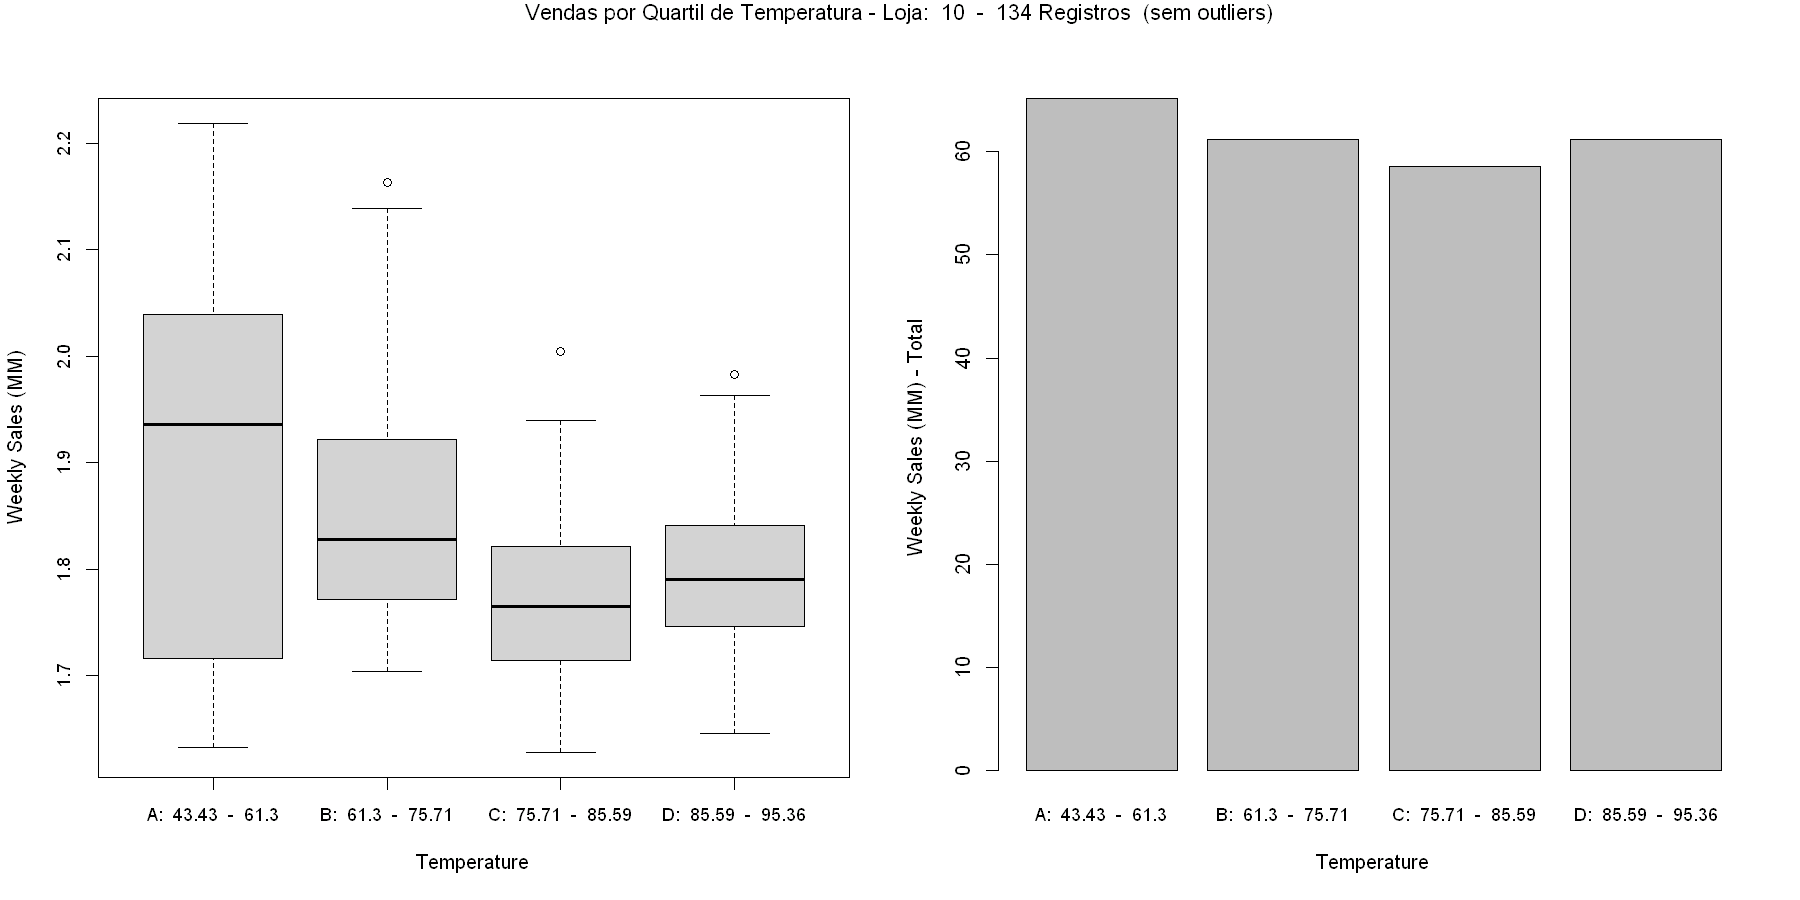

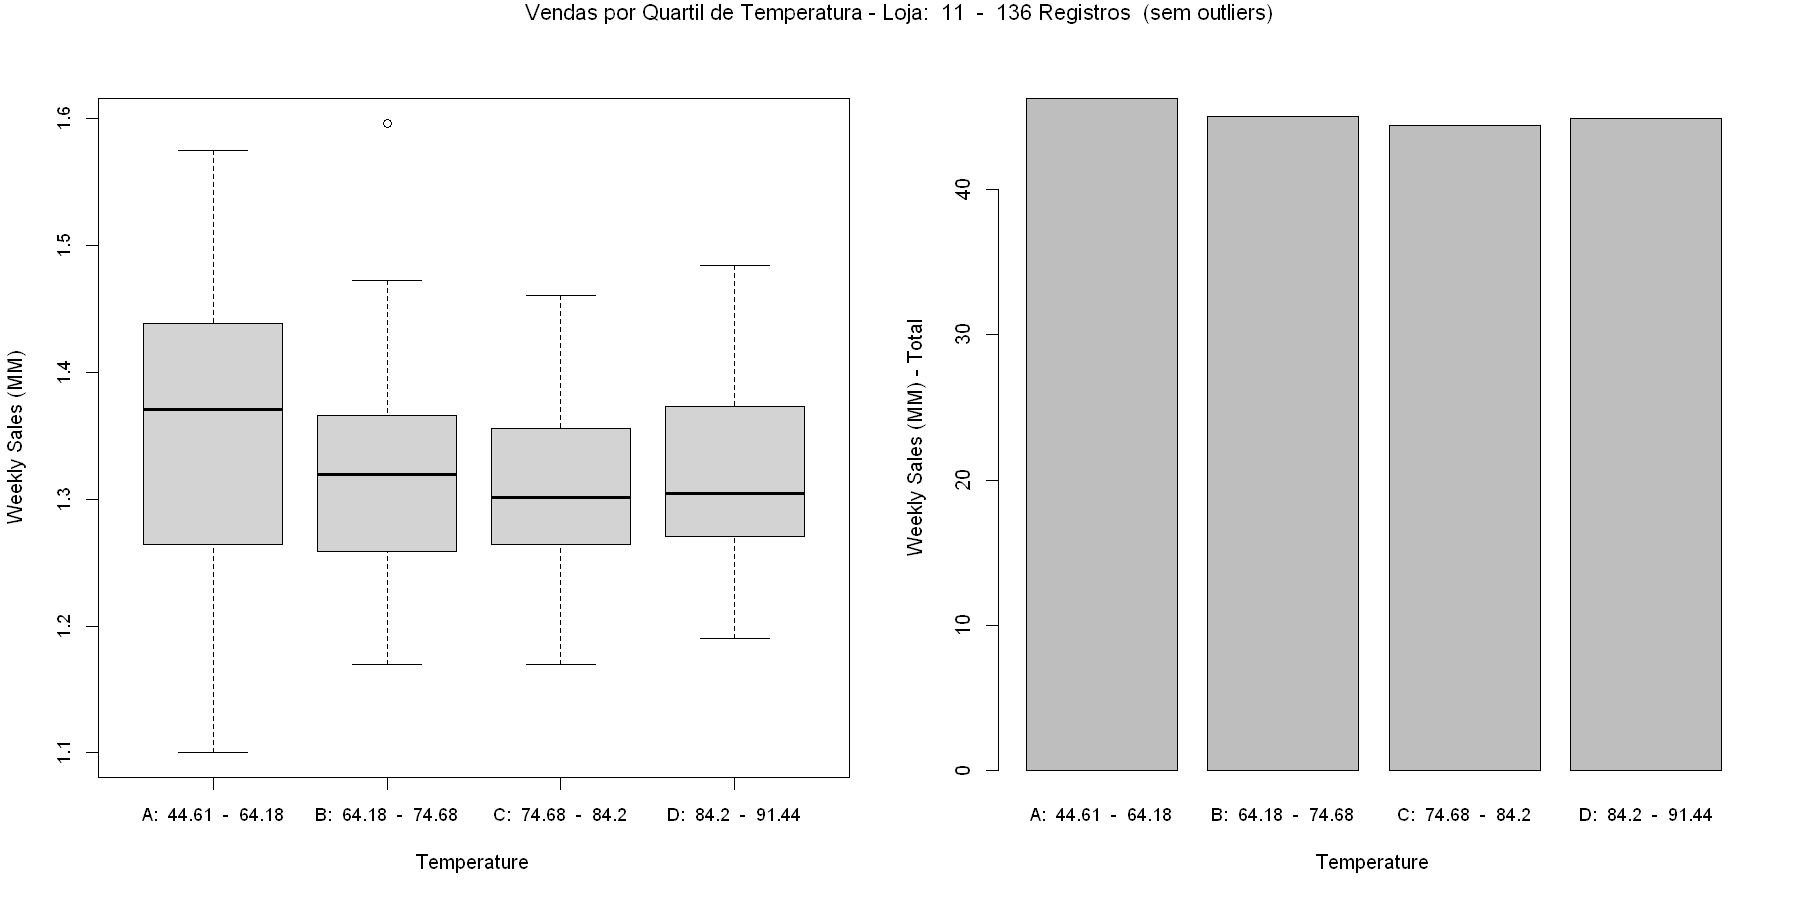

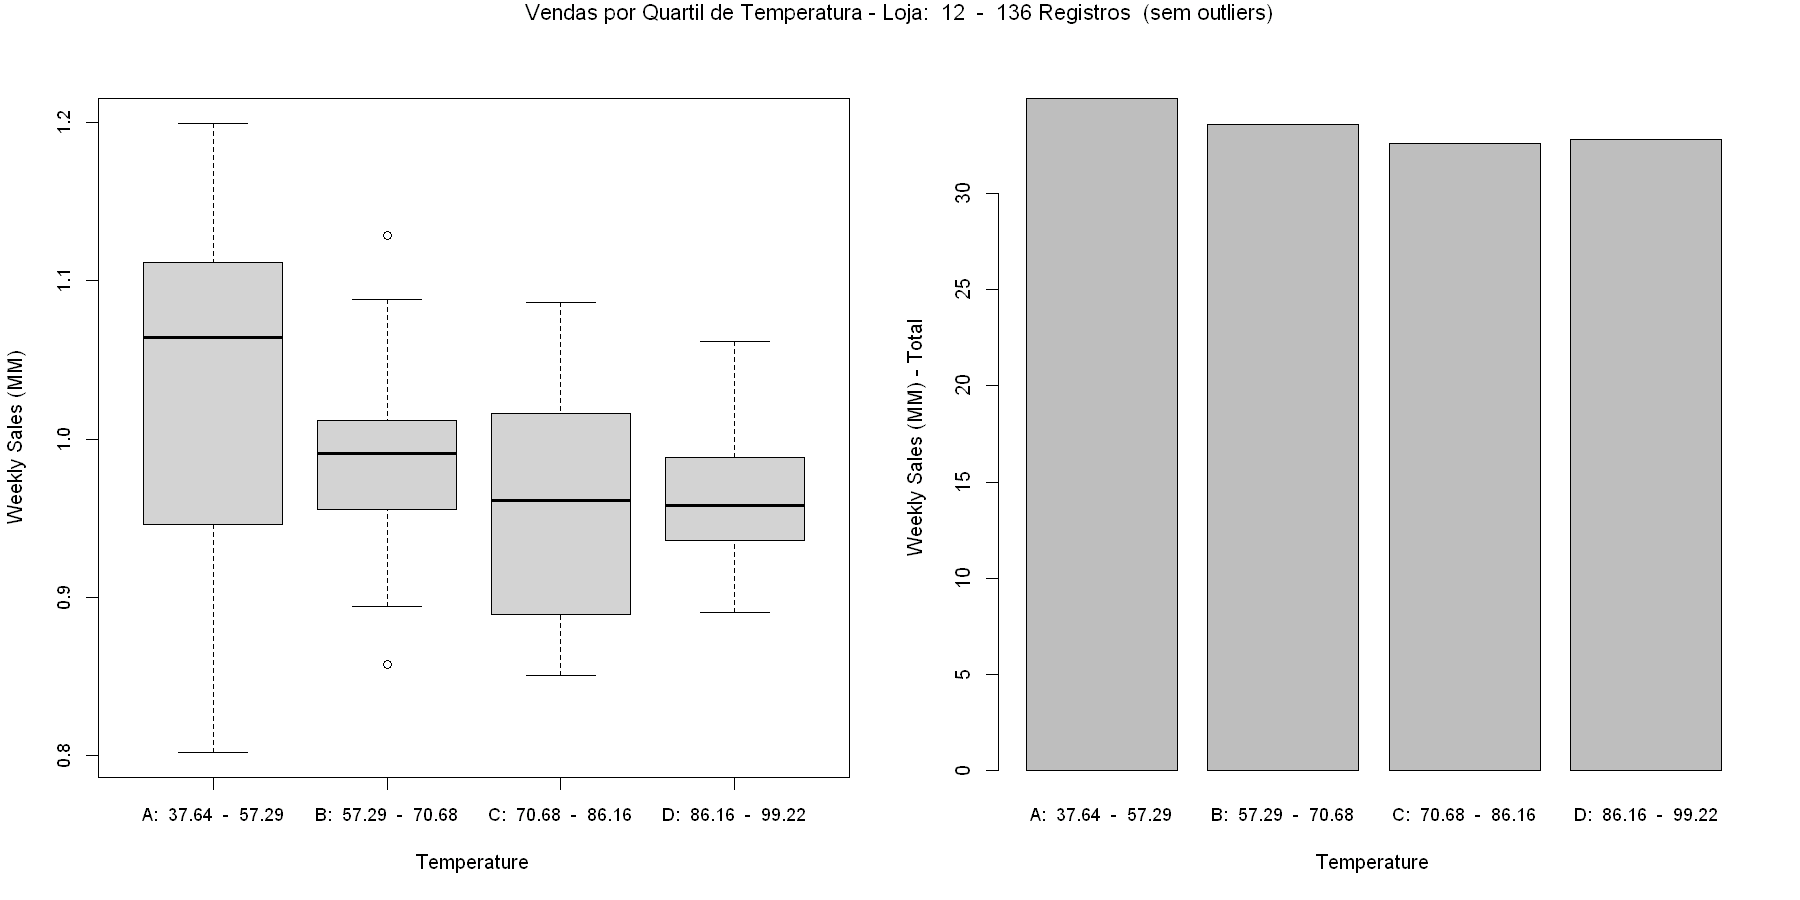

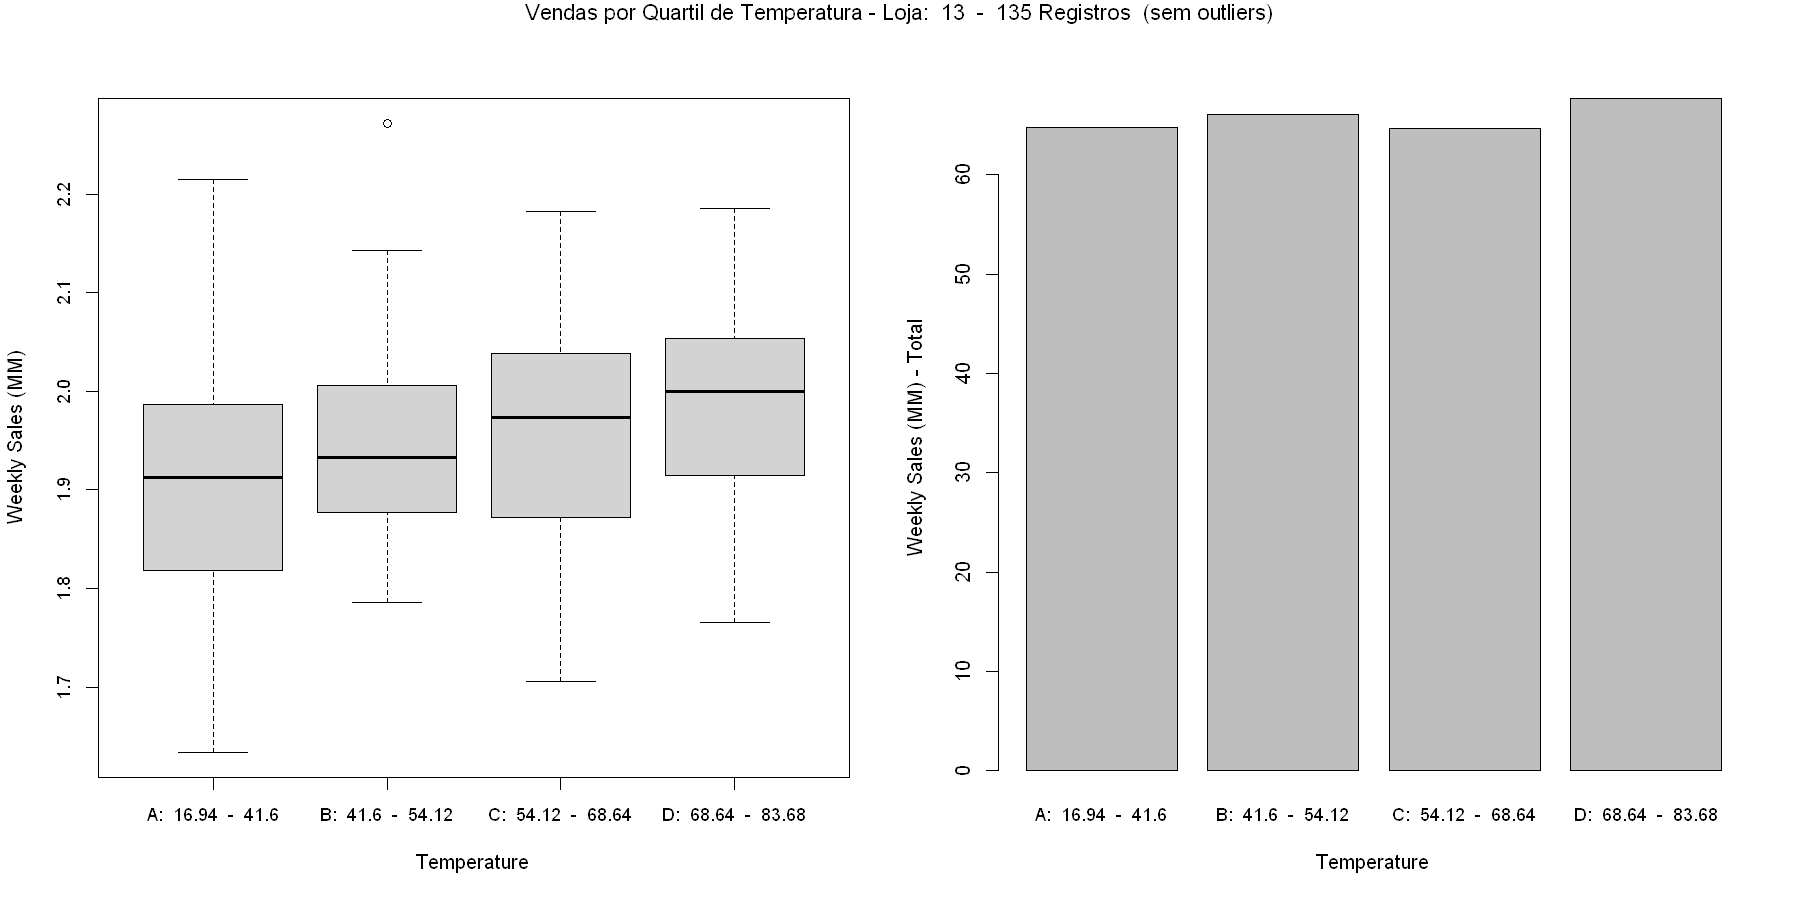

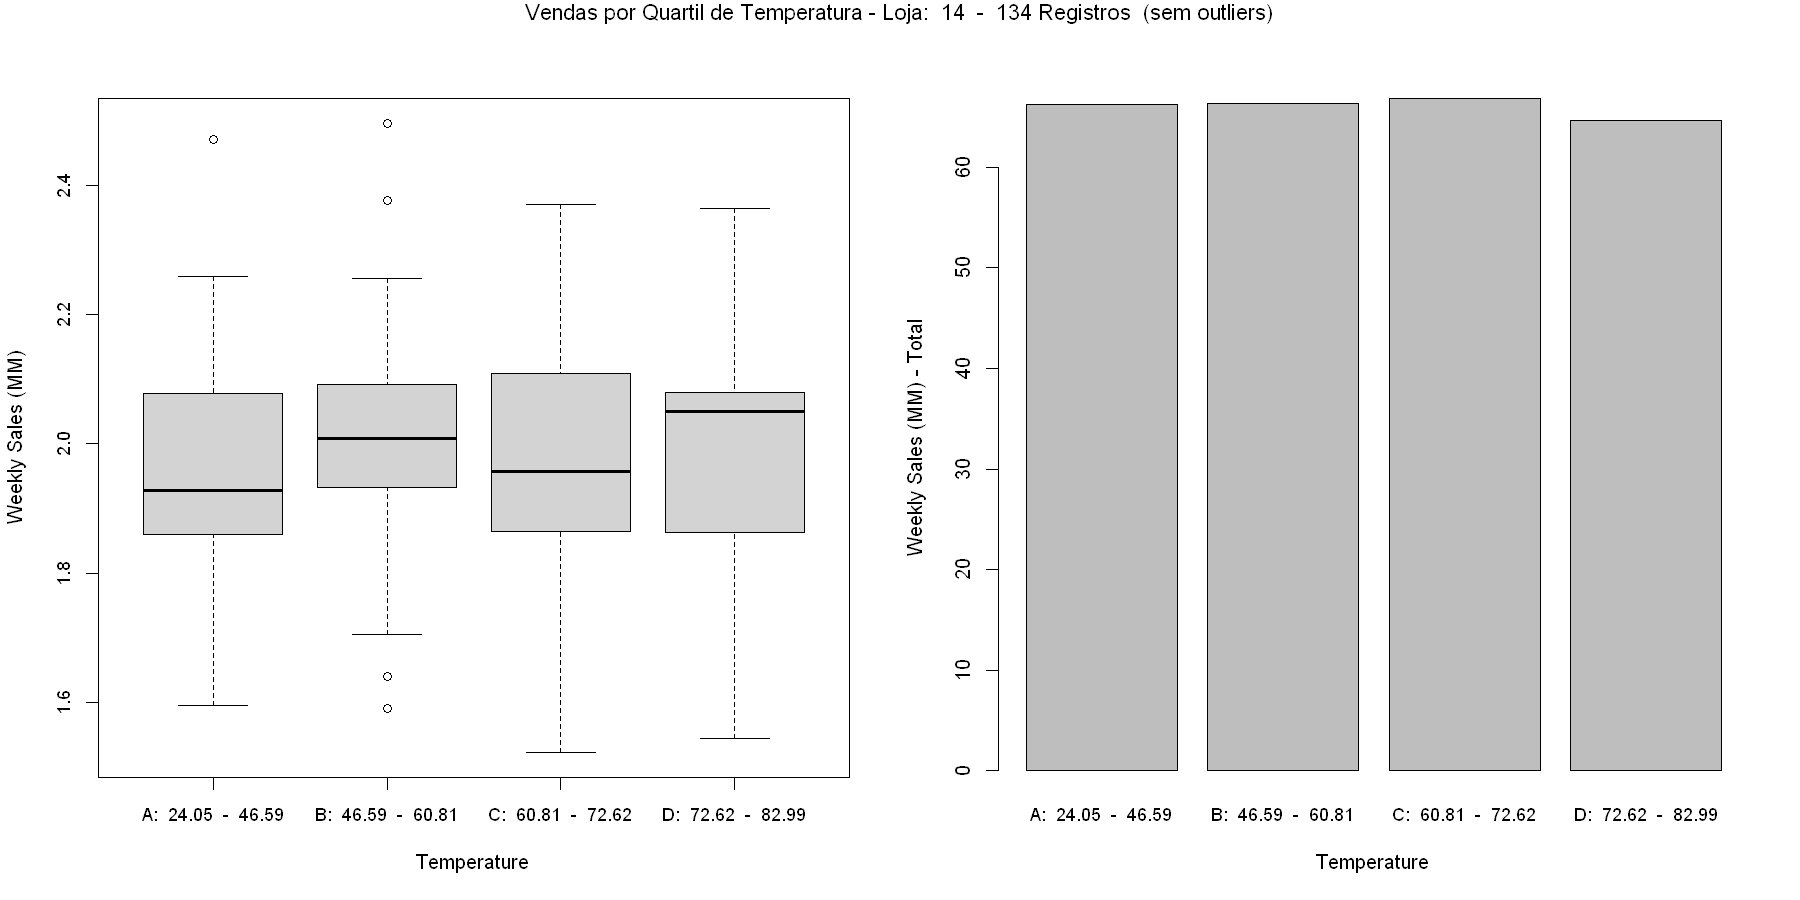

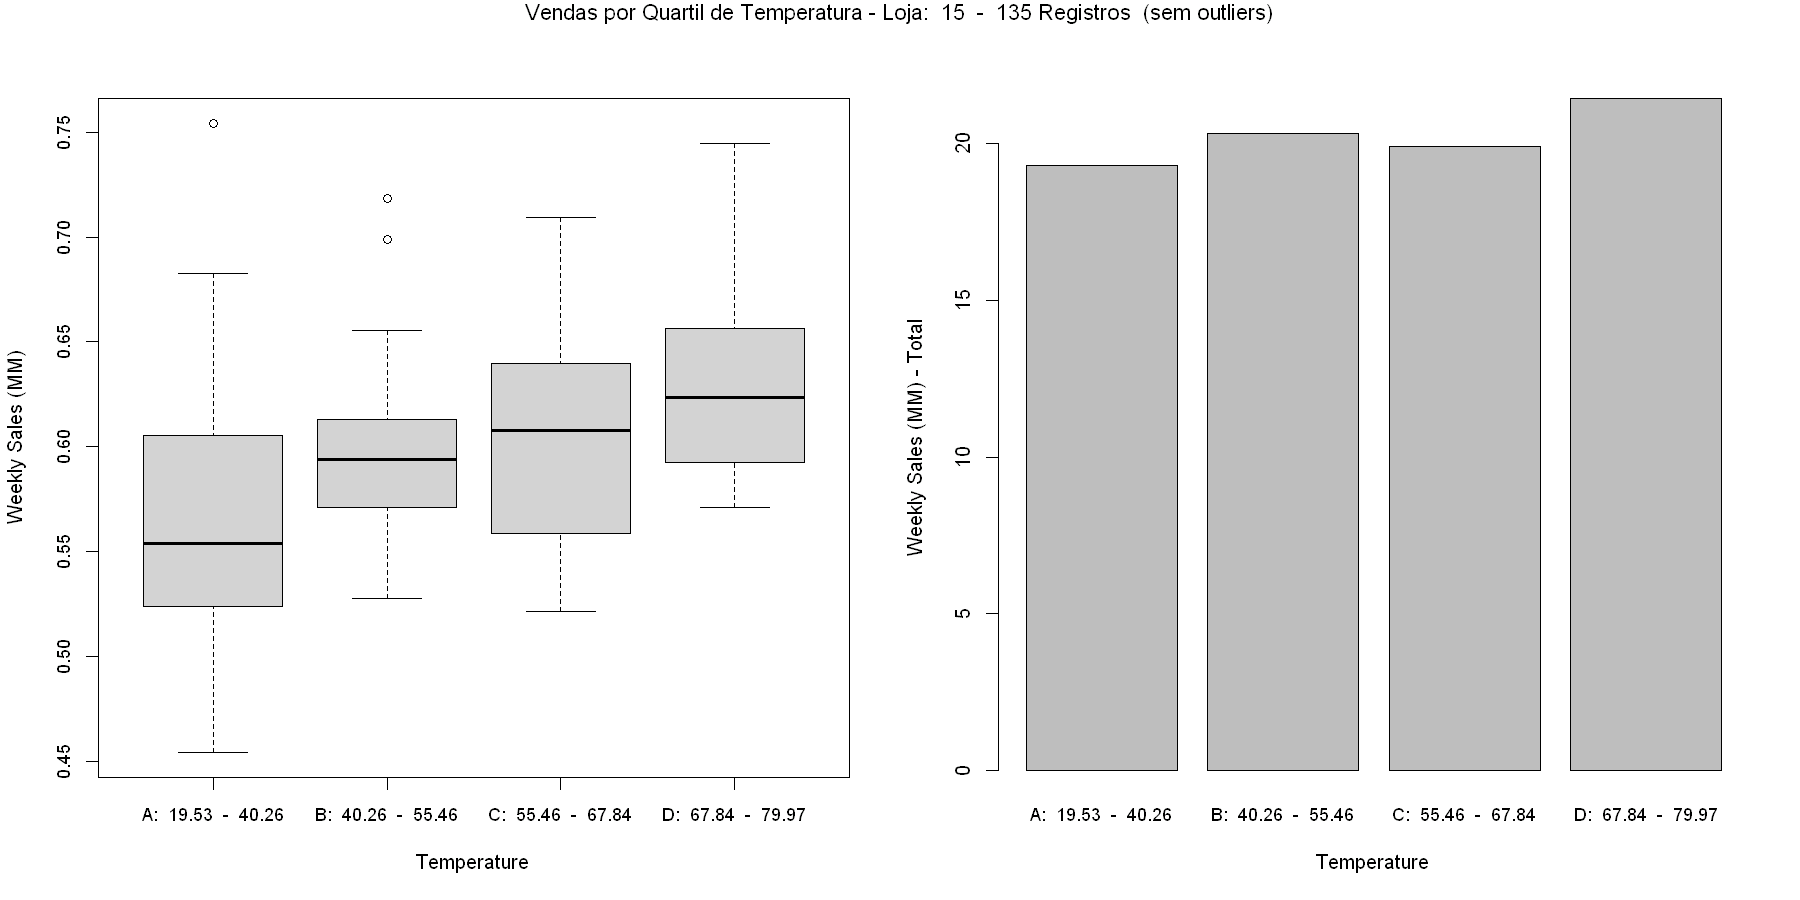

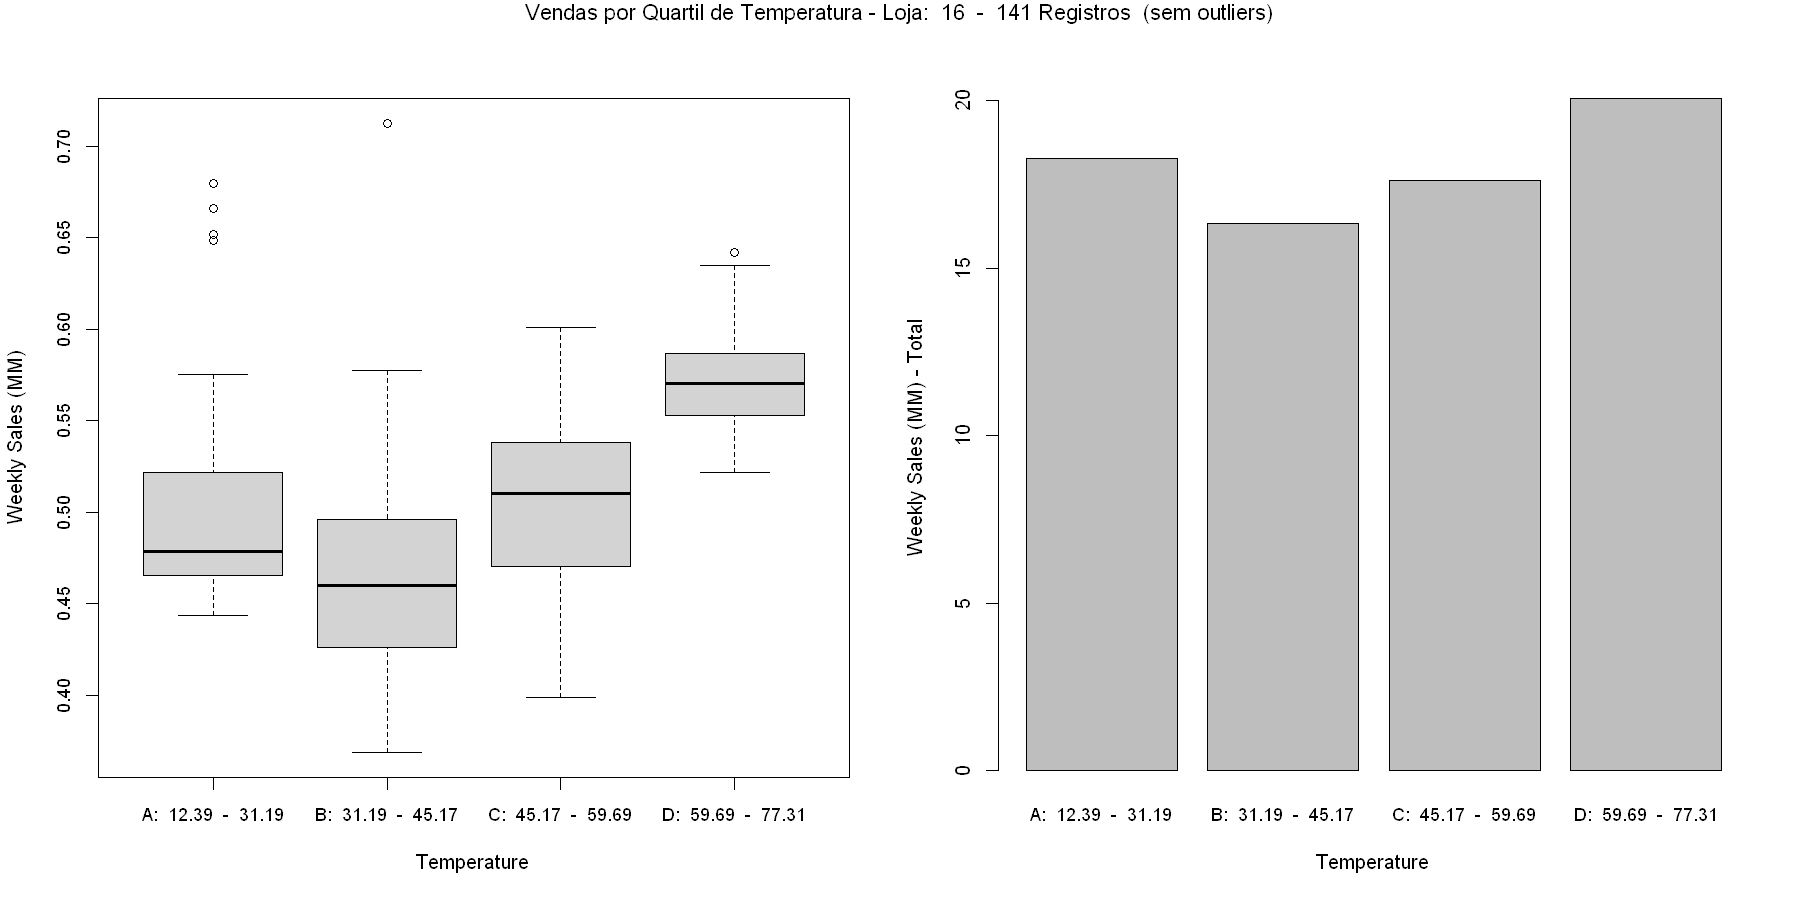

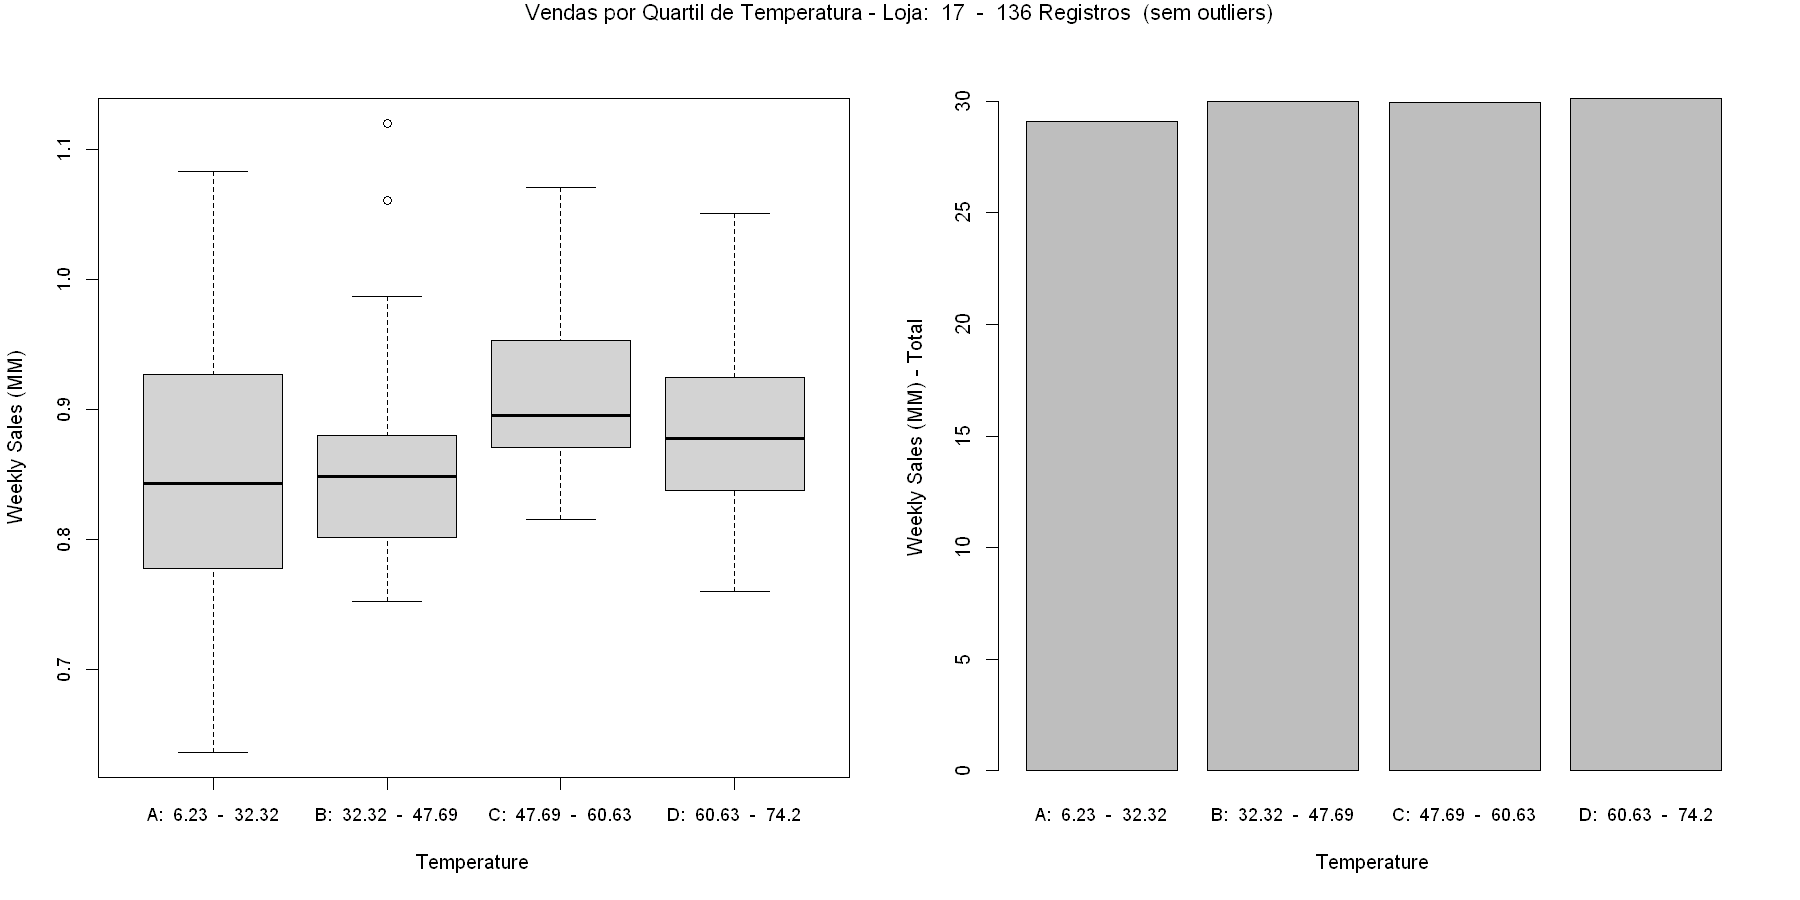

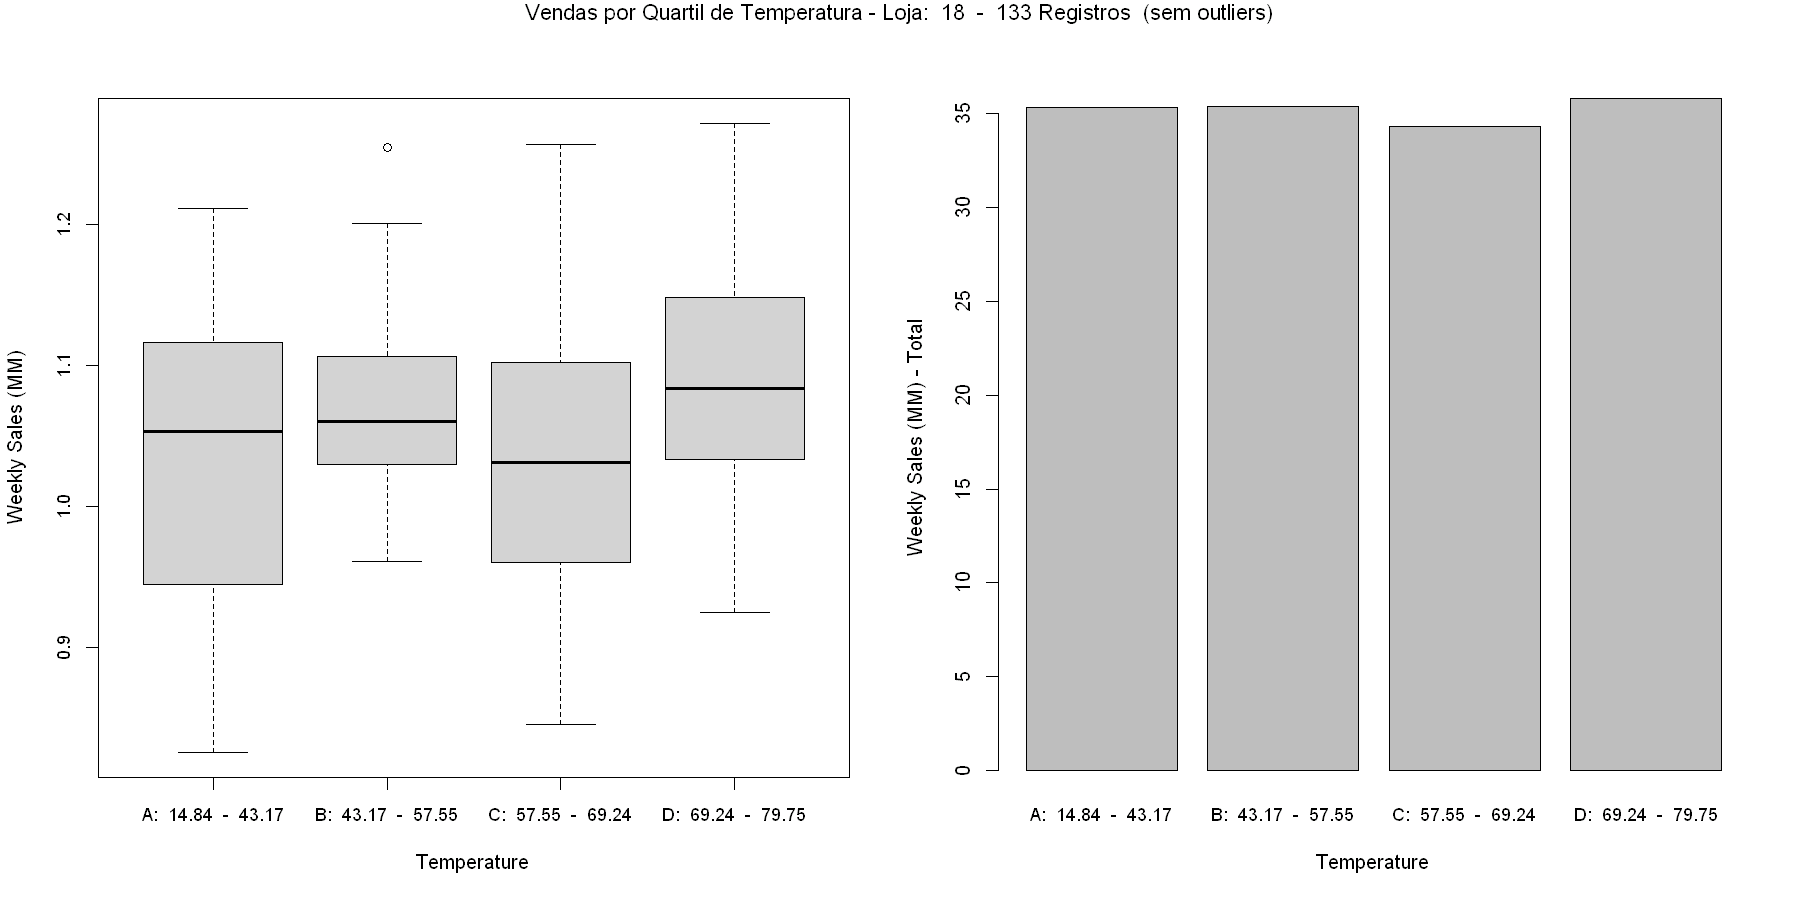

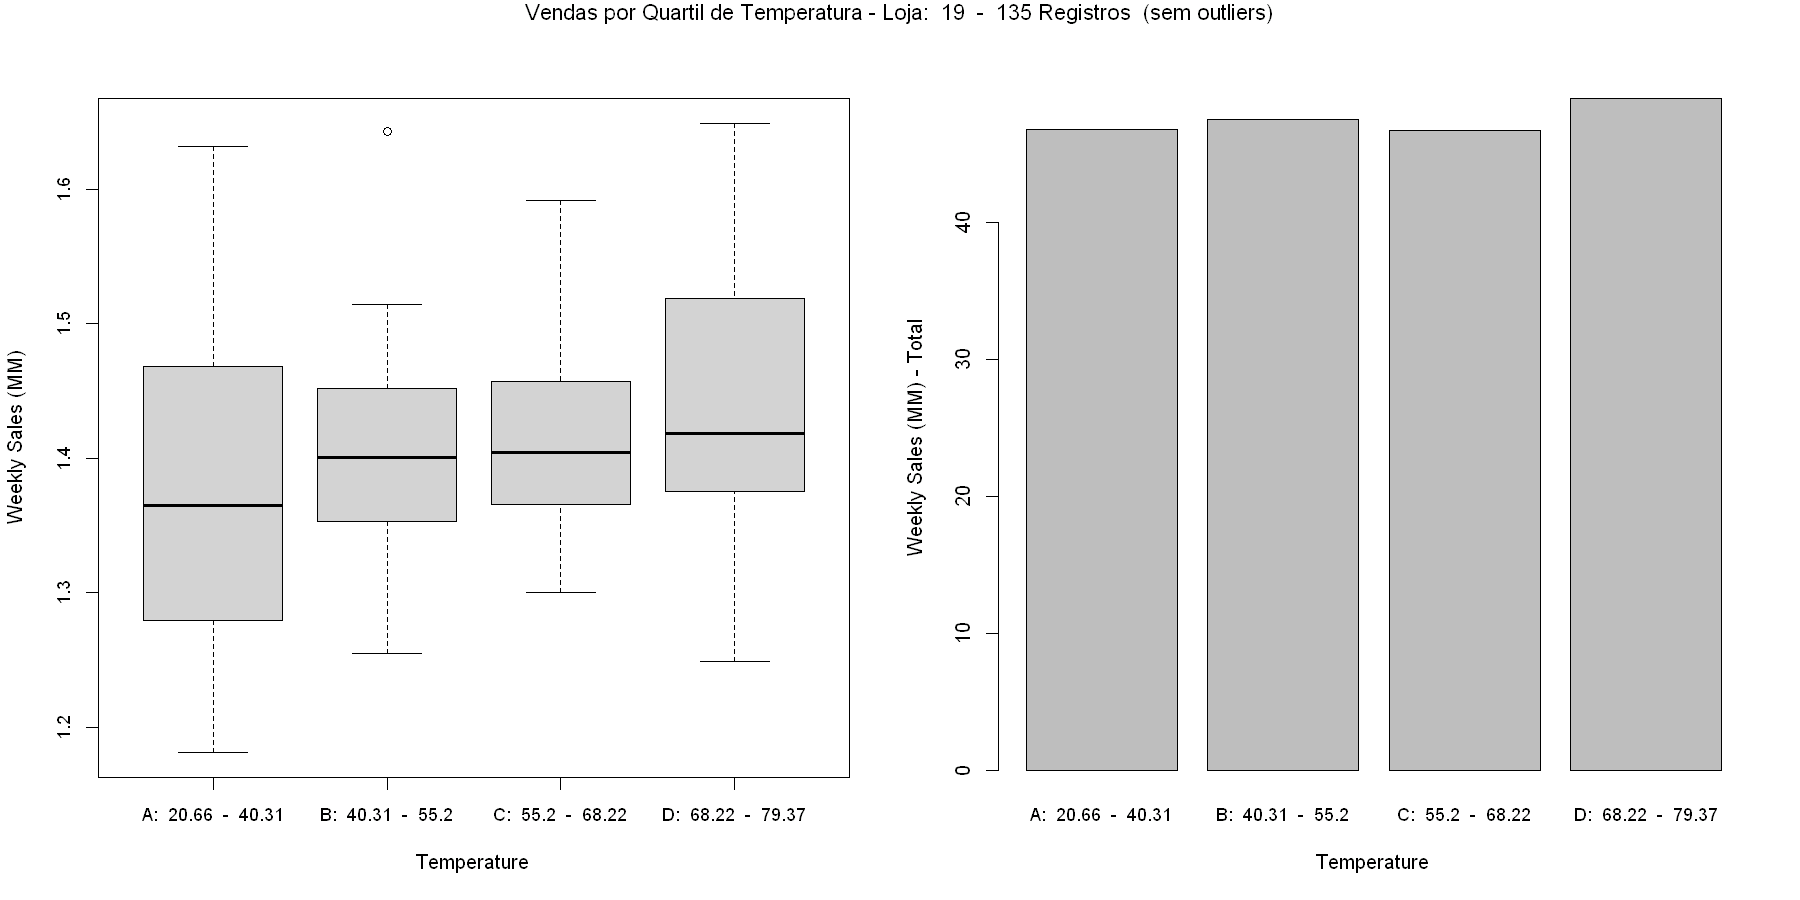

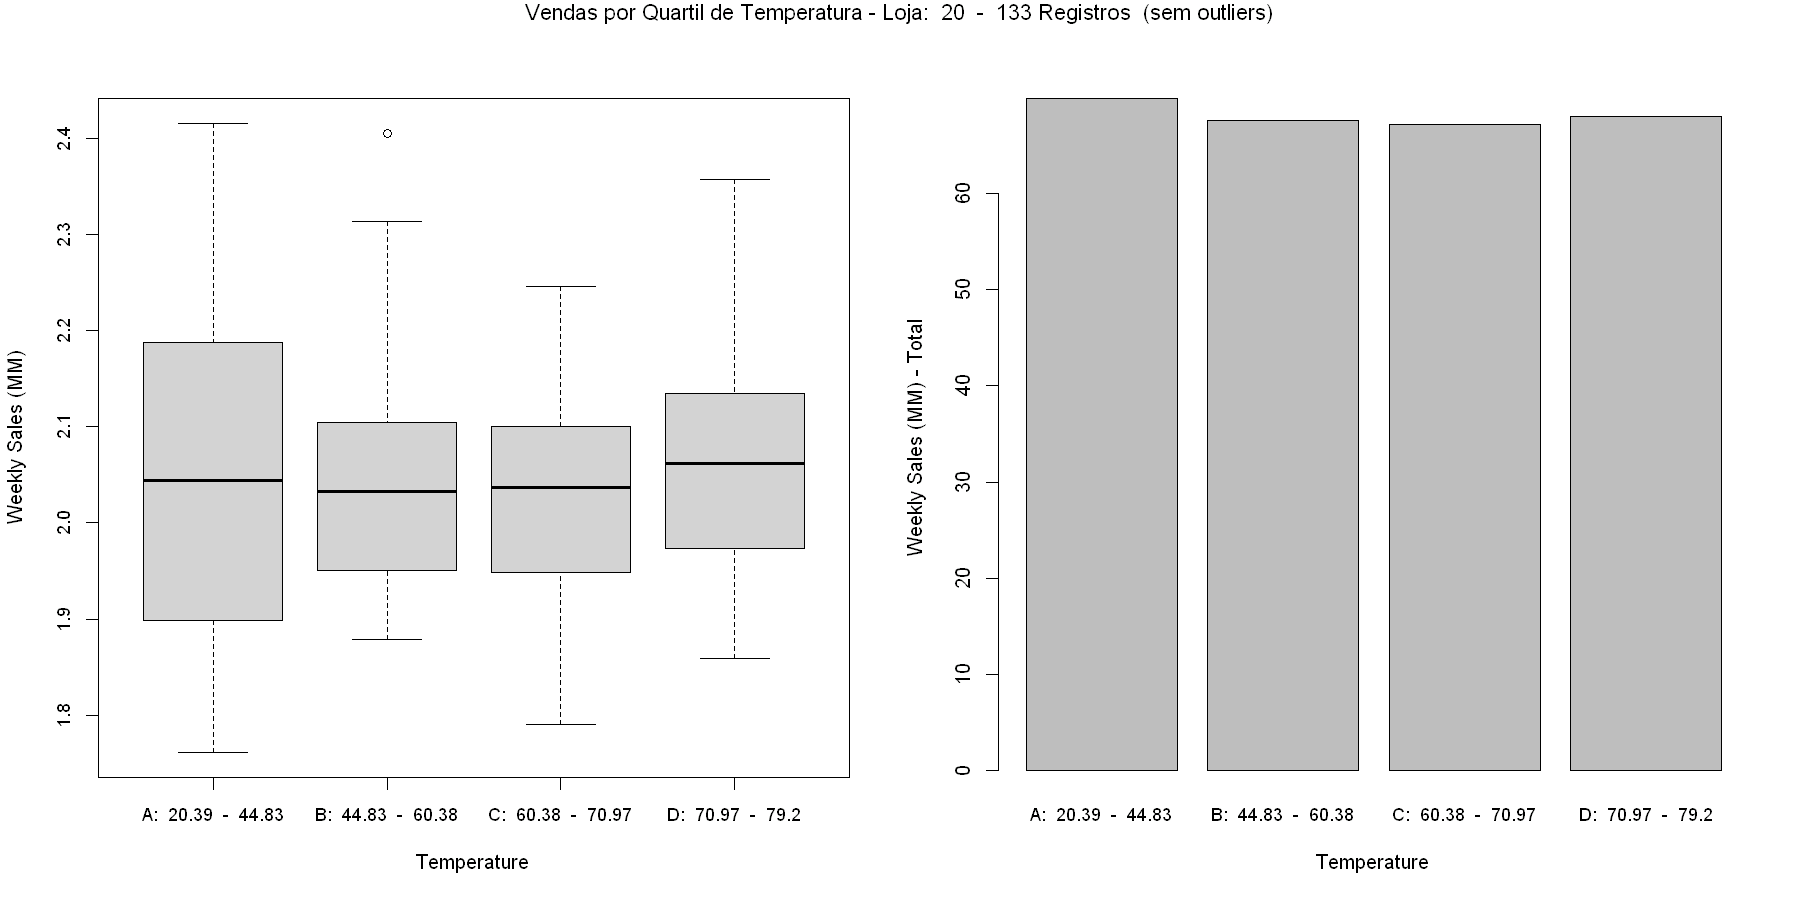

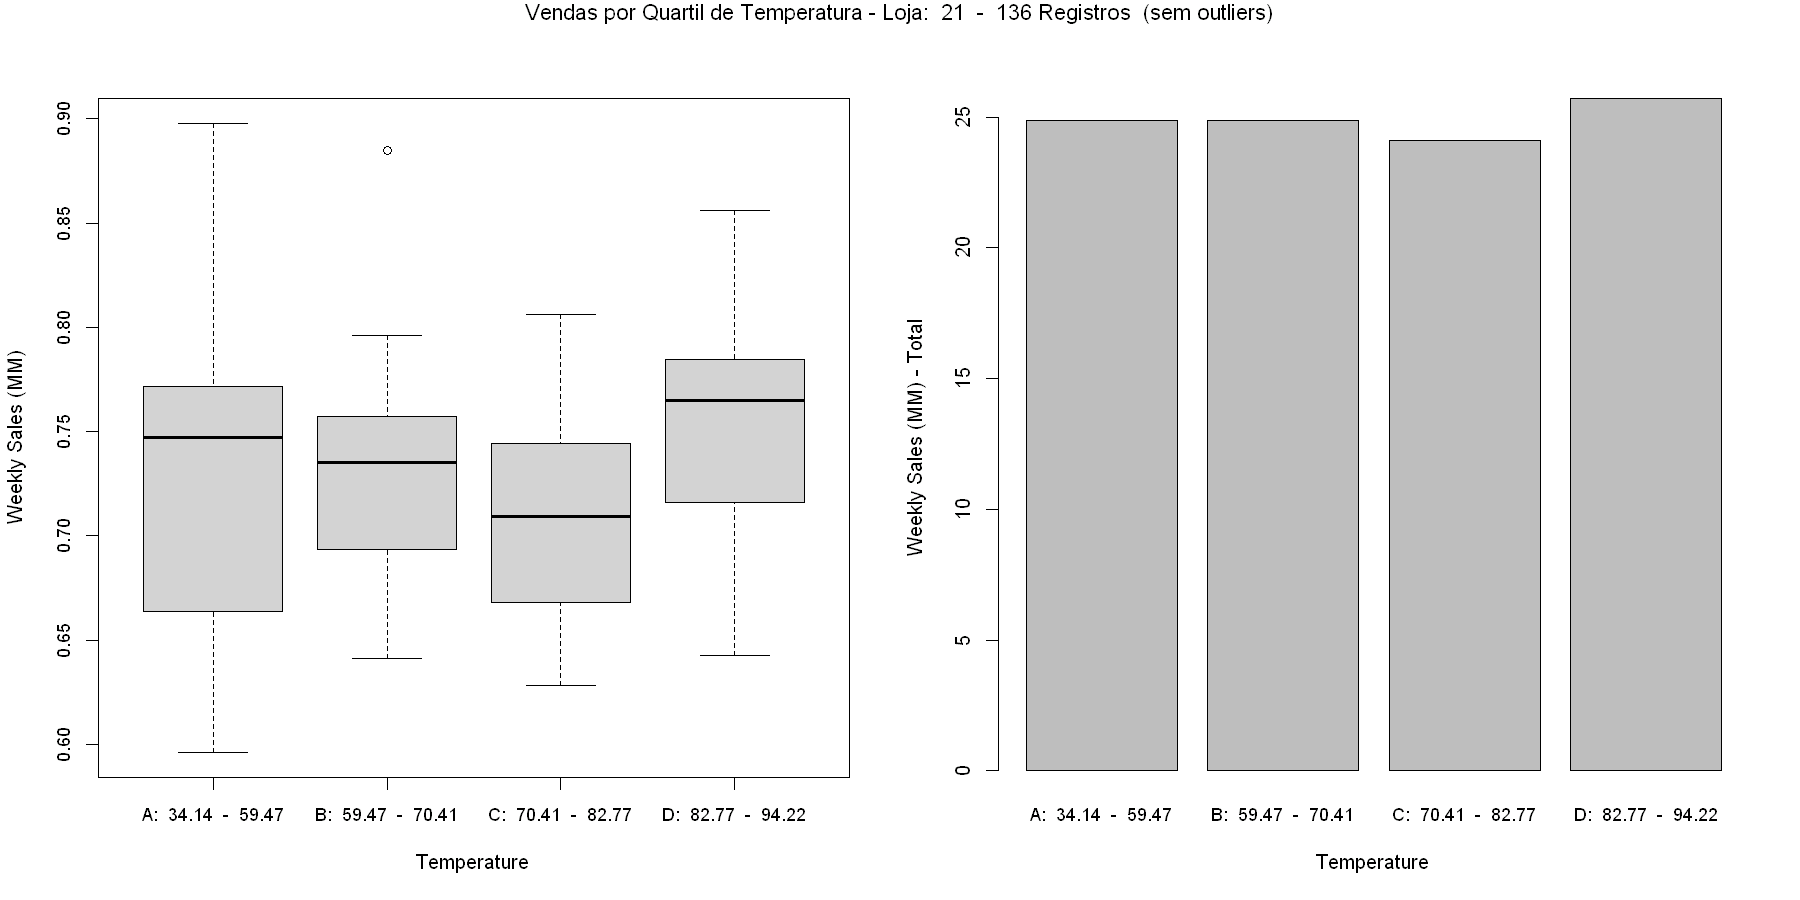

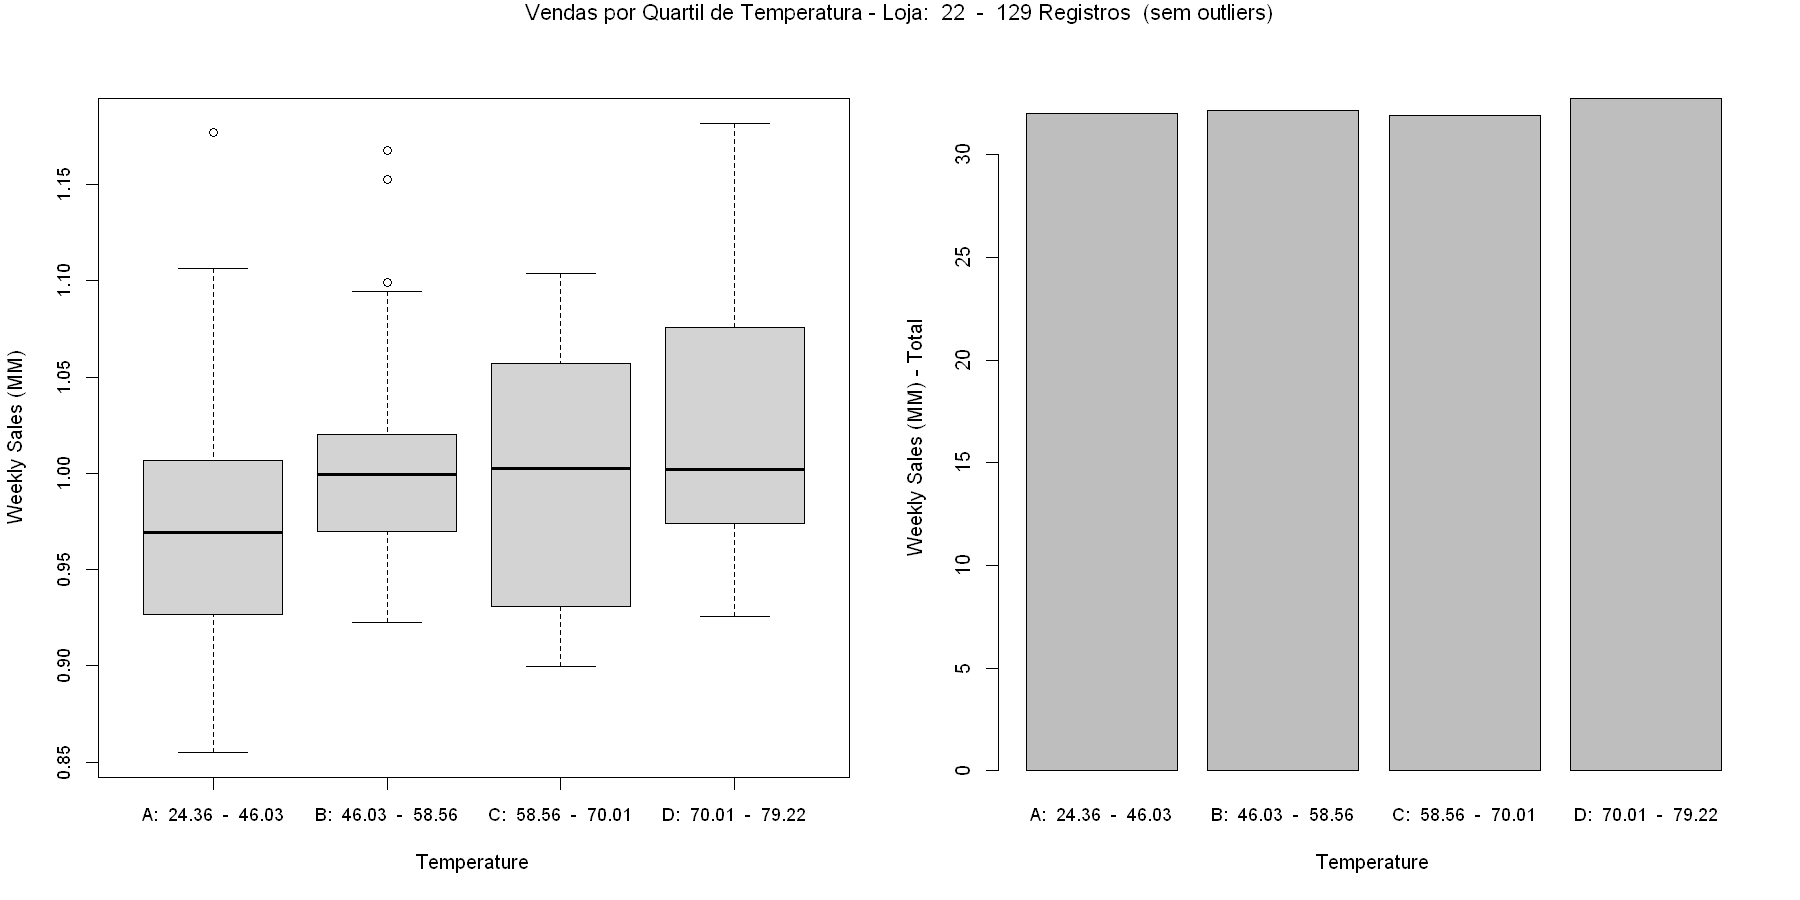

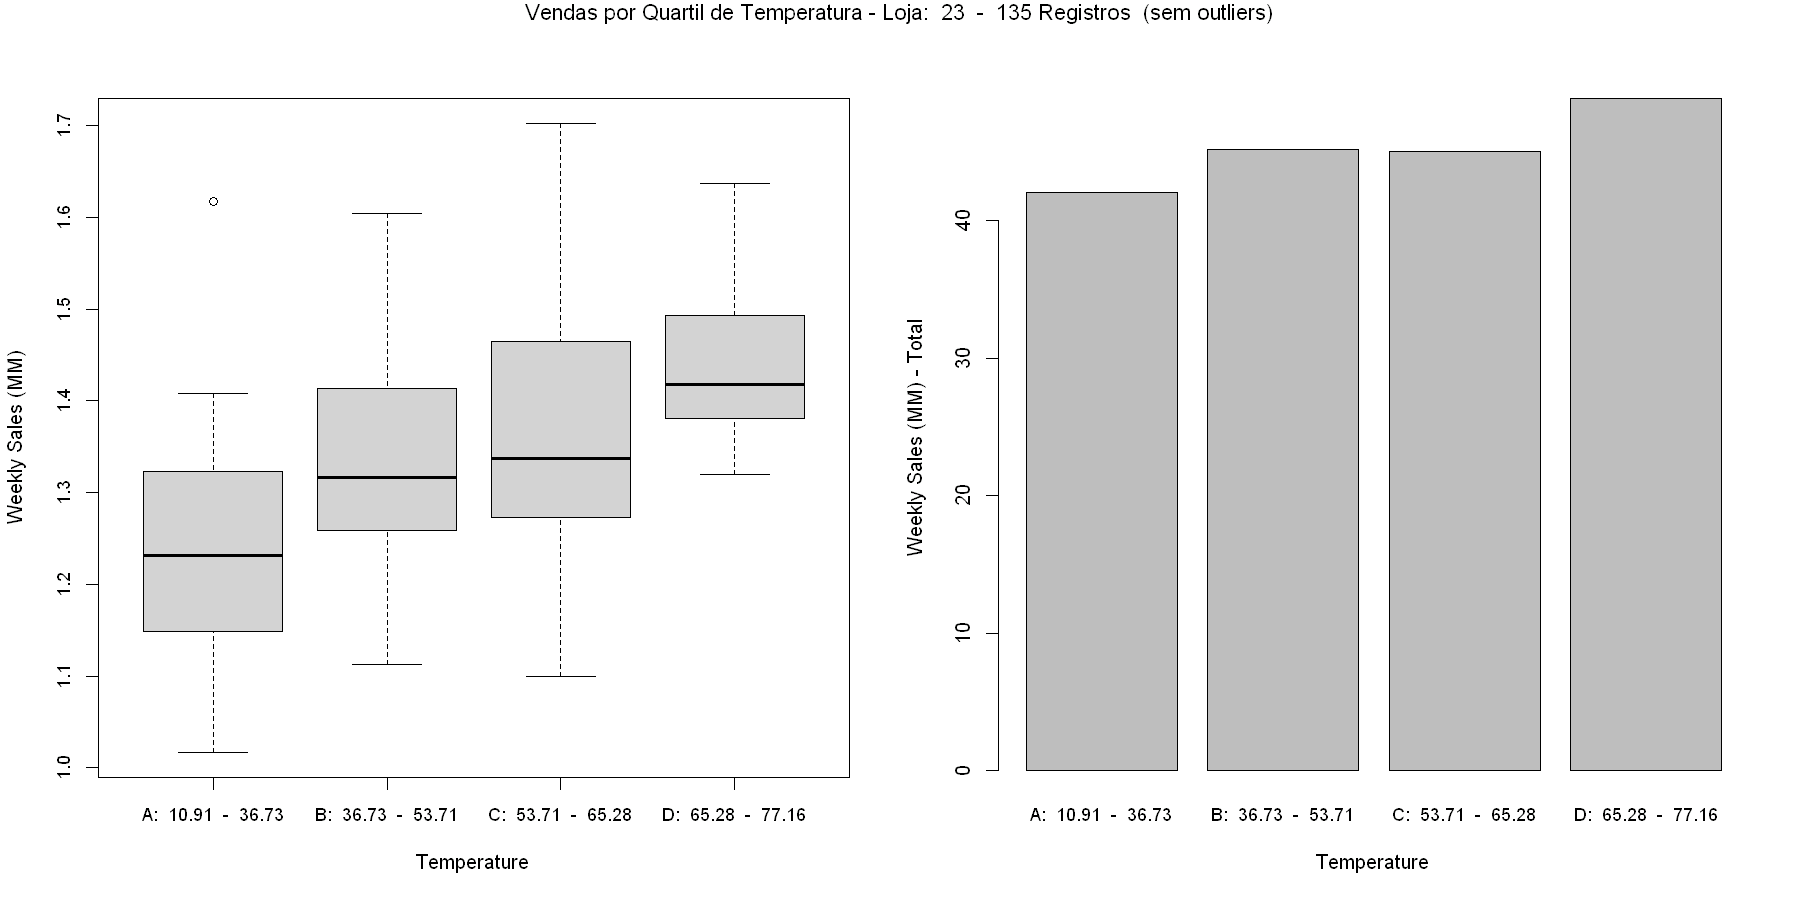

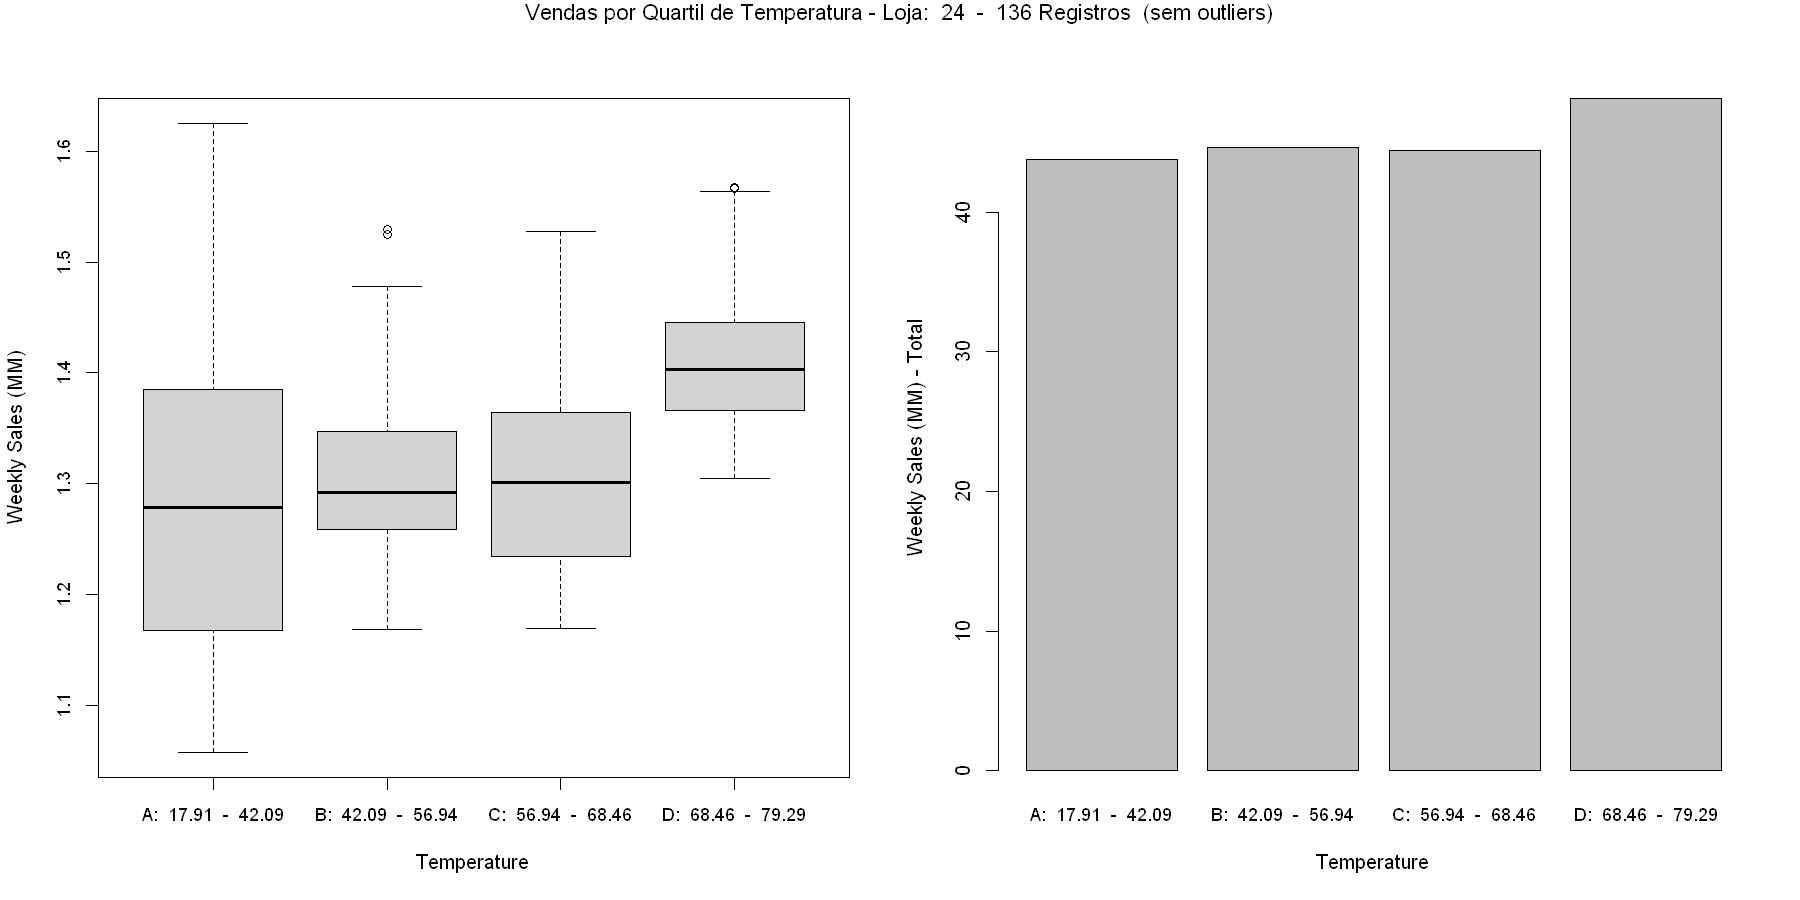

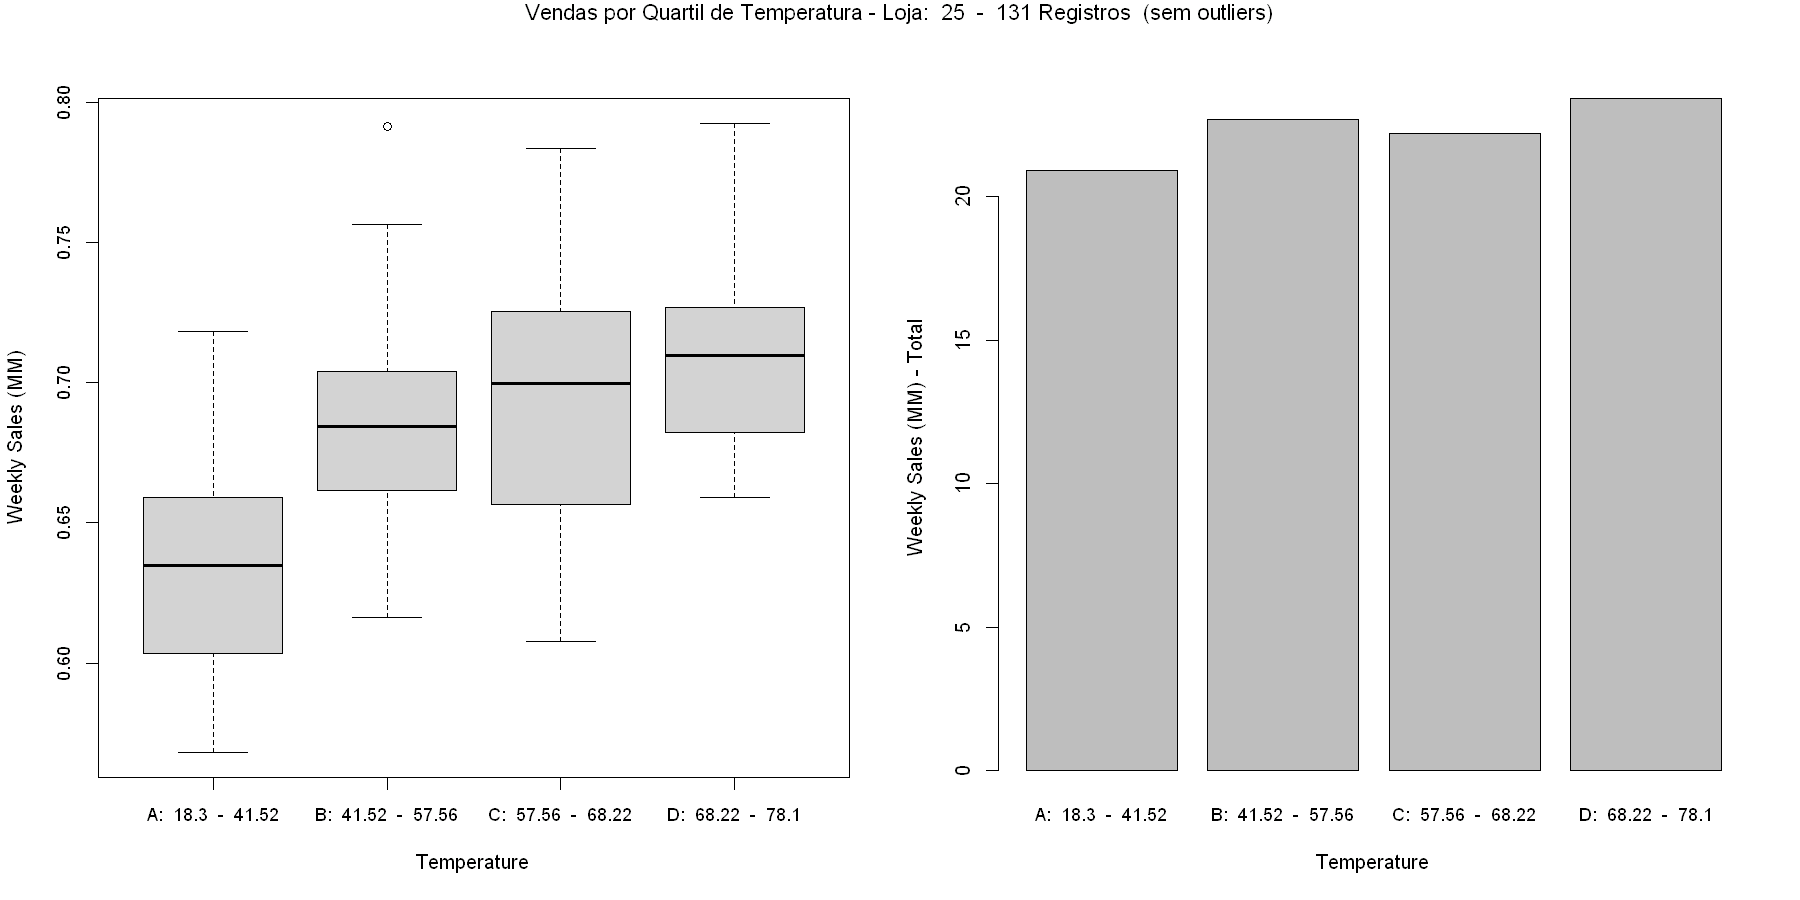

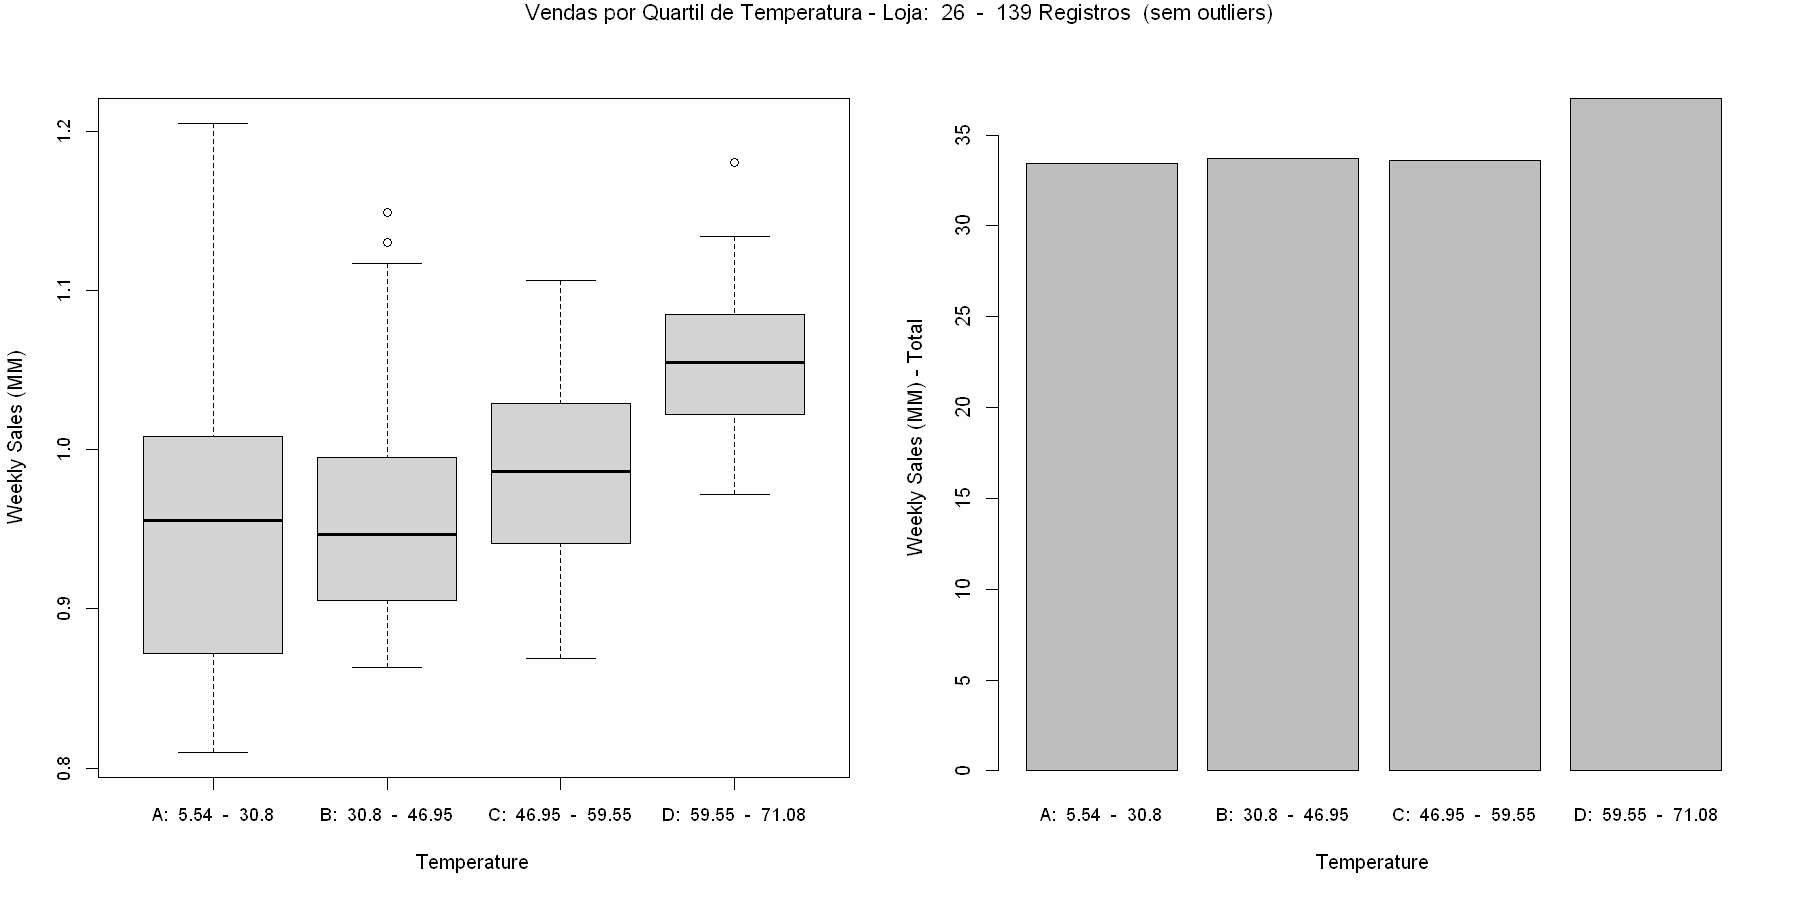

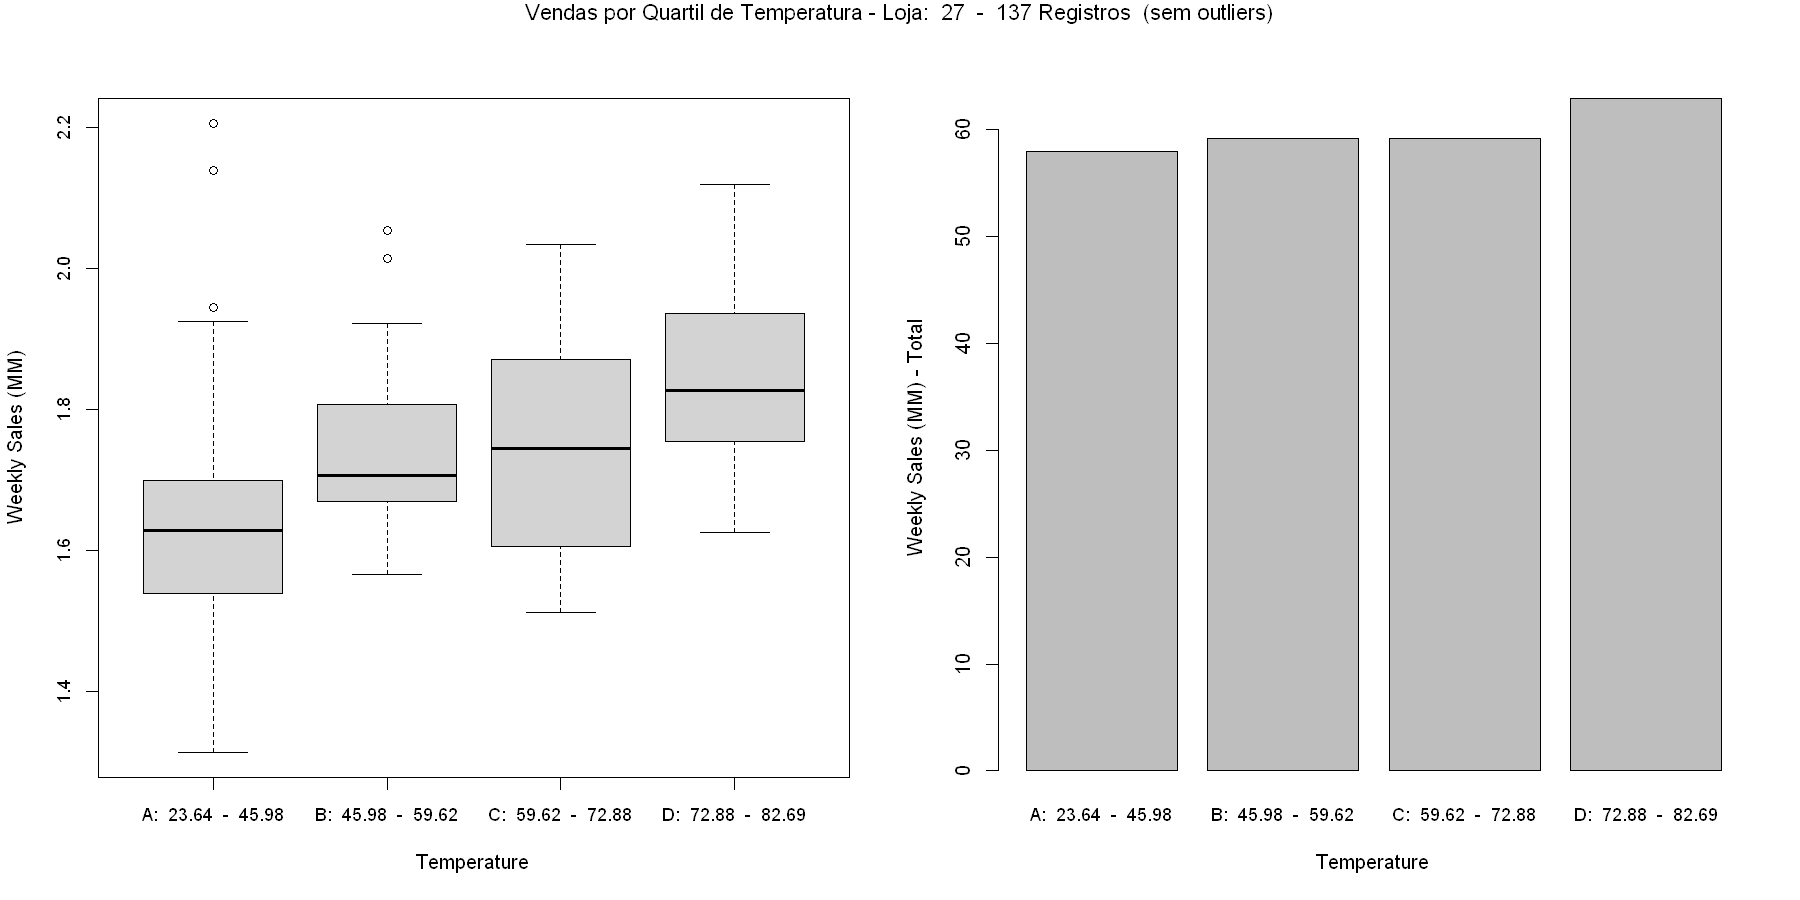

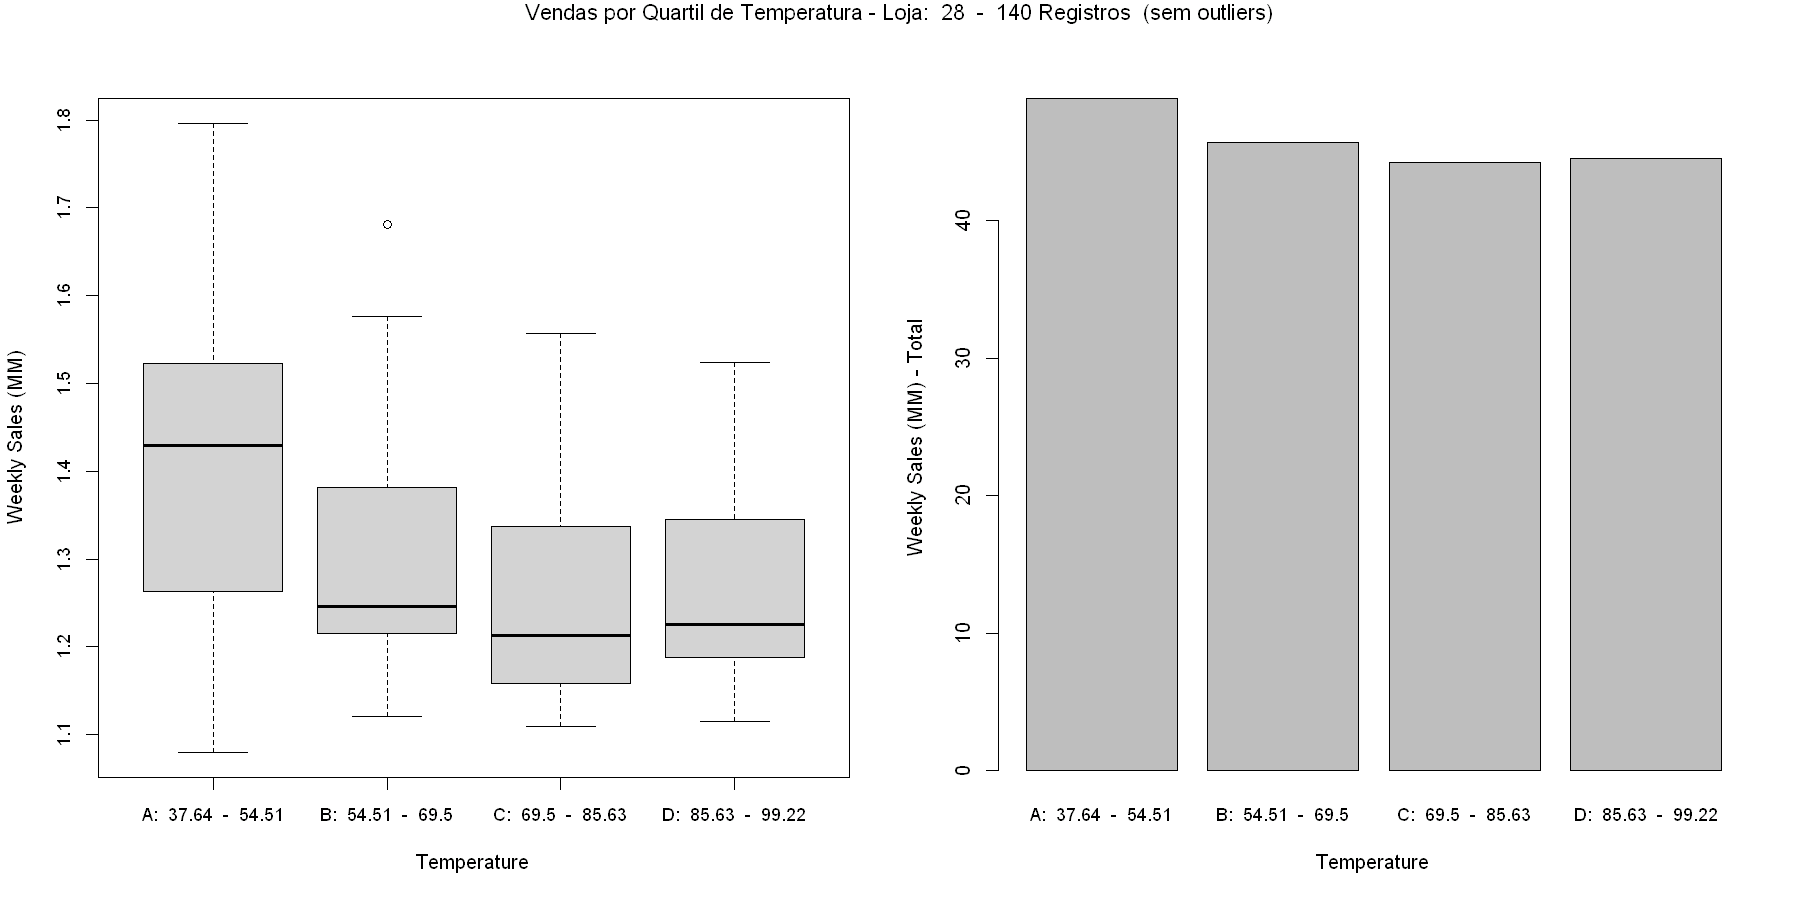

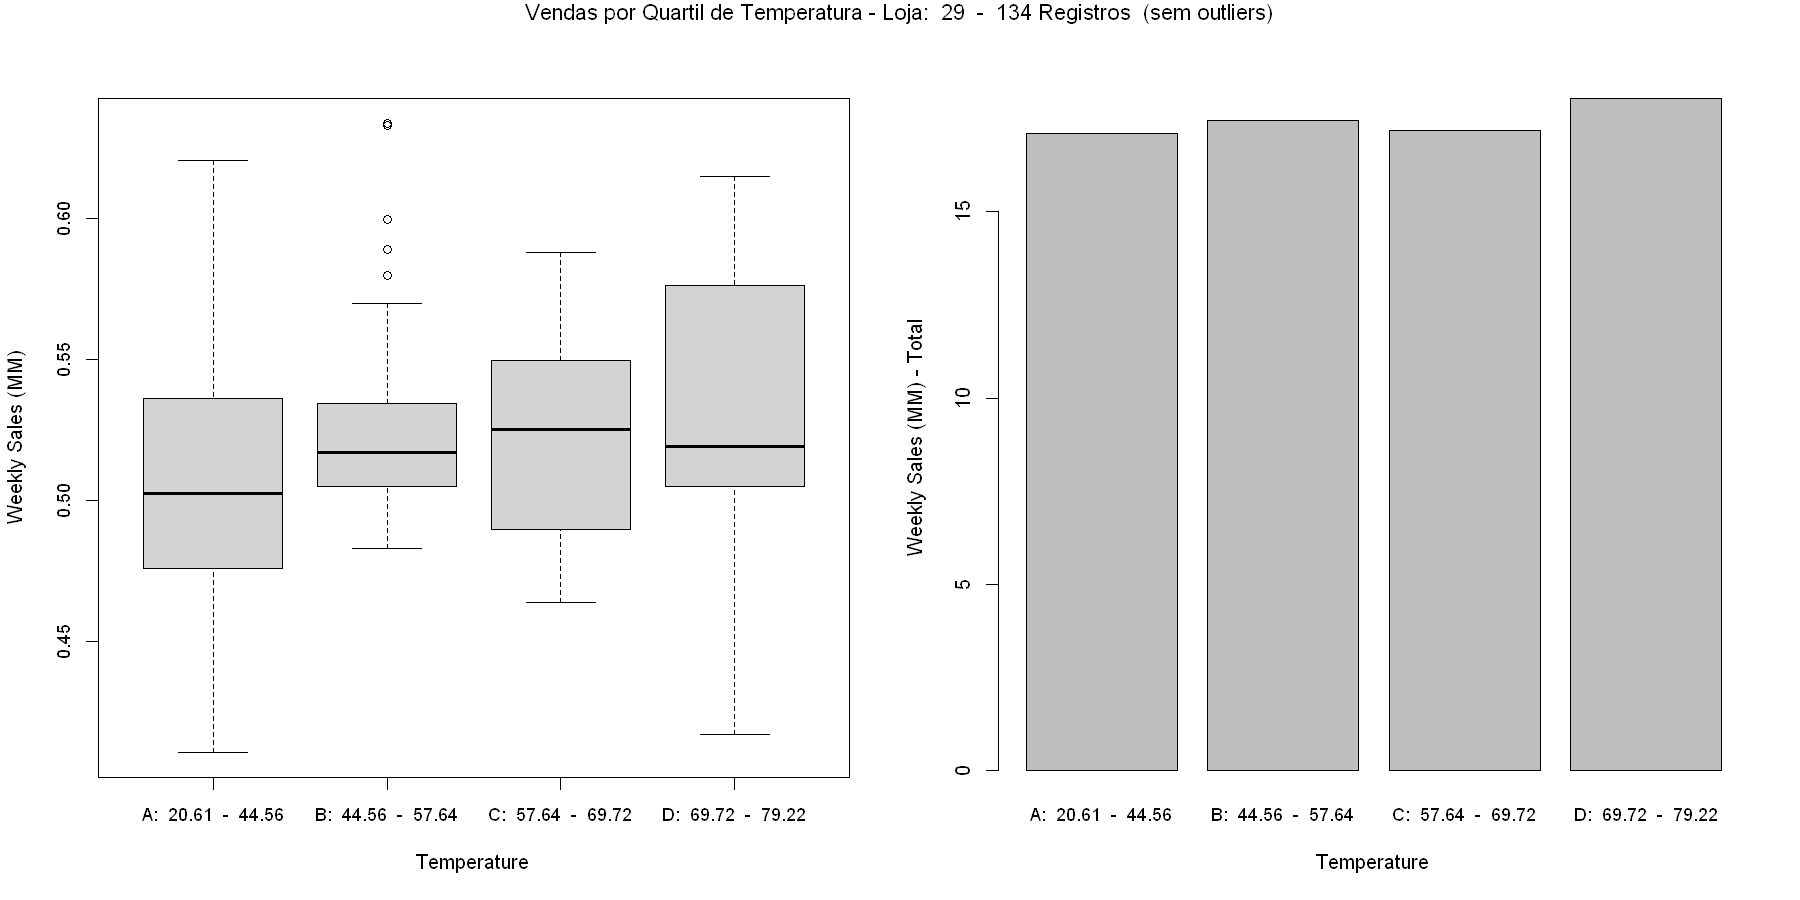

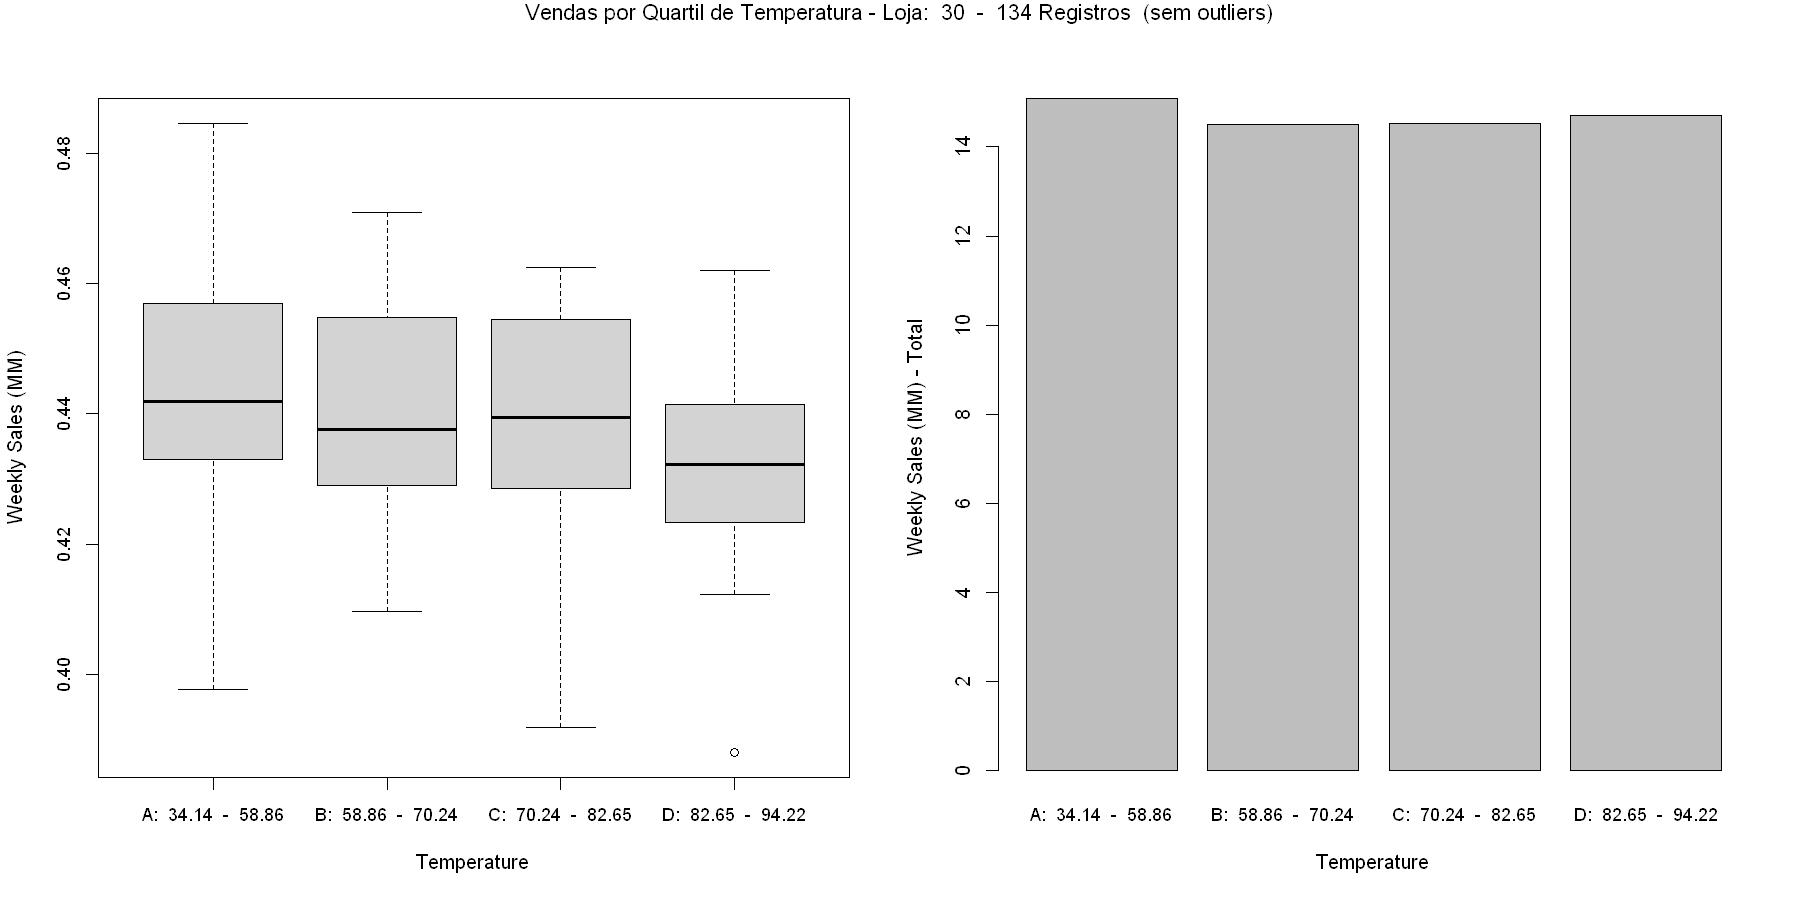

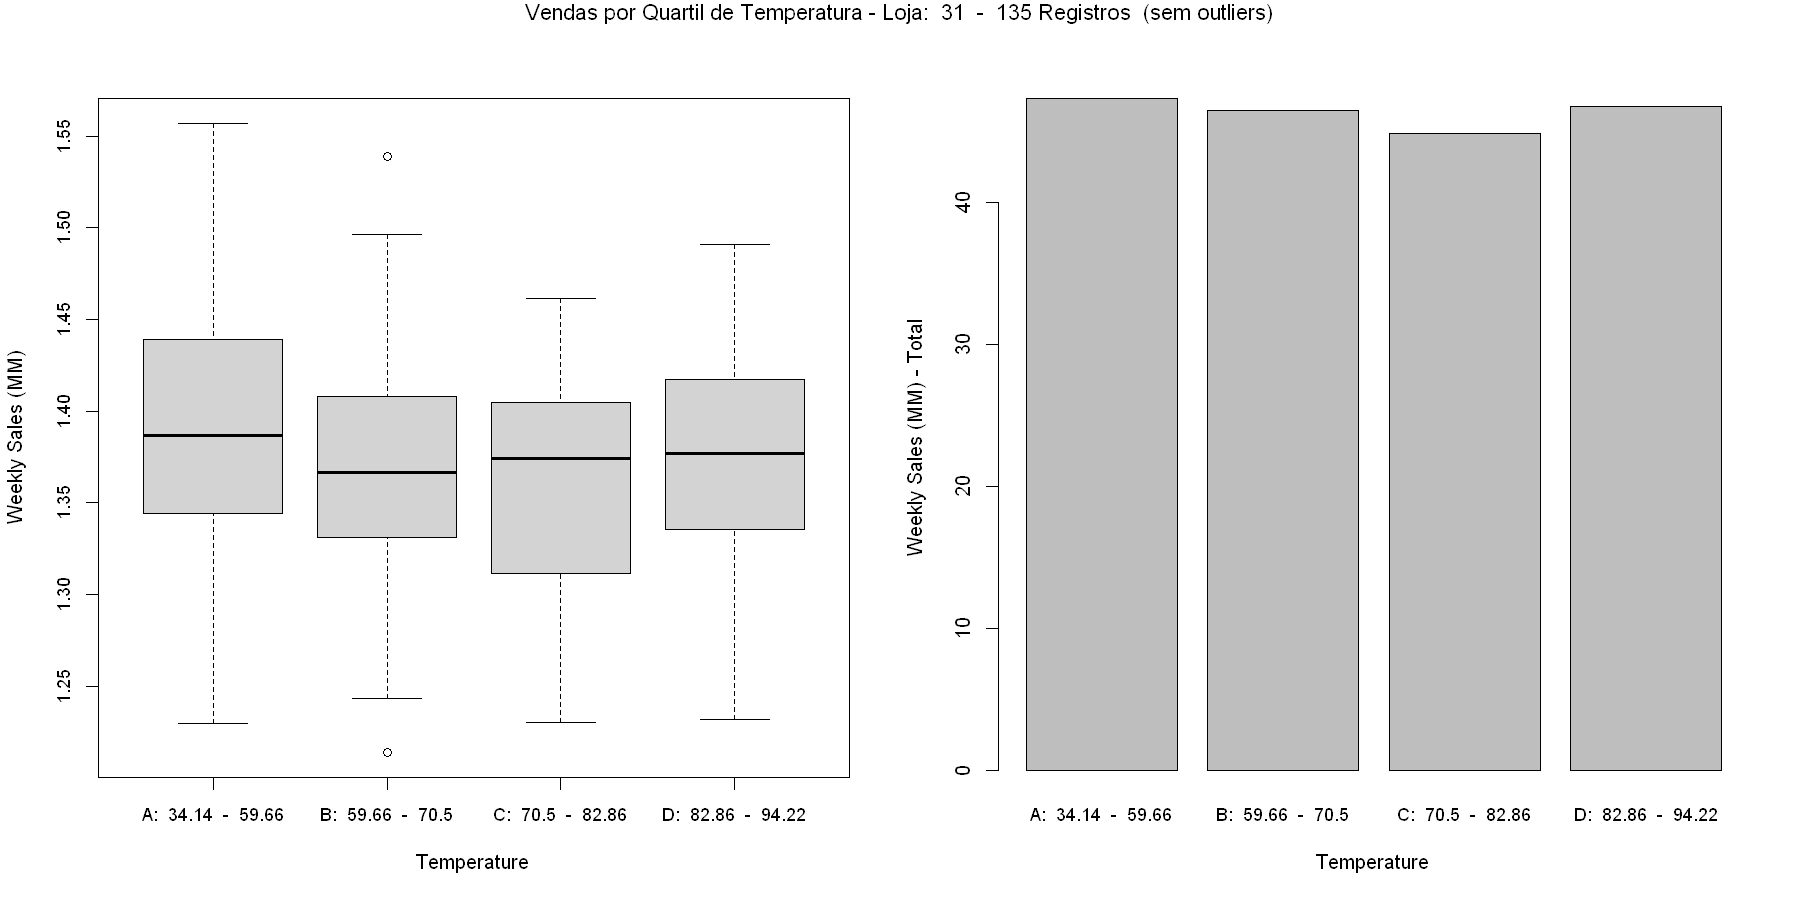

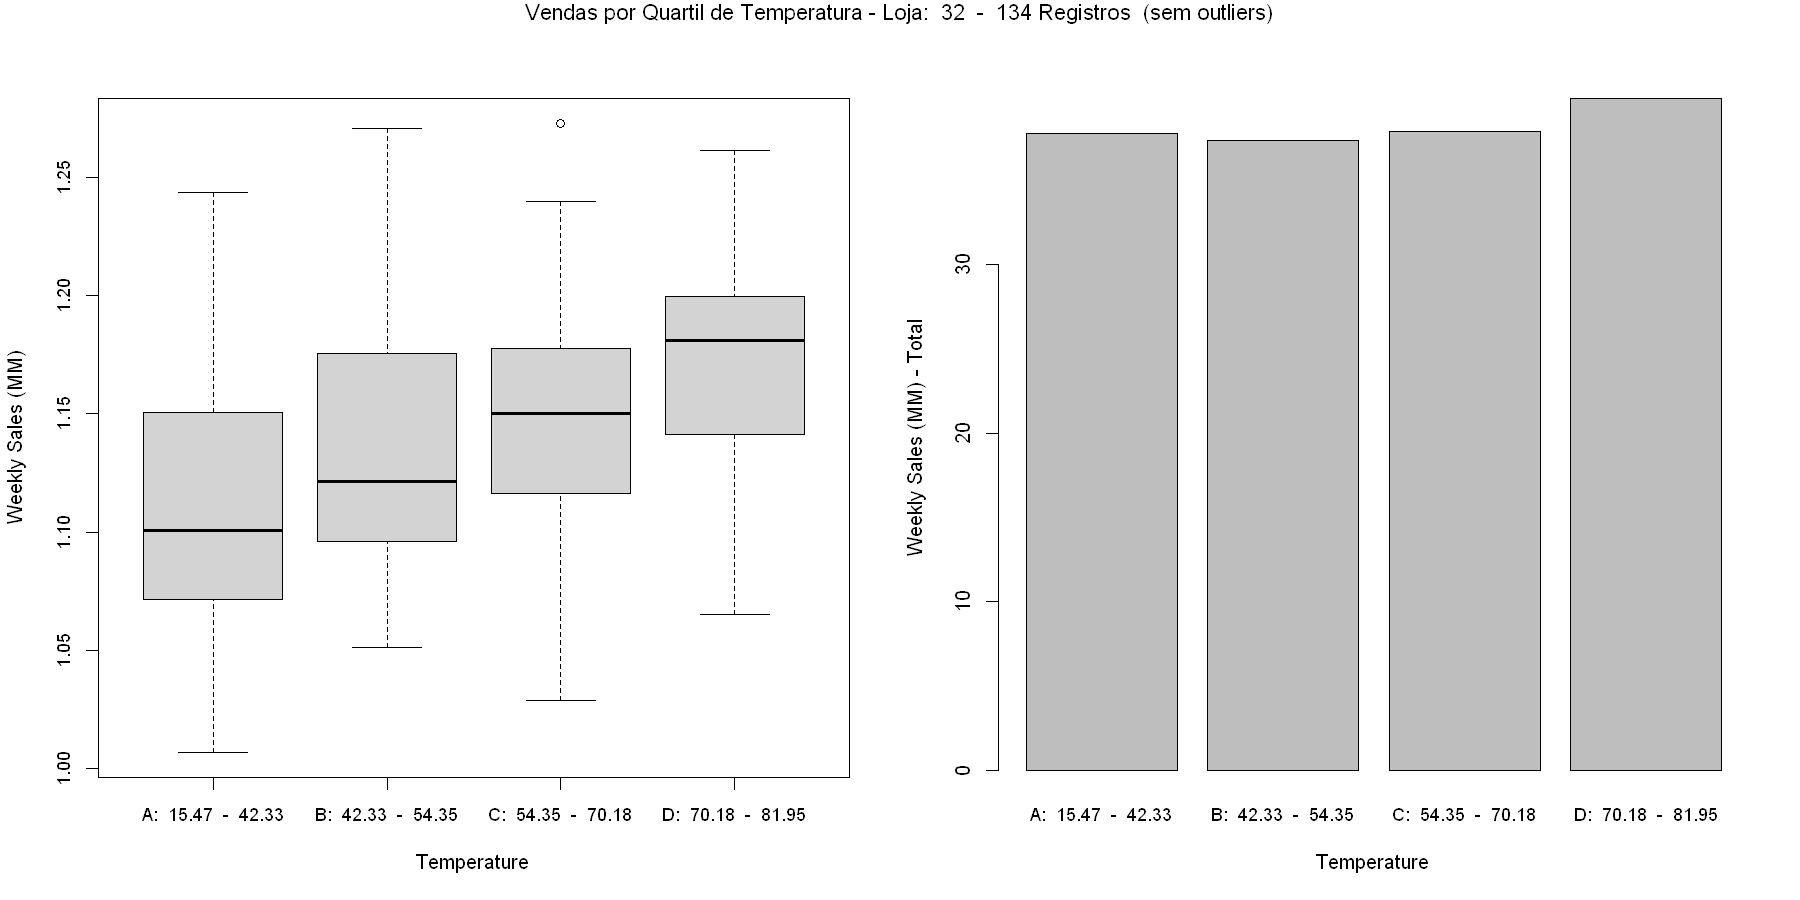

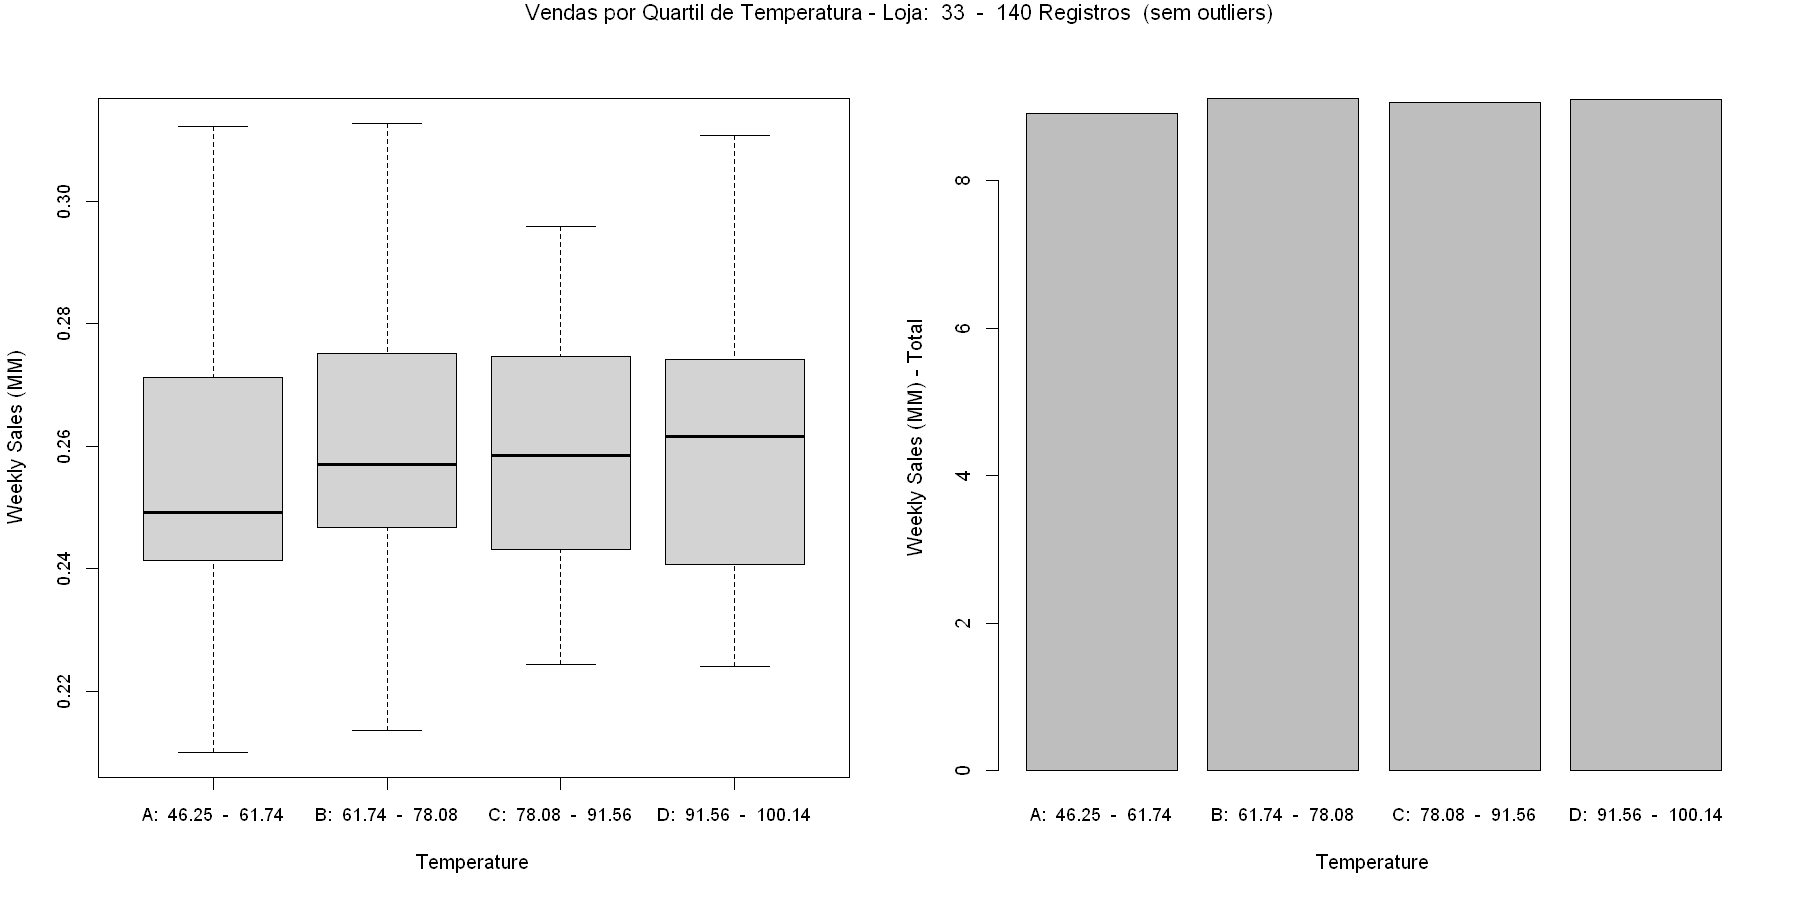

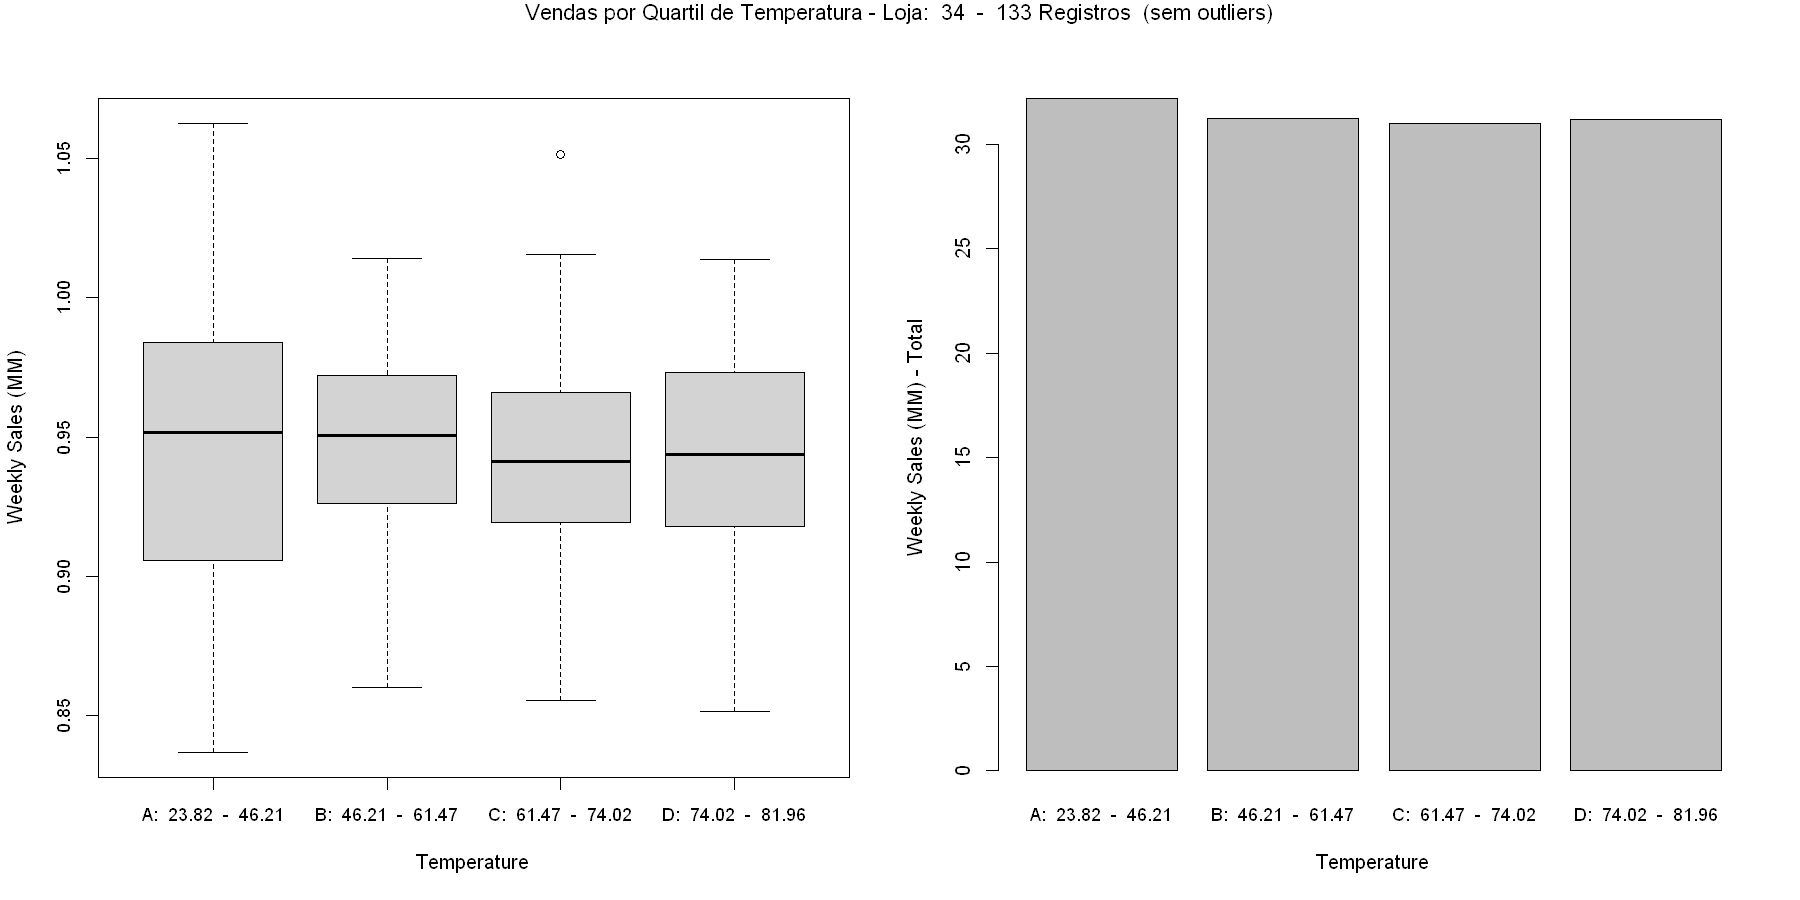

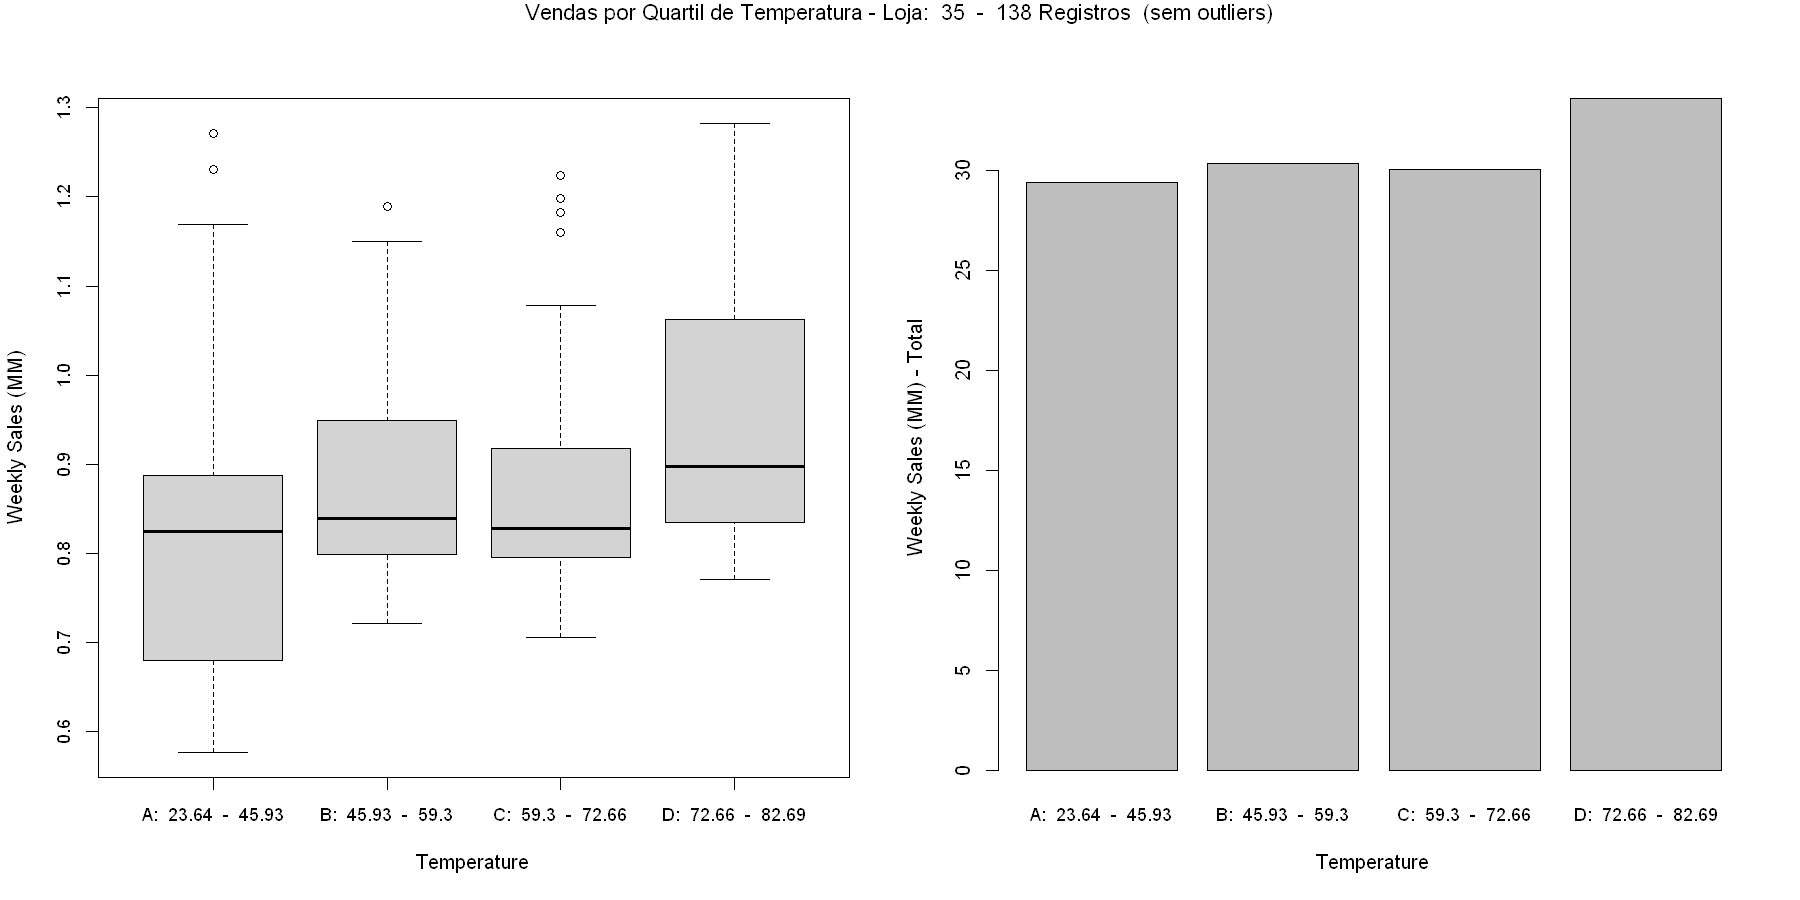

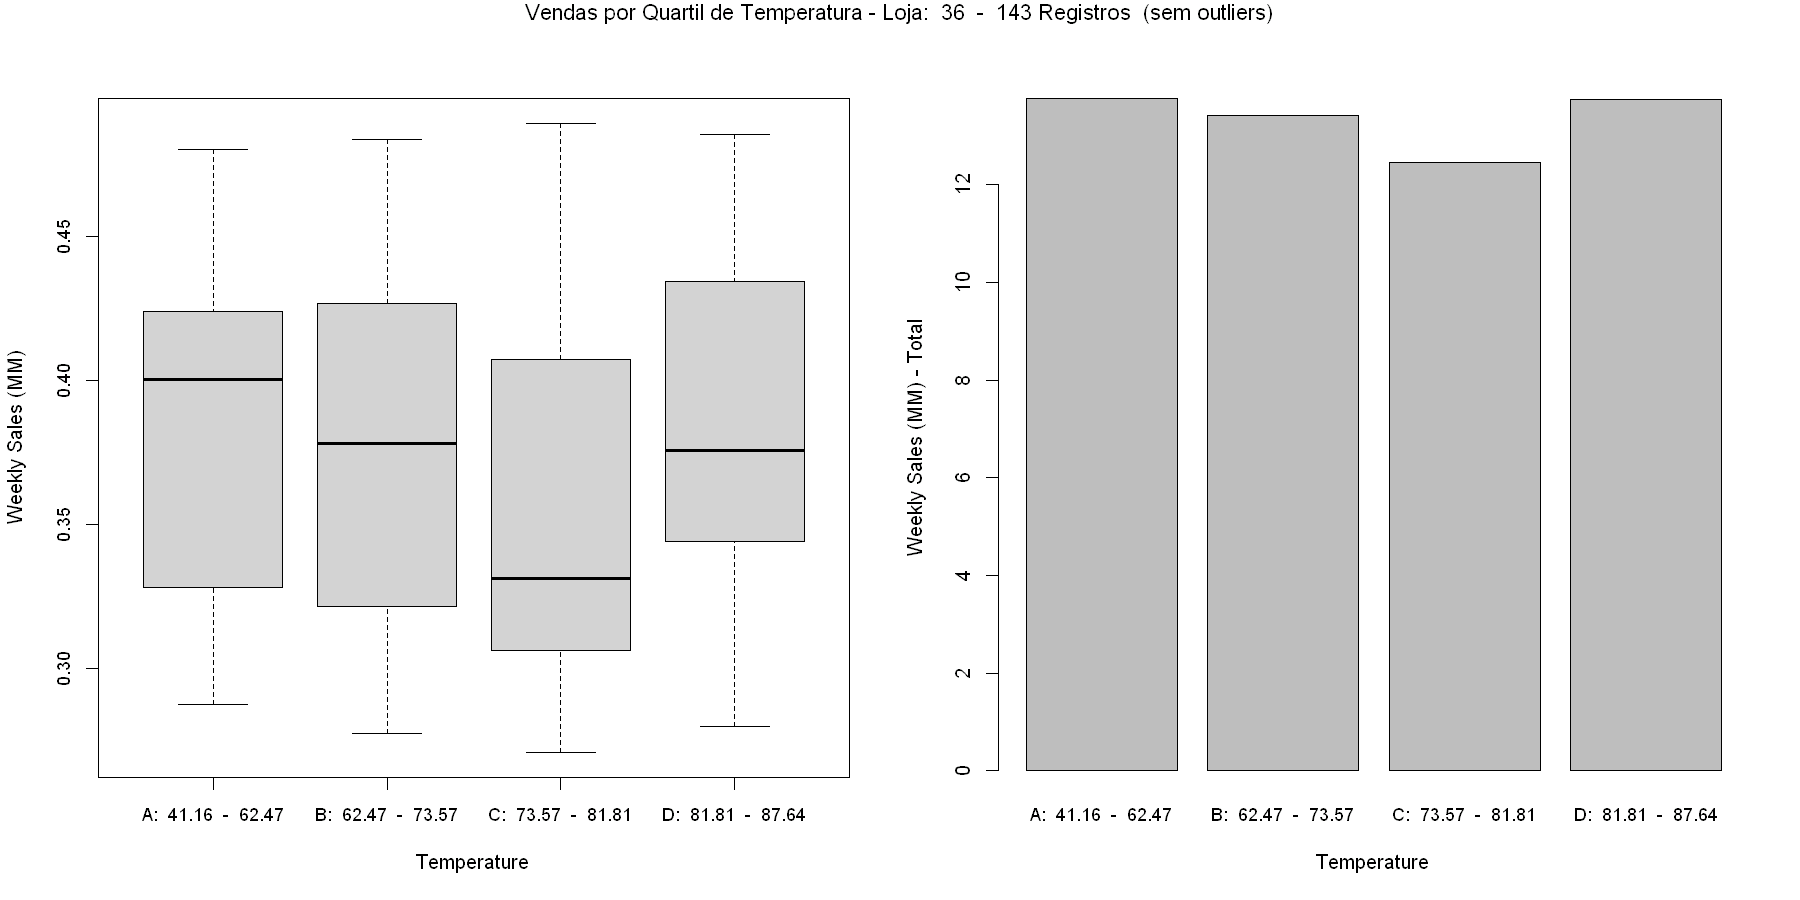

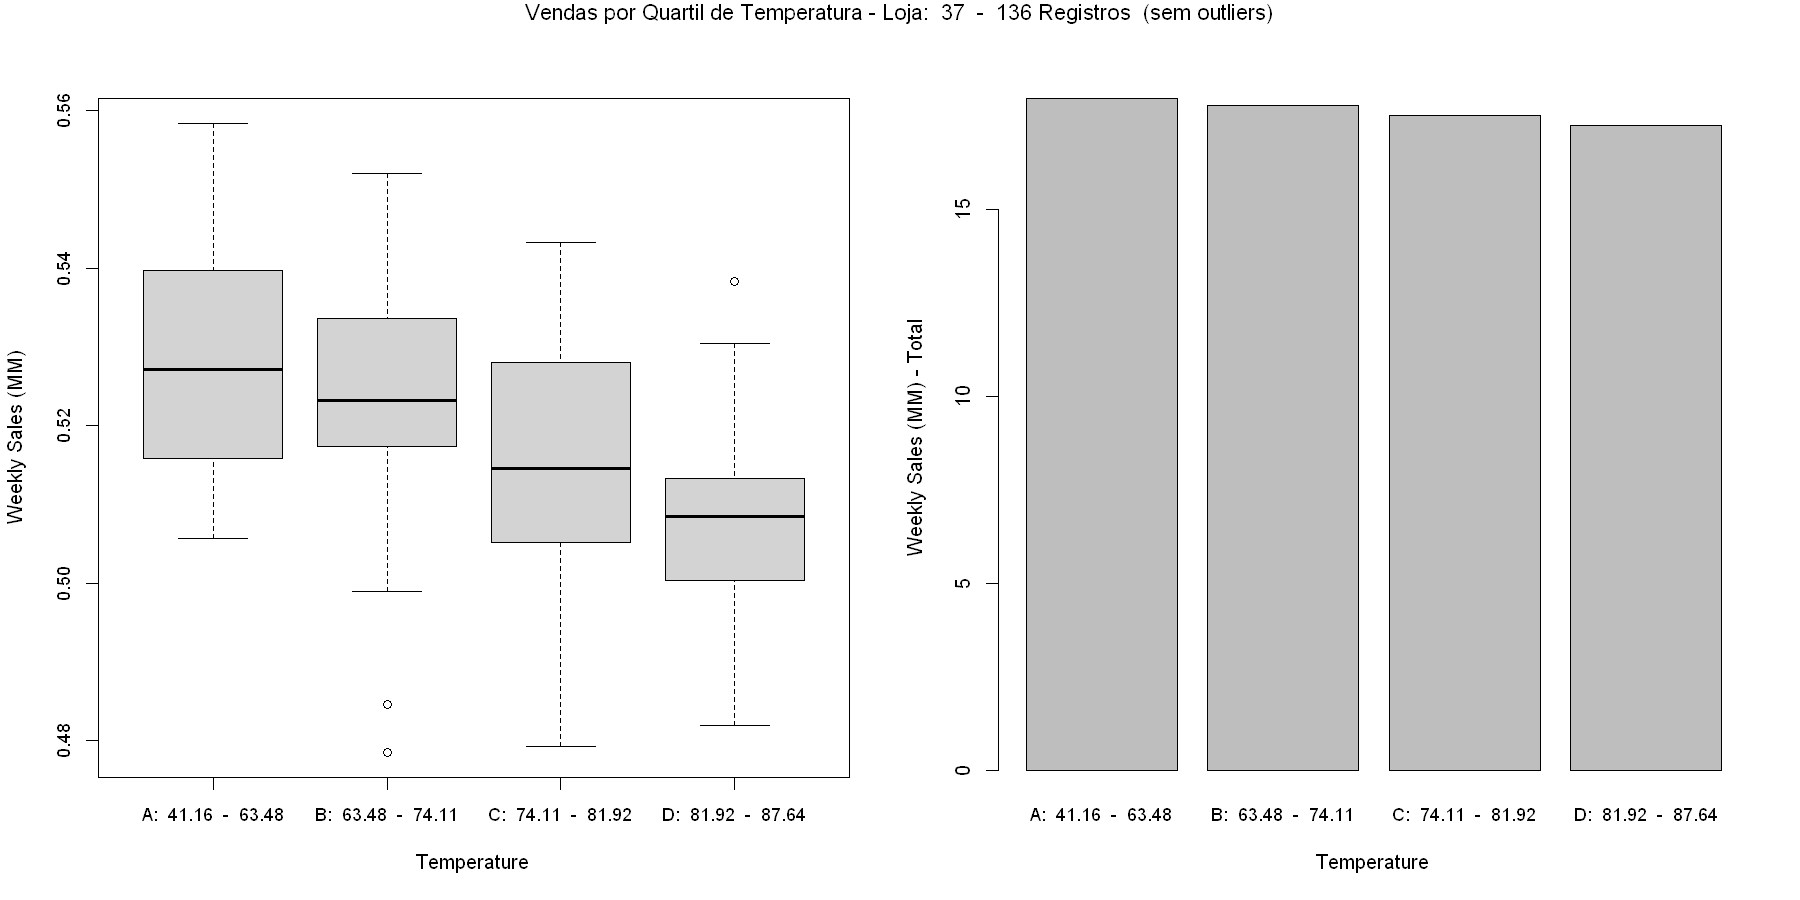

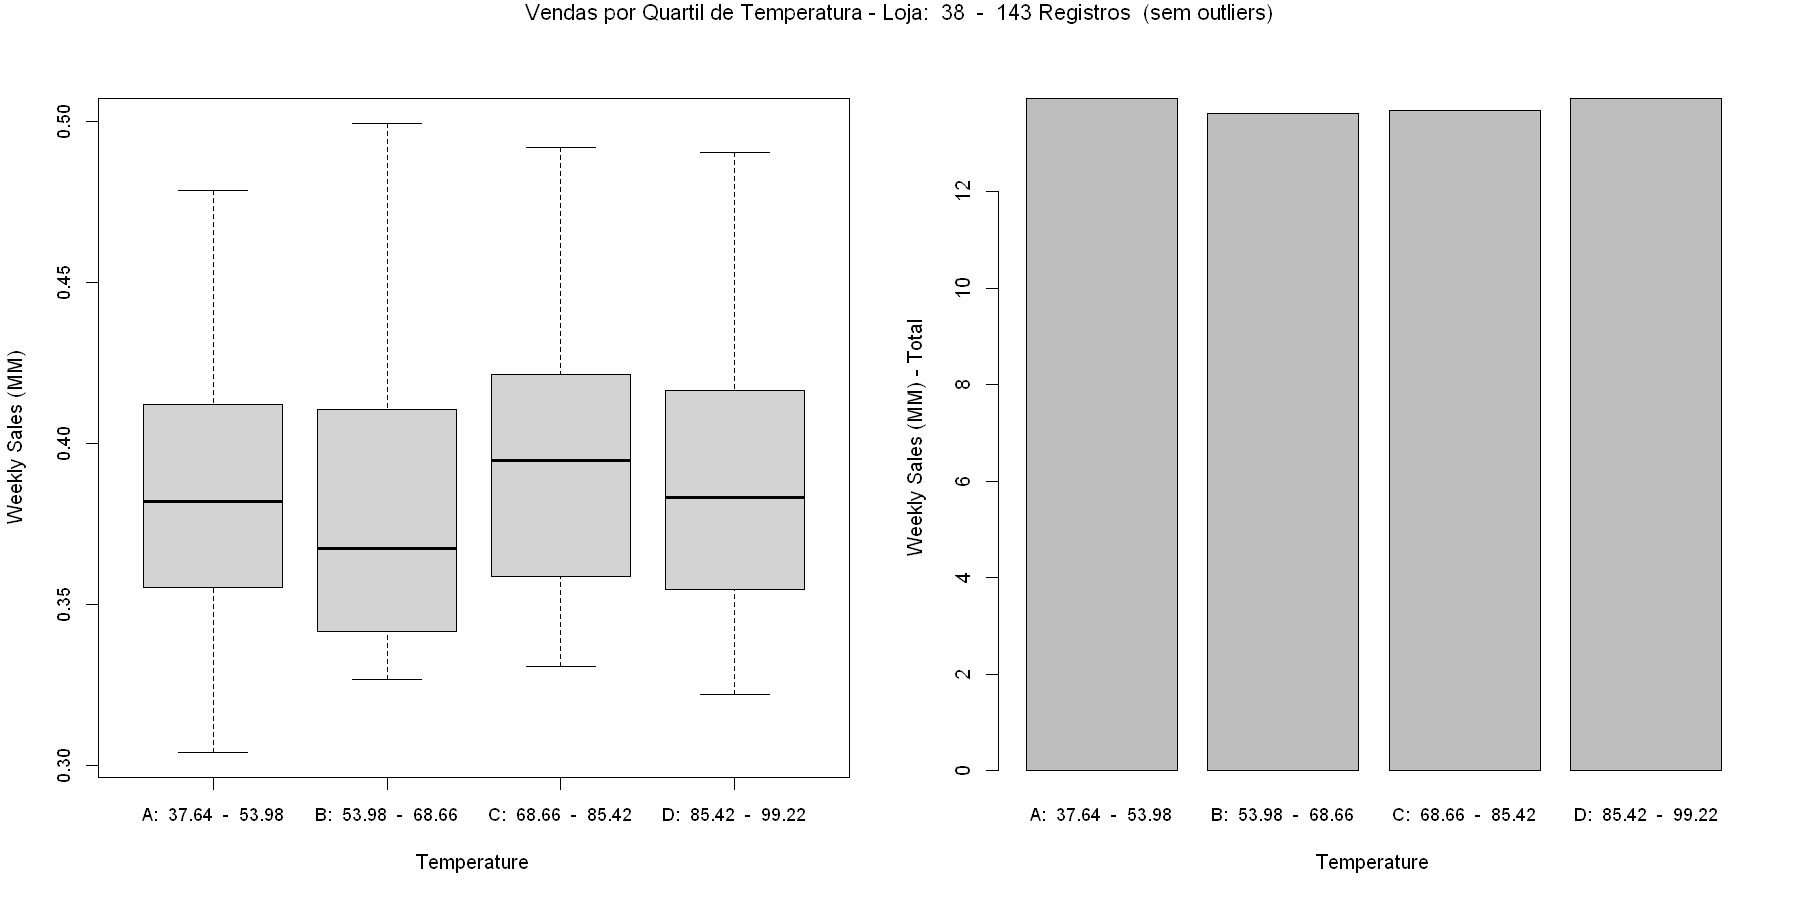

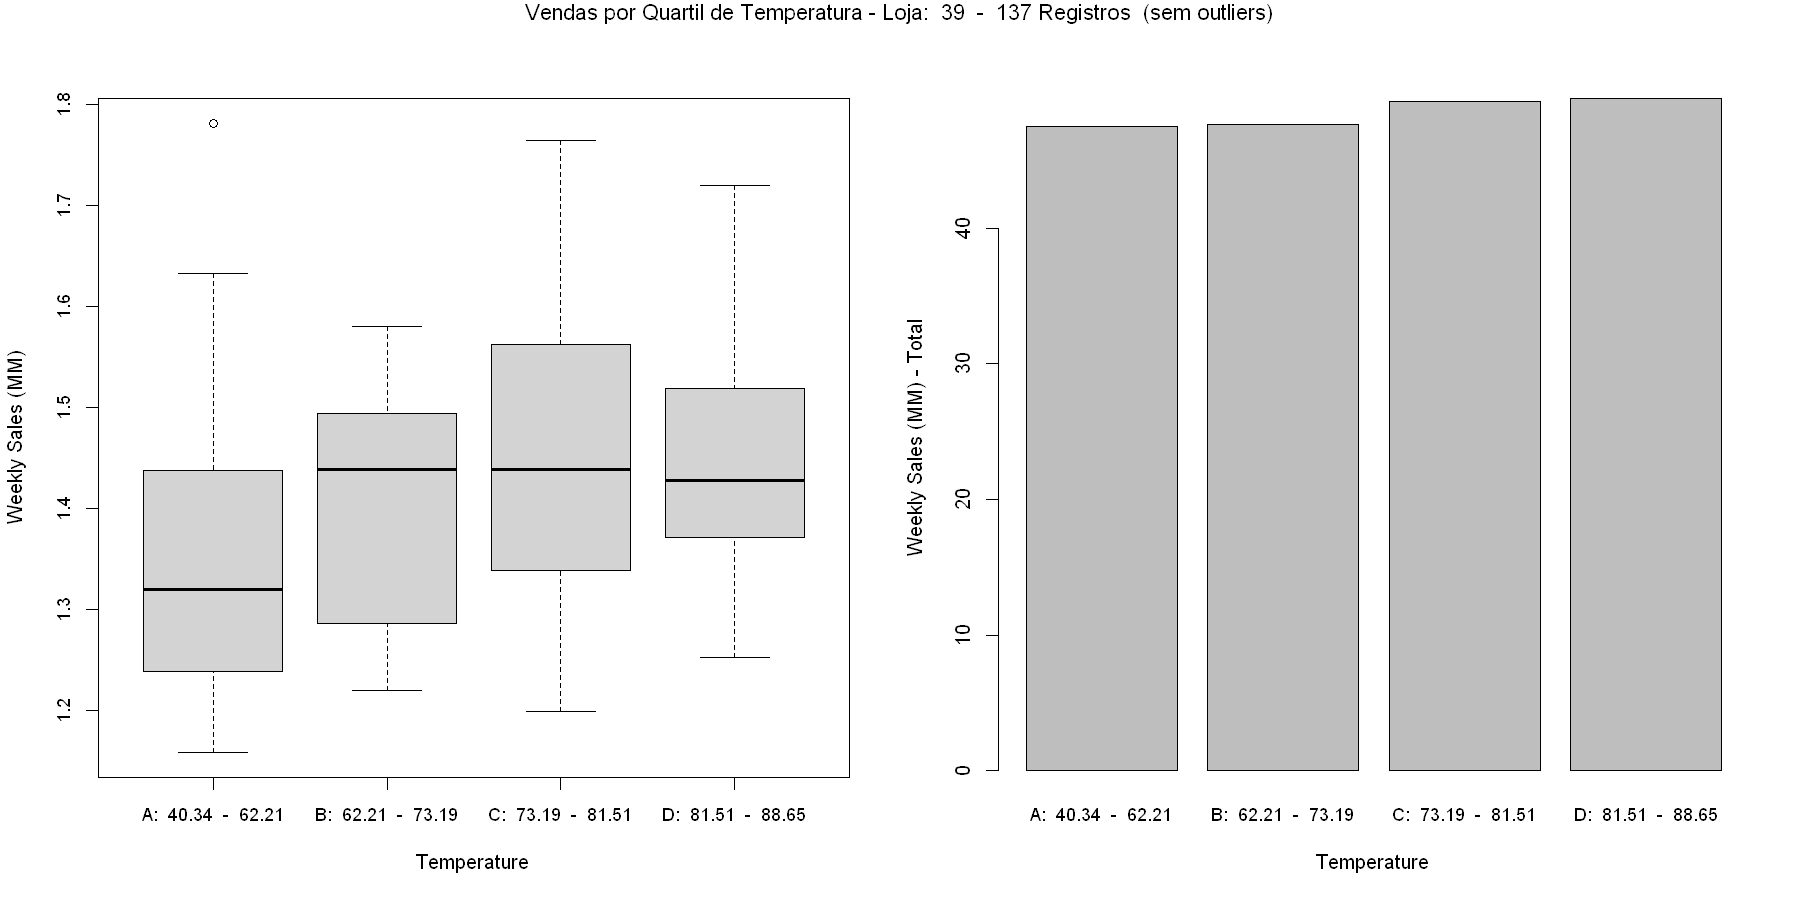

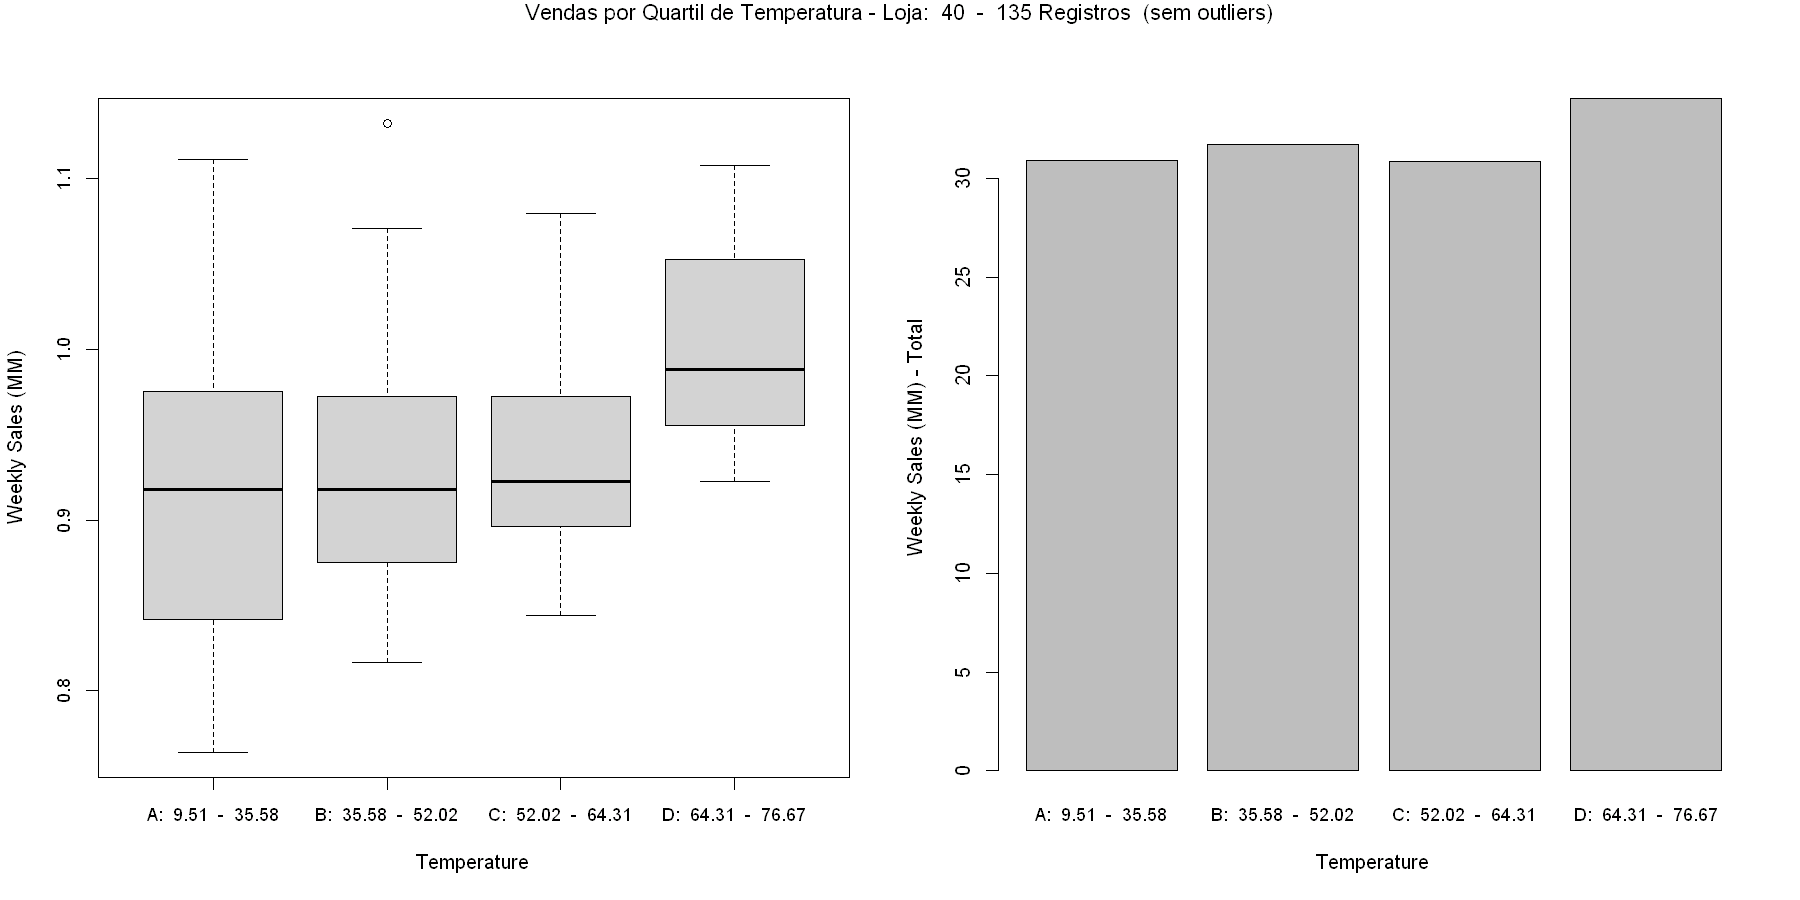

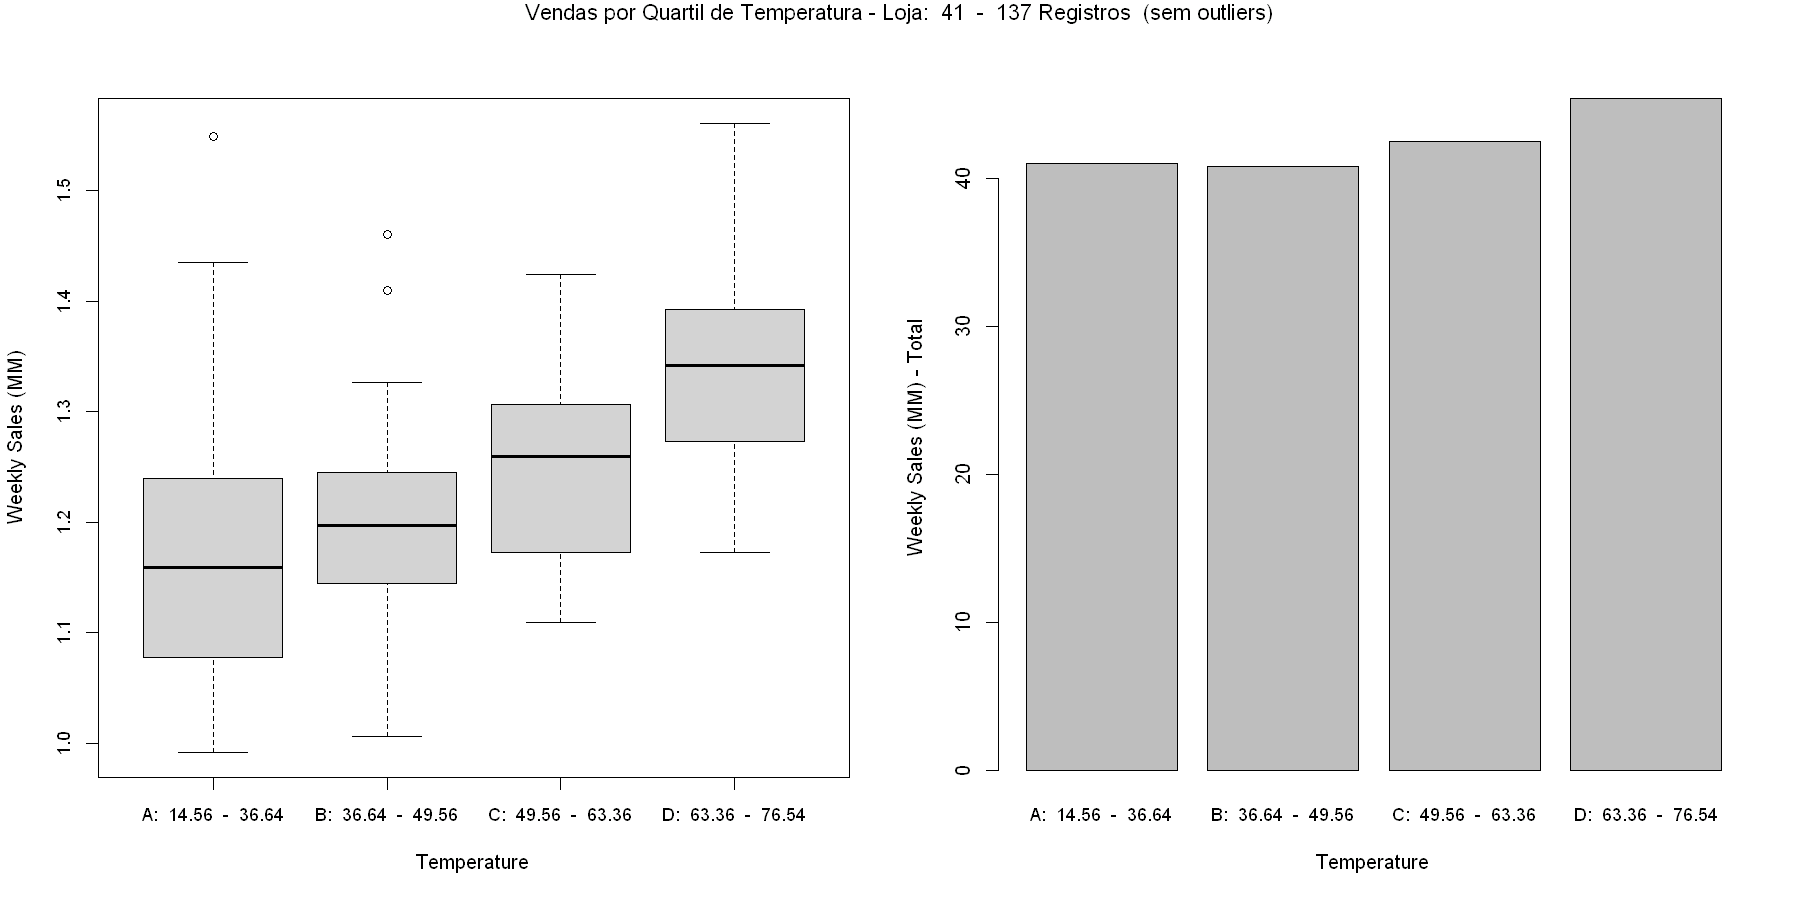

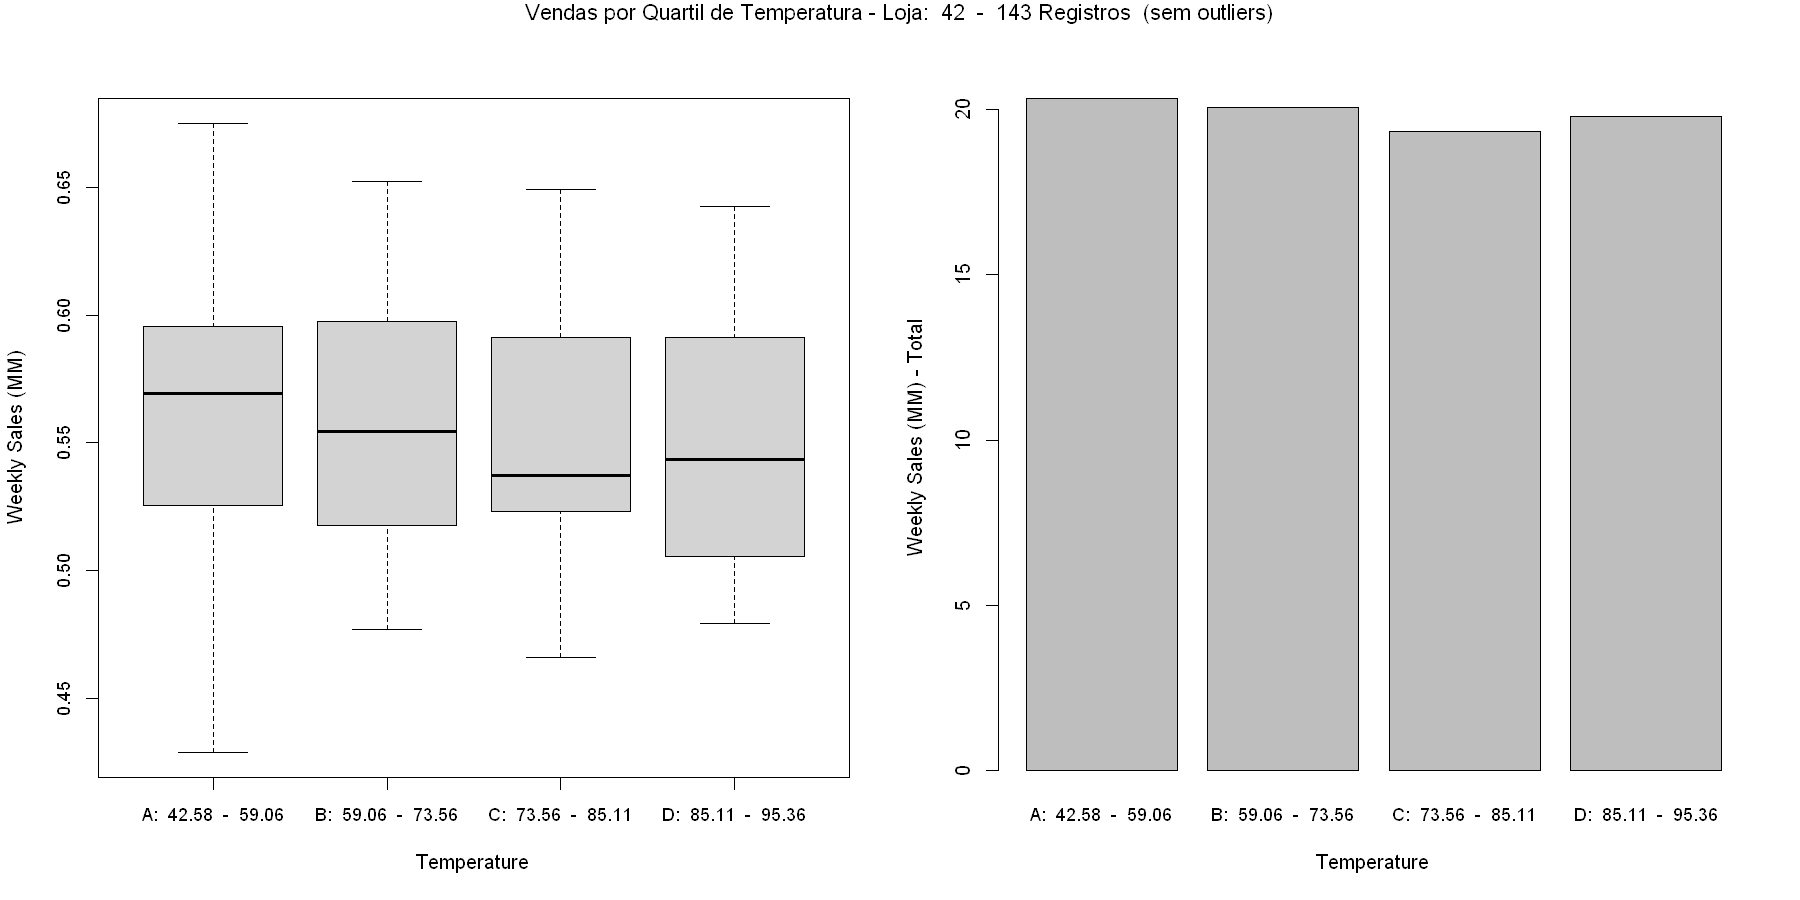

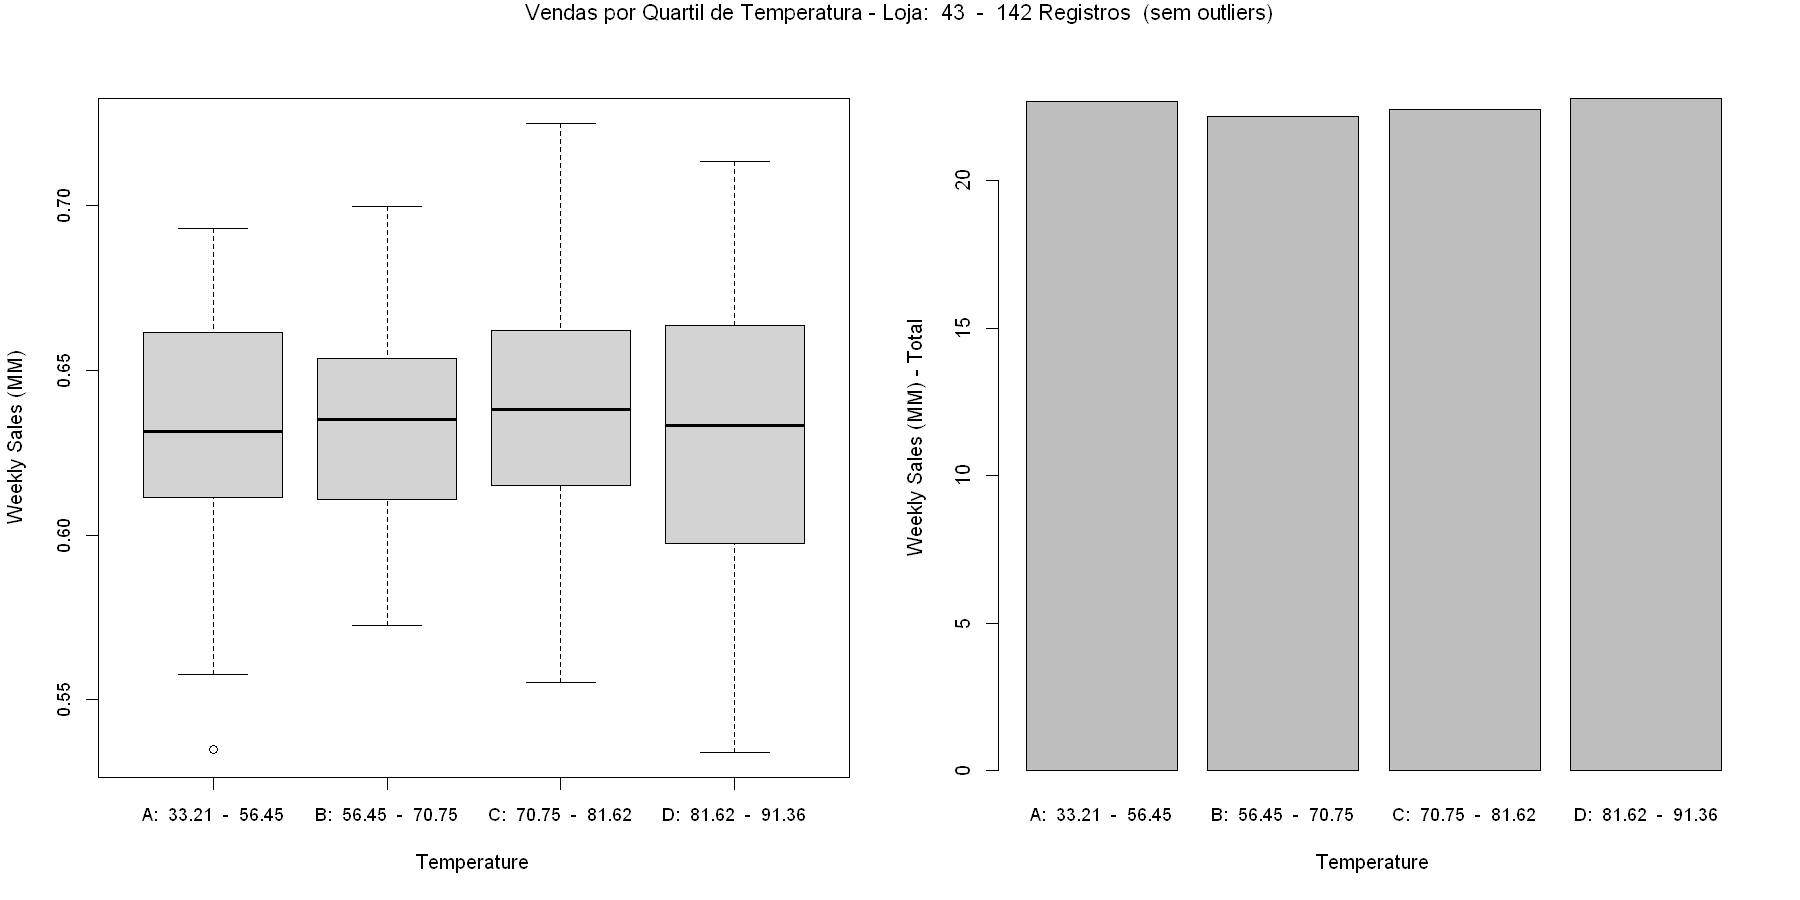

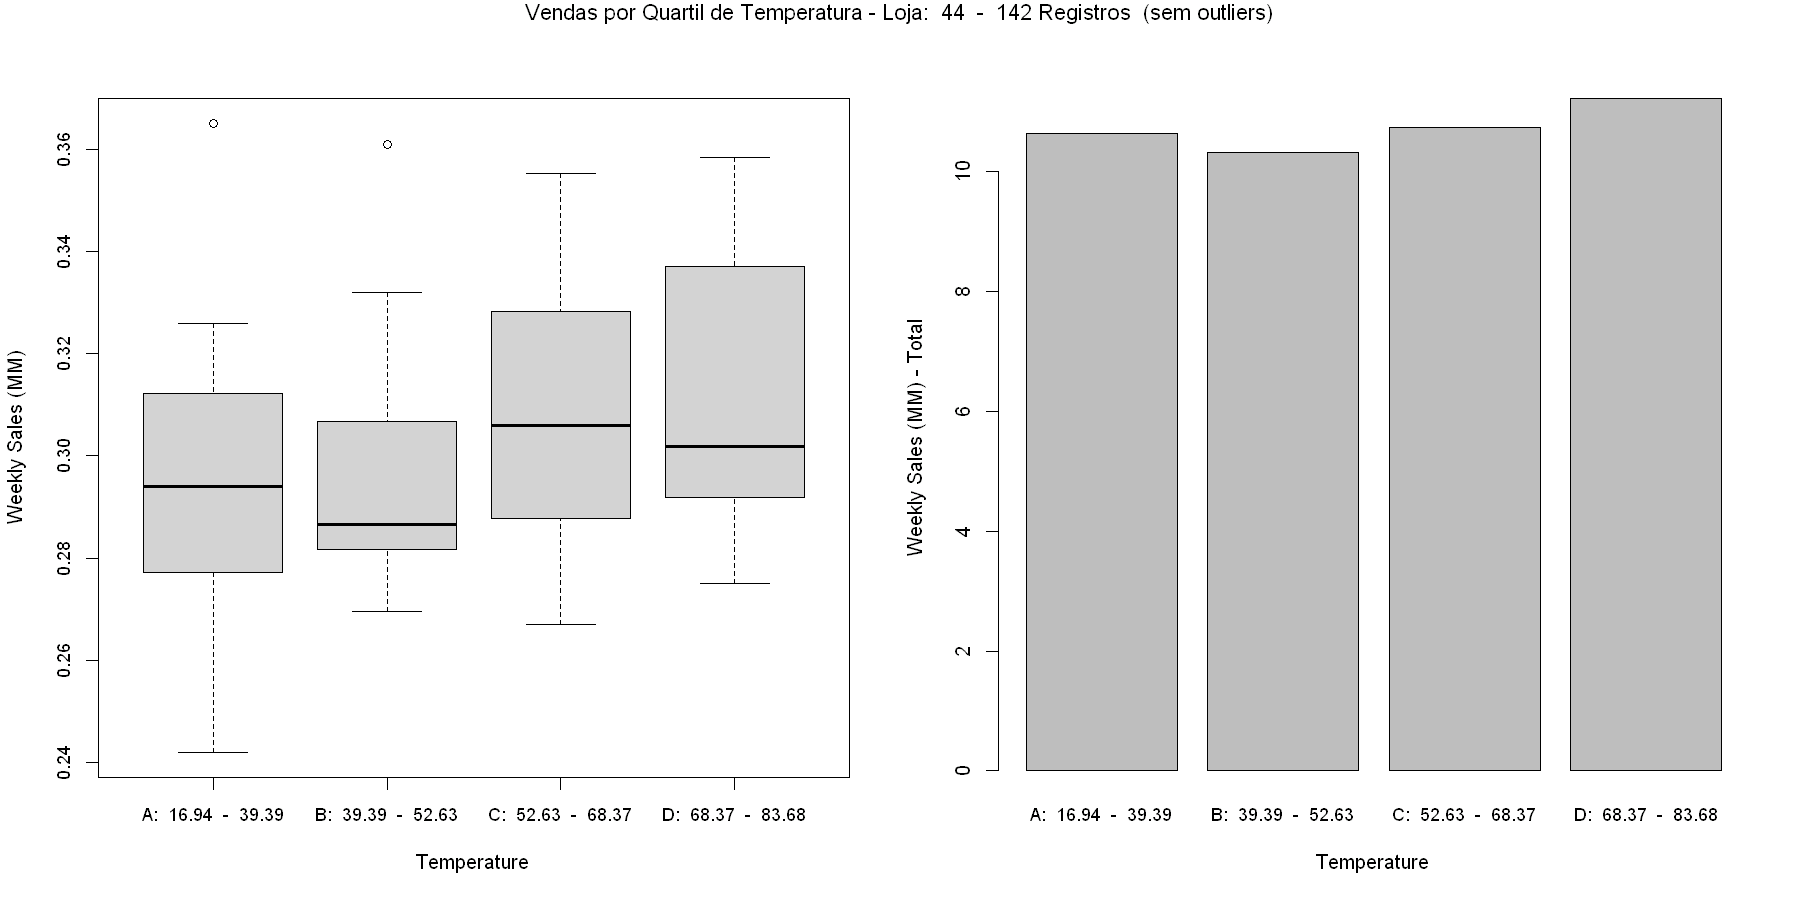

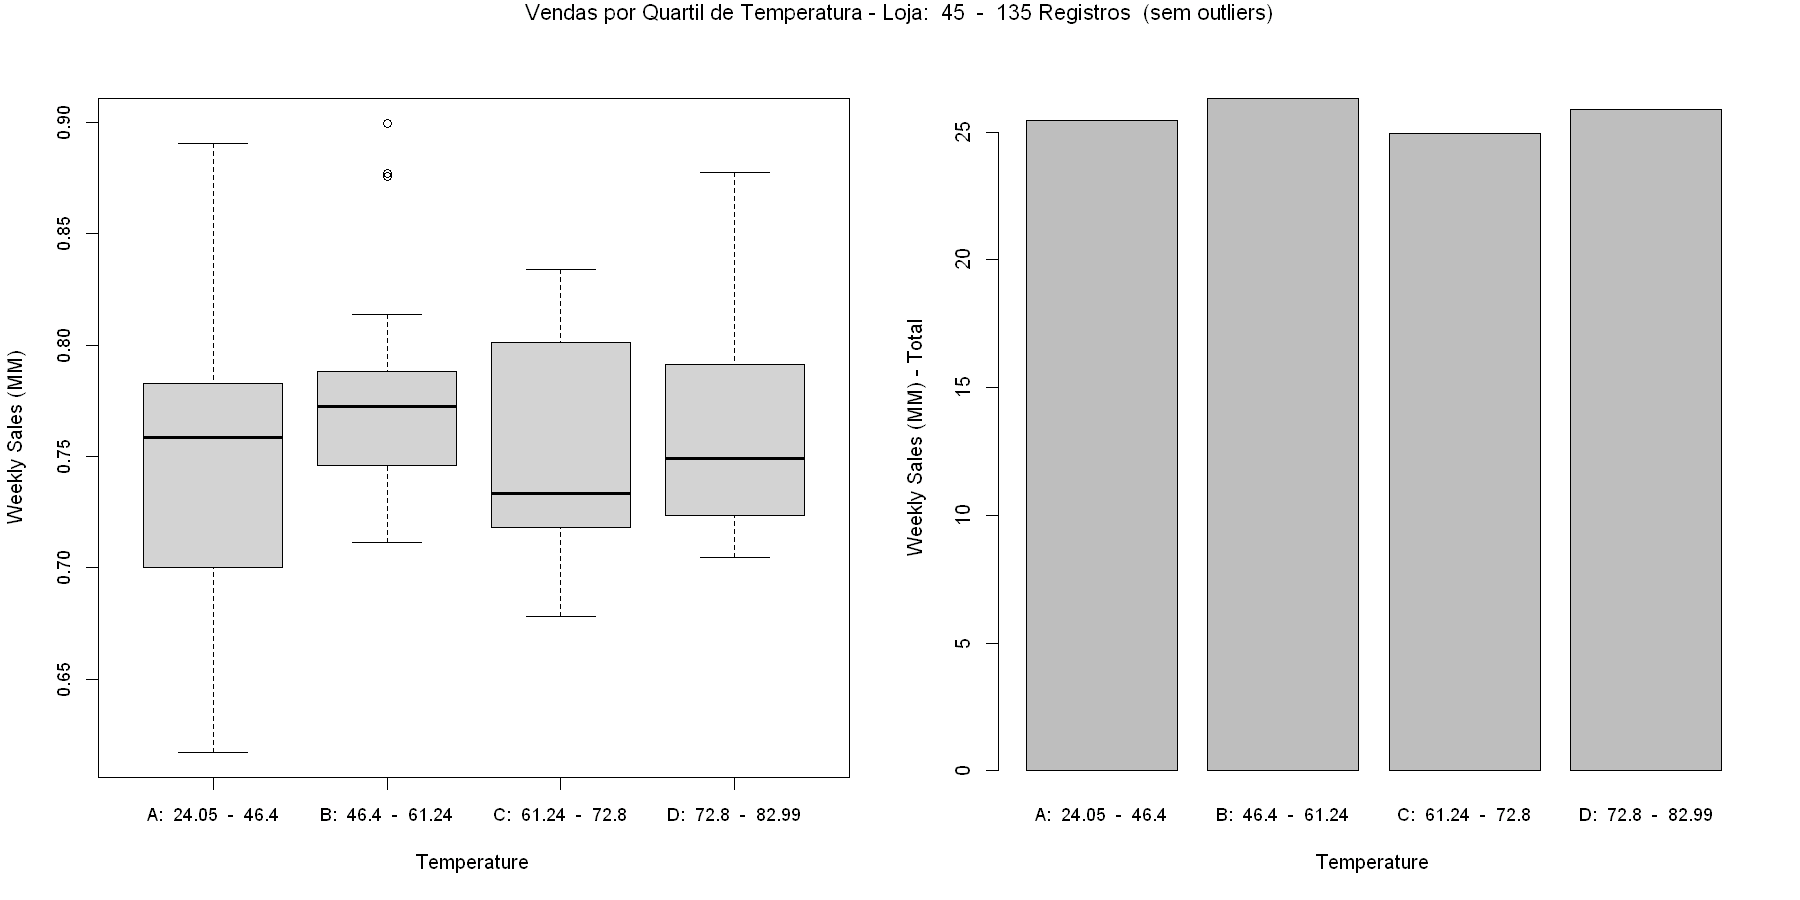

In [4]:
#Temperatura, Inflação, Combustível, Desemprego, Feriado 
#Só olharemos Temperatura, Desemprego e Feriado.
ultima = 1
#ultima = 45
for (nstore in 1:45){   
    
    filter_outliers = TRUE
    if (filter_outliers) {
         Q1 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.25)
         Q3 <- quantile(df[df$Store == nstore,]$Weekly_Sales, 0.75)

        IQR <- Q3 - Q1
    
    # Define outlier bounds
        lower_bound <- Q1 - 1.5 * IQR
        upper_bound <- Q3 + 1.5 * IQR
    
    
        dfplot = df[(df$Store == nstore) & (df$Weekly_Sales > lower_bound) & (df$Weekly_Sales < upper_bound),]

        outlier_txt = " (sem outliers)"
    } else {
        dfplot = df[(df$Store == nstore),]

        outlier_txt = " (com outliers)"
    }

    options(repr.plot.width=15, repr.plot.height=7.5)  # width=10, height=6 in inches
    par(mfrow = c(1, 2))


    Q0_TEMP = min(dfplot[dfplot$Store == nstore,]$Temperature, na.rm = TRUE)
    Q1_TEMP = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.25, na.rm = TRUE)
    Q2_TEMP = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.50, na.rm = TRUE)
    Q3_TEMP = quantile(dfplot[dfplot$Store == nstore,]$Temperature, 0.75, na.rm = TRUE)
    Q4_TEMP = max(dfplot[dfplot$Store == nstore,]$Temperature, na.rm = TRUE)
    dfplot$Temp_Quantile= NA
    
    label_1 = paste("A: ",round(Q0_TEMP, 2)," - ",round(Q1_TEMP, 2))
    label_2 = paste("B: ",round(Q1_TEMP, 2)," - ",round(Q2_TEMP, 2))
    label_3 = paste("C: ",round(Q2_TEMP, 2)," - ",round(Q3_TEMP, 2))
    label_4 = paste("D: ",round(Q3_TEMP, 2)," - ",round(Q4_TEMP, 2))
    
    dfplot$Temp_Quantile = ifelse(dfplot$Temperature <= Q1_TEMP,label_1, dfplot$Temp_Quantile)
    dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q1_TEMP & dfplot$Temperature <= Q2_TEMP ,label_2, dfplot$Temp_Quantile)
    dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q2_TEMP & dfplot$Temperature <= Q3_TEMP ,label_3, dfplot$Temp_Quantile)
    dfplot$Temp_Quantile = ifelse(dfplot$Temperature > Q3_TEMP, label_4, dfplot$Temp_Quantile)

    sums_temp <- aggregate(Weekly_Sales ~ Temp_Quantile, dfplot, sum)


    boxplot(Weekly_Sales/1000000 ~ Temp_Quantile, 
        data = dfplot,
        ylab = 'Weekly Sales (MM)',
        xlab = 'Temperature',
        cex.axis=0.9
       )
    barplot(sums_temp$Weekly_Sales/1000000, 
        names.arg = sums_temp$Temp_Quantile,
        xlab = "Temperature",
        ylab = "Weekly Sales (MM) - Total",
        cex.names=0.9
        )
    mtext(paste ("Vendas por Quartil de Temperatura - Loja: ",nstore, " - " , nrow(dfplot), "Registros",outlier_txt), side = 3, line = -1, outer = TRUE, cex=1.1)
  


    
    }
